In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(
    { "figure.figsize": (7, 5) },
    style='ticks',
    color_codes=True,
    font_scale=0.8,
)
pd.set_option('display.float_format', '{:.2f}'.format)
#custom = sns.color_palette()
#sns.set_palette(custom)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import sklearn
# this makes is easier for getting dataframes by default as input/output of
# sklearn pipelines
sklearn.set_config(transform_output="pandas")

In [ ]:
pip install category_encoders

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/adverts.csv")

In [ ]:
xx = pd.read_csv("/content/drive/MyDrive/adverts.csv")

In [ ]:
df.head()

mileage standard_colour standard_make     standard_model  \
0      0.00            Grey         Volvo               XC90   
1 108230.00            Blue        Jaguar                 XF   
2   7800.00            Grey         SKODA               Yeti   
3  45000.00          Others      Vauxhall              Mokka   
4  64000.00            Grey    Land Rover  Range Rover Sport   

  vehicle_condition  year_of_registration  price  body_type  \
0               NEW               2020.00  73970        SUV   
1              USED               2011.00   7000     Saloon   
2              USED               2017.00  14000        SUV   
3              USED               2016.00   7995  Hatchback   
4              USED               2015.00  26995        SUV   

   crossover_car_and_van              fuel_type  age  
0                      0  Petrol Plug-in Hybrid 0.00  
1                      0                 Diesel 9.00  
2                      0                 Petrol 3.00  
3                      0                 Diesel 4.00  
4                      0                 Diesel 5.00

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [ ]:
df.describe()

public_reference   mileage  year_of_registration      price
count          402005.00 401878.00             368694.00  402005.00
mean  202007077472444.47  37743.60               2015.01   17341.97
std       16916615997.34  34831.72                  7.96   46437.46
min   201307177852187.00      0.00                999.00     120.00
25%   202009023197699.00  10481.00               2013.00    7495.00
50%   202009304400624.00  28629.50               2016.00   12600.00
75%   202010175124399.00  56875.75               2018.00   20000.00
max   202011025683478.00 999999.00               2020.00 9999999.00

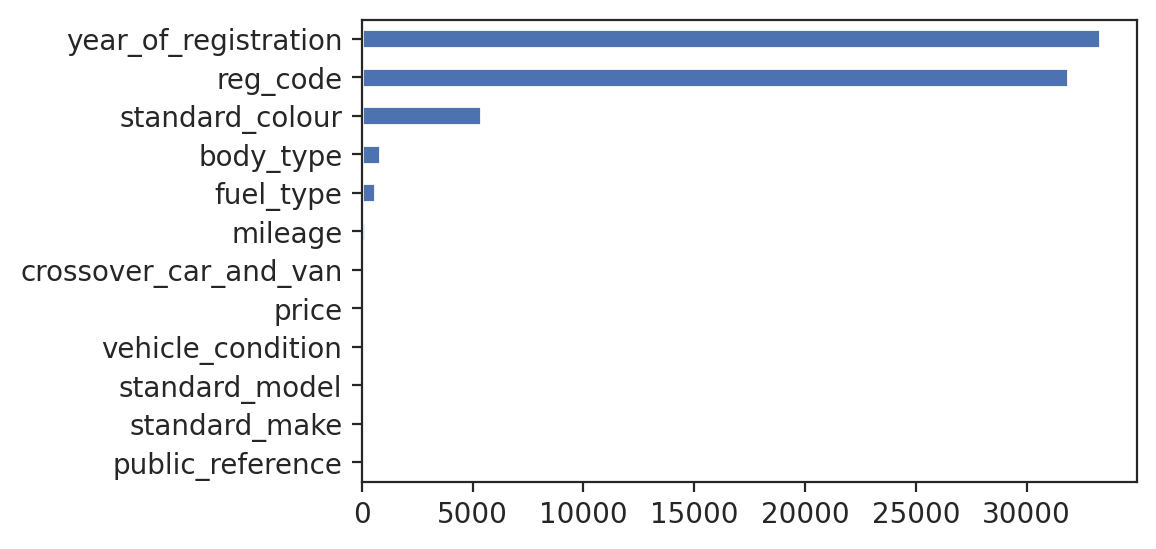

In [ ]:
#Missing values
plt.figure(figsize=(5,3))
df.isna().sum().sort_values(ascending = True).plot(kind = "barh")
plt.show()

# DISTRIBUTION ANALYSIS OF FEATURES


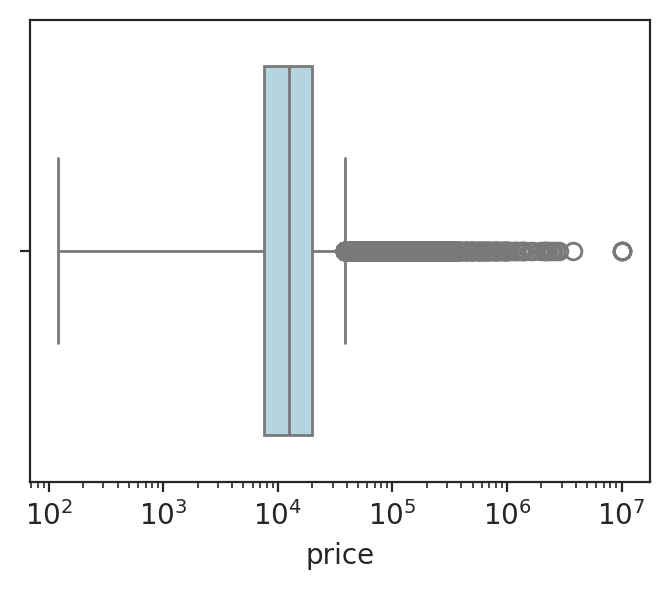

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(data = df, x = "price", color = "lightblue")
plt.xscale("log")
plt.show()

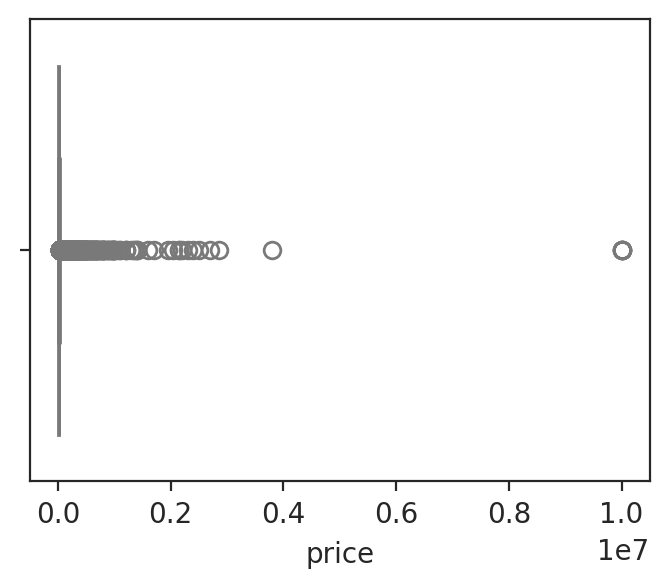

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(data = df, x = "price", color = "lightblue")
plt.show()

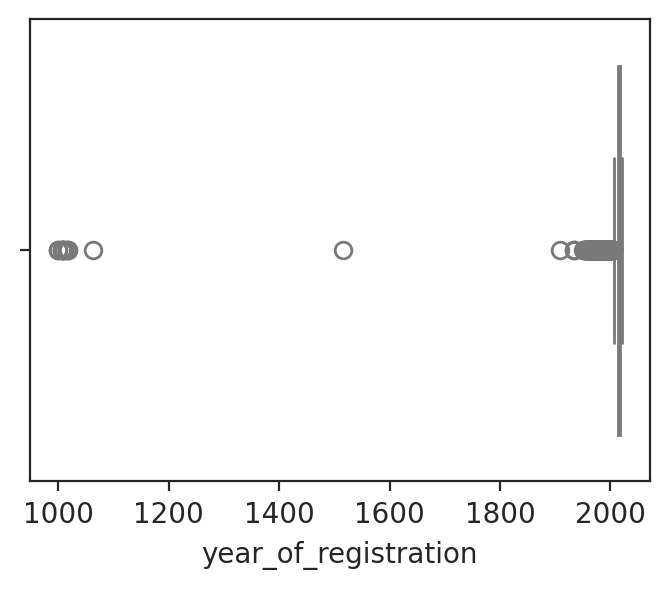

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(data = df, x = "year_of_registration", color = "lightblue")
plt.show()

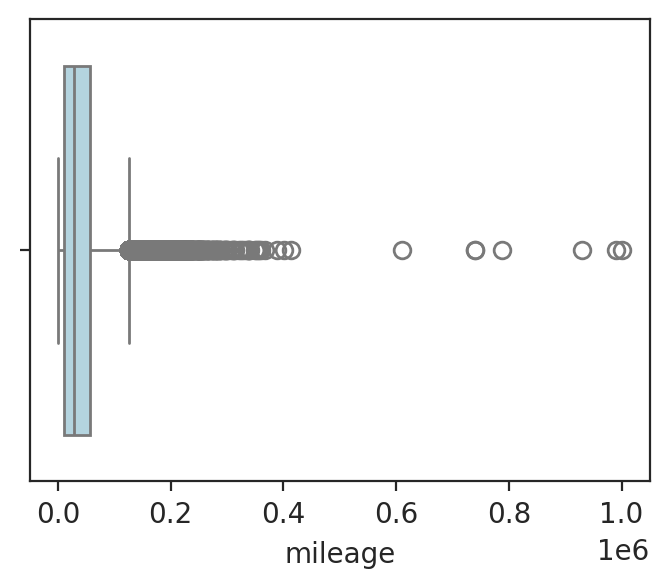

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(data = df, x = "mileage", color = "lightblue")
plt.show()

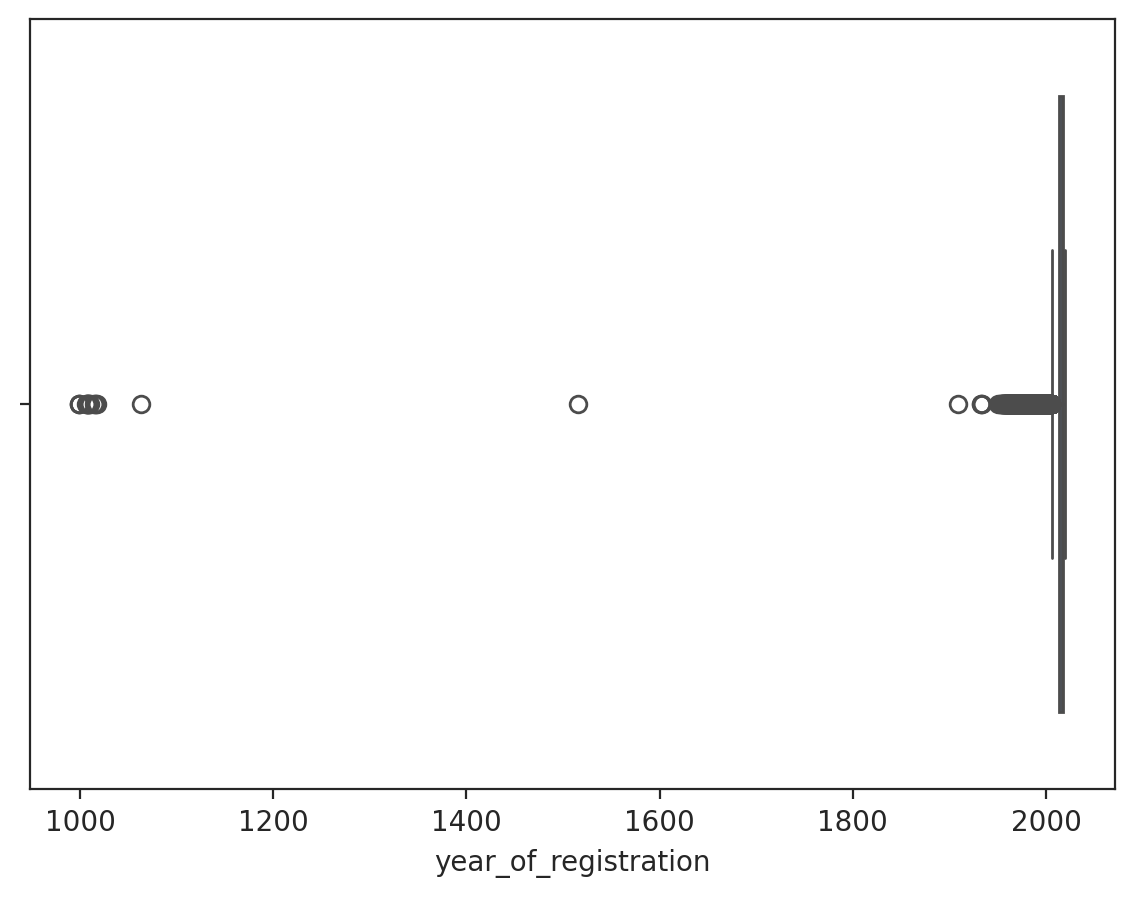

In [ ]:
sns.boxplot(data = df, x = 'year_of_registration')
plt.show()

<Axes: xlabel='count', ylabel='standard_colour'>

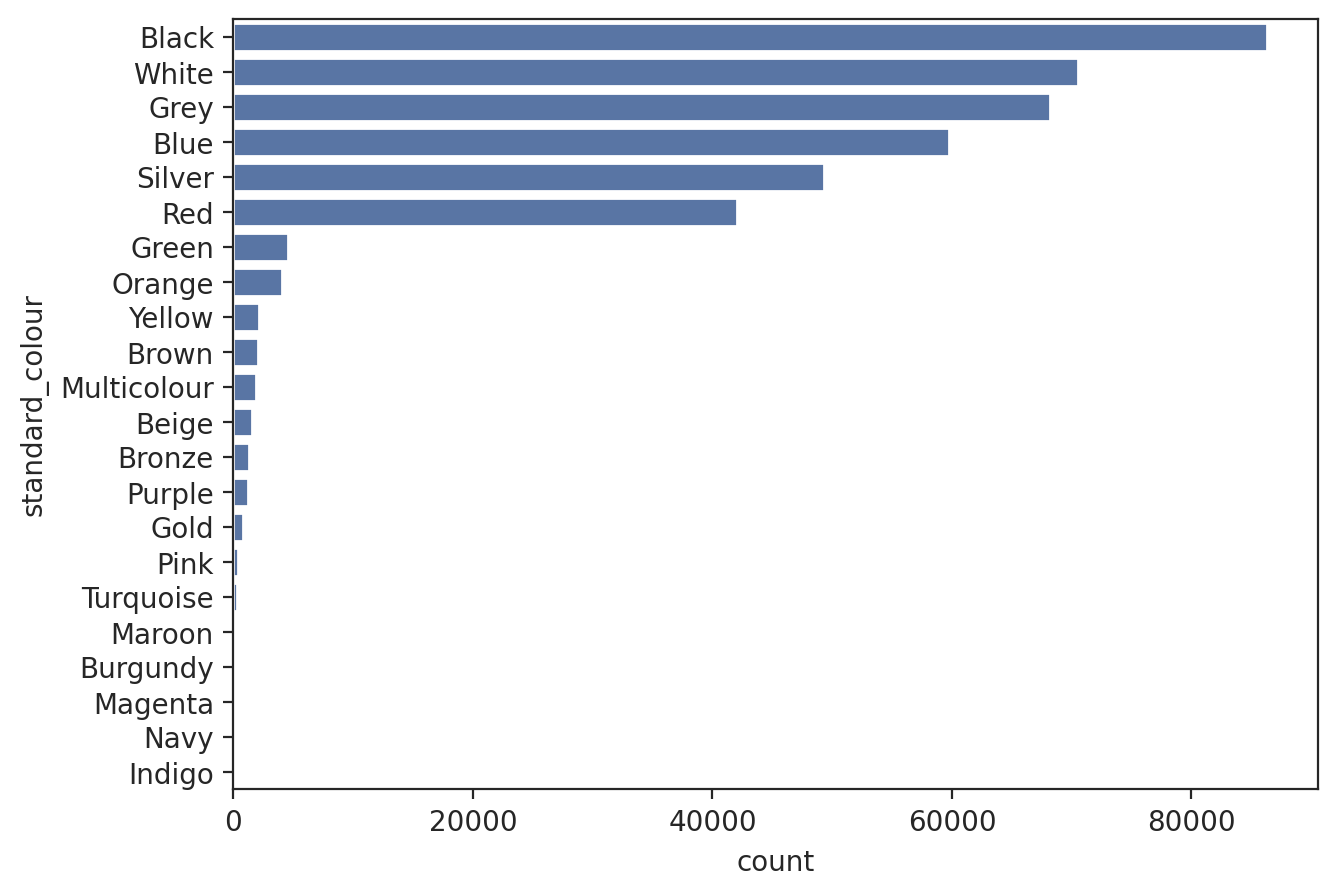

In [ ]:
sns.countplot(data = df, y = "standard_colour", order = df["standard_colour"].value_counts().index)

Text(0.5, 1.0, 'Distribution of Standard Make')

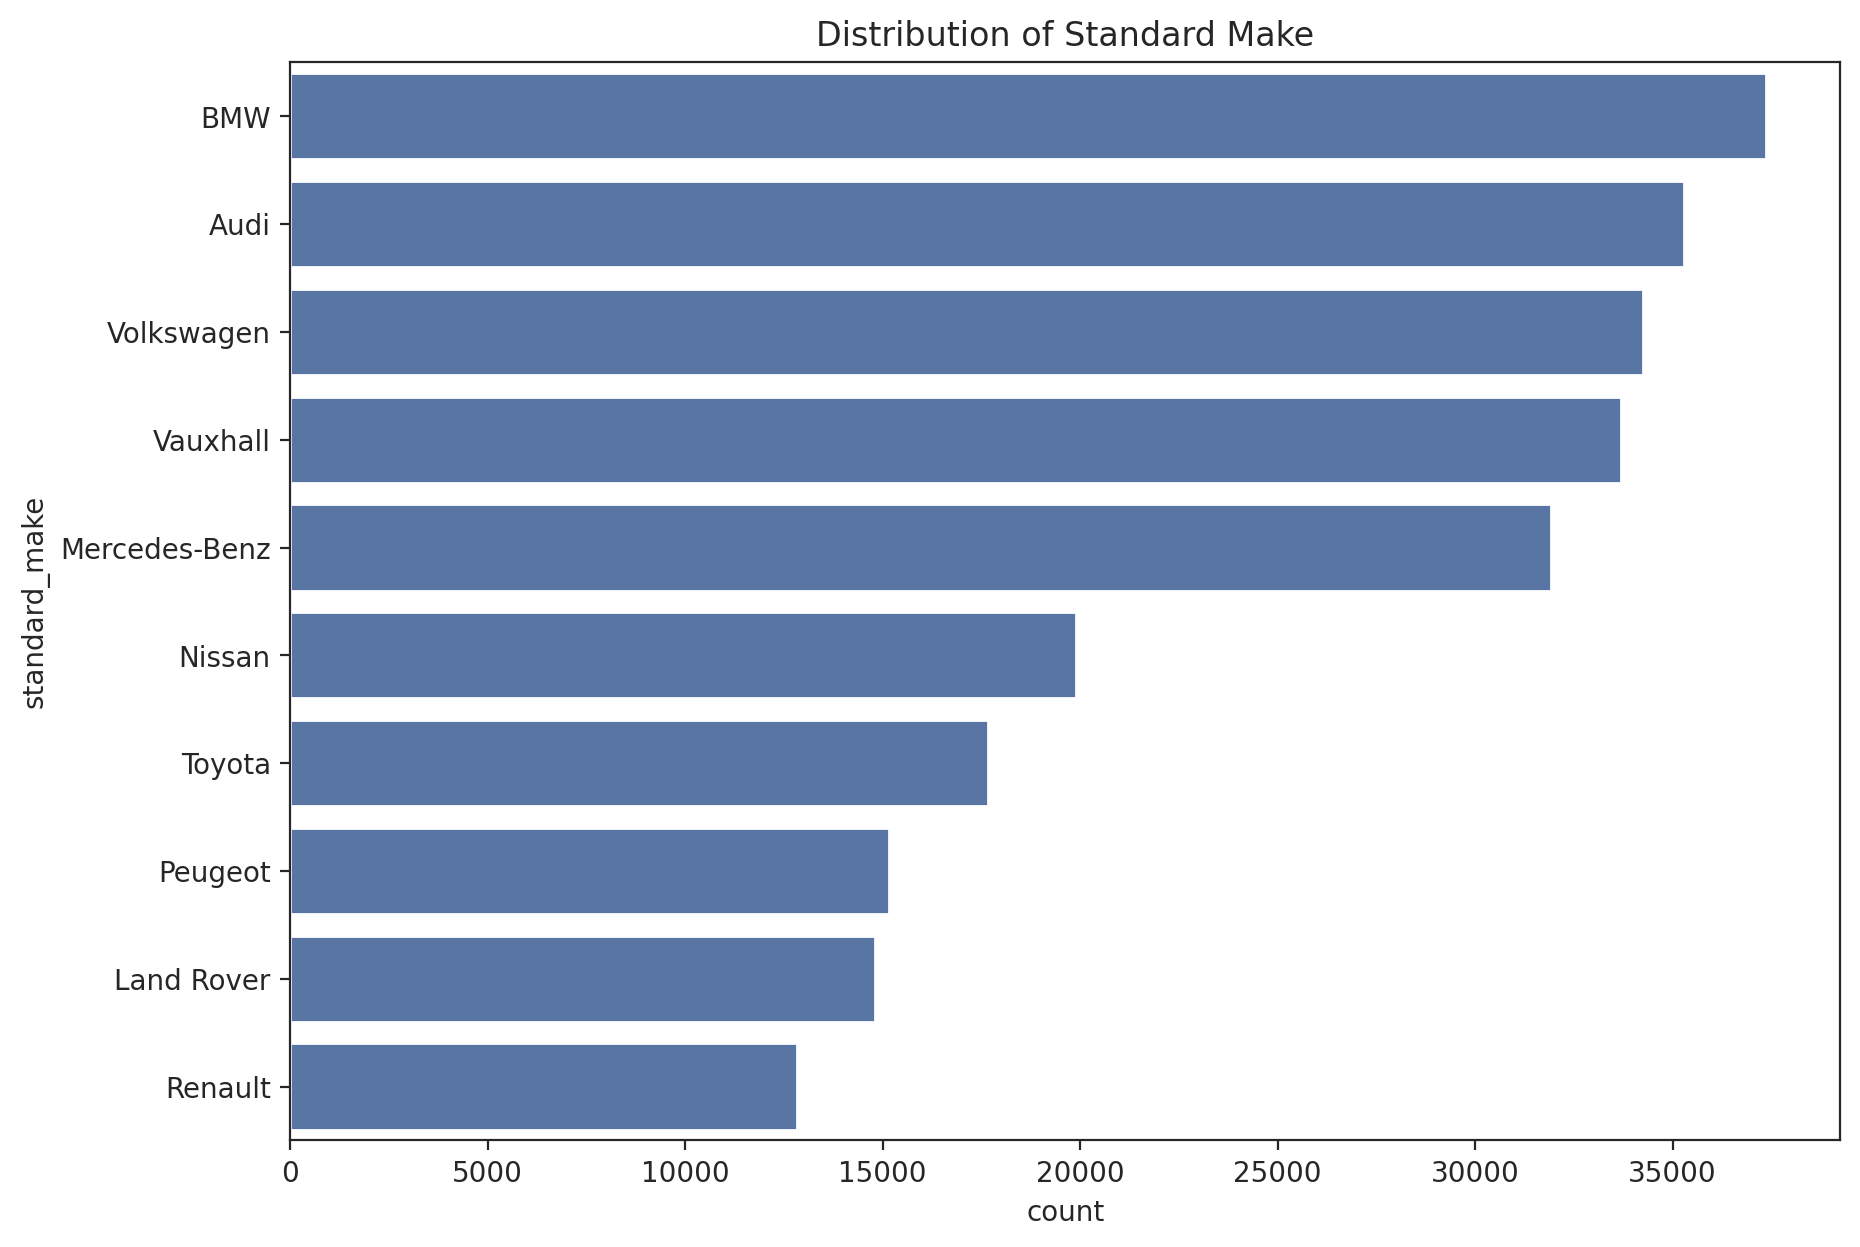

In [ ]:
#Distribution of the Standard make shows
#I displayed the top 10 for easier visualization
plt.figure(figsize = (10, 7))
df_sm = df['standard_make'].value_counts().head(10).reset_index()
ax = sns.barplot(data = df_sm, x = 'count', y = 'standard_make')
ax.set_title('Distribution of Standard Make')

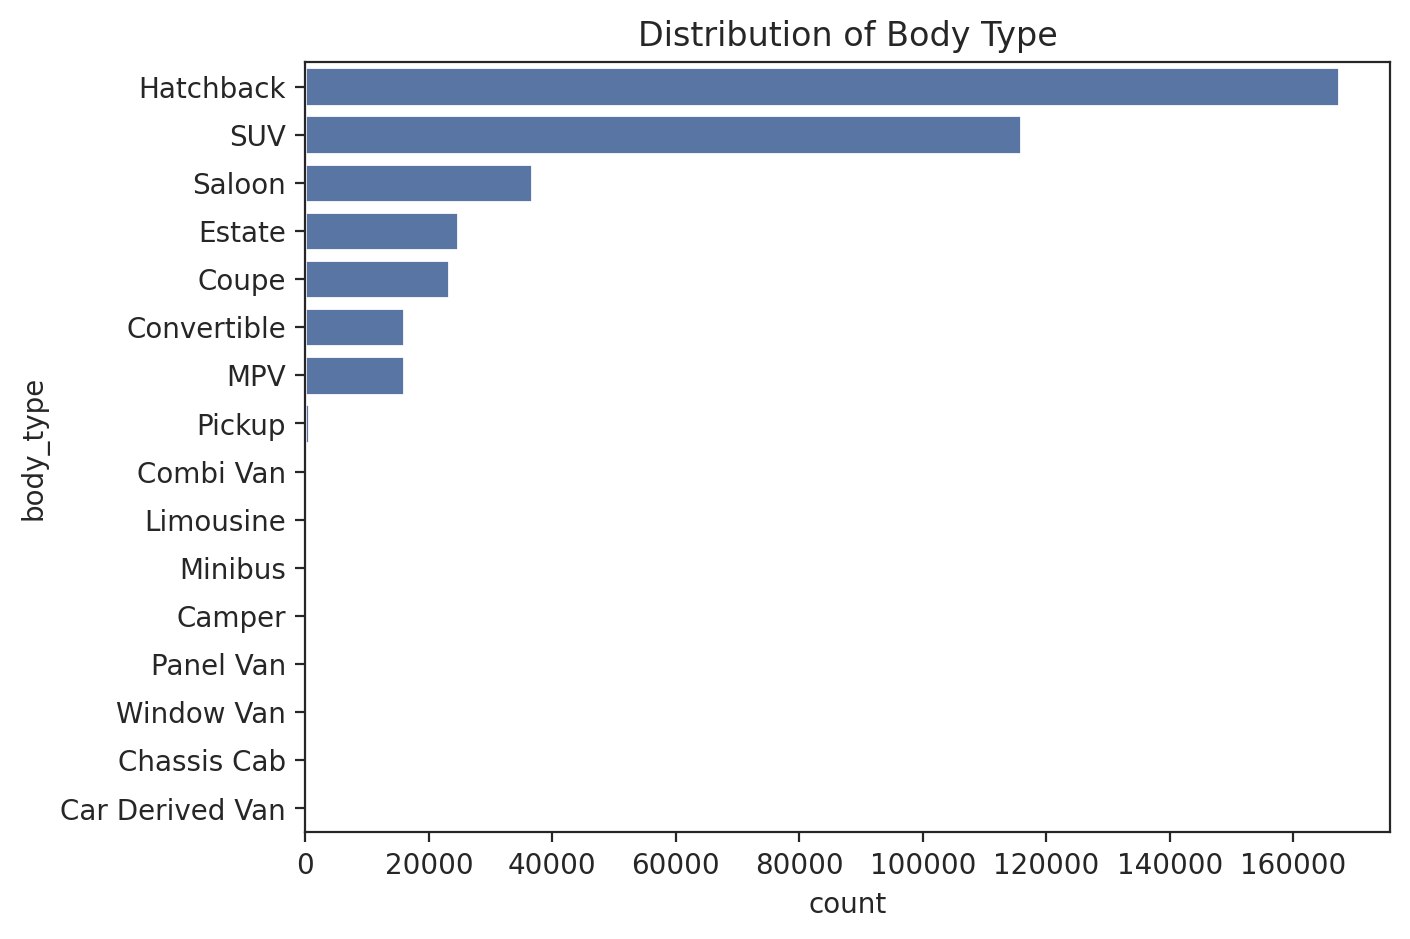

In [ ]:
#Hatchbacks and SUVs occurr more in the dataset
plt.figure(figsize = (7,5))
ax = sns.countplot(data = df, y = 'body_type', order =df['body_type'].value_counts().index)
ax.set_title('Distribution of Body Type')
plt.show()

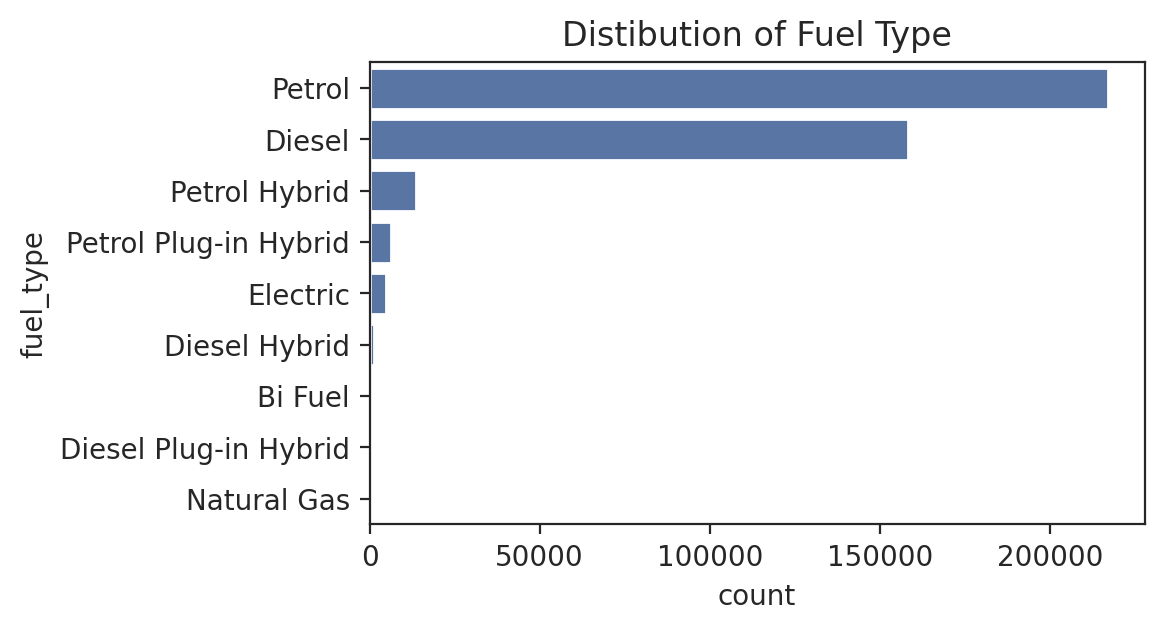

In [ ]:
#Petrol and Diesel vehicles are more common
plt.figure(figsize = (5,3))
ax = sns.countplot(data = df, y = 'fuel_type', order = df['fuel_type'].value_counts().index)
ax.set_title('Distibution of Fuel Type')
plt.show()

In [ ]:
df['standard_model'].value_counts()

standard_model
Golf                11583
Corsa               10647
C Class              8550
3 Series             8347
Polo                 7681
                    ...  
Isetta                  1
Starlet Glanza V        1
RX 200t                 1
Scuderia Spider         1
480                     1
Name: count, Length: 1168, dtype: int64

In [ ]:
df['crossover_car_and_van'].value_counts()

crossover_car_and_van
False    400210
True       1795
Name: count, dtype: int64

In [ ]:
df['vehicle_condition'].value_counts()

vehicle_condition
USED    370756
NEW      31249
Name: count, dtype: int64

In [ ]:
len(df['standard_model'].unique())

1168

# DATA CLEANING

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [ ]:
df.isna().sum().sort_values(ascending = False)

year_of_registration     33311
reg_code                 31857
standard_colour           5378
body_type                  837
fuel_type                  601
mileage                    127
public_reference             0
standard_make                0
standard_model               0
vehicle_condition            0
price                        0
crossover_car_and_van        0
dtype: int64

In [ ]:
regcodeid = {'51': 2001, '52': 2002, '53': 2003, '54':2004, '55': 2005, '56': 2006, '57': 2007, '58': 2008, '59': 2009, '60':2010,'61': 2011, '62': 2012, '63': 2013, '64': 2014,
             '65': 2015, '66': 2016, '67': 2017, '68': 2018, '69': 2019, '70':2020, '01': 2001, '02': 2002, '03': 2003, '04':2004, '05': 2005, '06': 2006, '07': 2007, '08': 2008, '09': 2009, '10':2010,'11': 2011, '12': 2012, '13': 2013, '14': 2014,
             '15': 2015, '16': 2016, '17': 2017, '18': 2018, '19': 2019, '20':2020,'A': 1963,'B':1964,'E': 1967, 'H': 1969, 'K': 1971, 'L': 1972, 'M':1973, 'V':1979, 'G': 1968, 'T': 1978, 'N': 1974,
             'P': 1975, 'F':1967, 'R': 1976, 'C': 1965, 'Y': 1982,'J': 1970, 'S': 1977, 'X': 1981, 'D': 1966, 'W': 1980,'m':1994,'s':1998,'k':1992,'p':1996
}

In [ ]:
df.loc[(df["vehicle_condition"] == "NEW"),['year_of_registration']] = 2020

In [ ]:
df['reg_code'].unique()

array([nan, '61', '17', '16', '64', '13', '08', '19', '60', '69', '66',
       '12', '18', '65', '09', 'B', '10', '14', '03', '67', '63', '15',
       '68', '56', '20', '70', '62', '11', '05', '59', '58', 'W', '02',
       '57', '06', '52', '53', '04', 'J', '07', '55', '51', 'X', 'D', 'S',
       'Y', '54', 'H', 'K', 'E', 'L', 'V', 'M', 'G', 'T', 'N', 'P', 'A',
       'F', 'R', 'C', '94', '85', 'CA', 'm', 'FW', '723xuu', '95', 's',
       '38', 'k', '37', 'p'], dtype=object)

In [ ]:
df['year_of_registration'].unique()

array([2020., 2011., 2017., 2016., 2015., 2013., 2008., 2019., 2010.,
       2012., 2018., 2009., 1984., 2014., 2003.,   nan, 2006., 2005.,
       2000., 2002., 2007., 2004., 1991., 2001., 1986., 1998., 1990.,
       1993., 1987., 1994., 1999., 1970., 1988., 1995., 1997., 1969.,
       1992., 1989., 1996., 1976., 1983., 1980., 1973., 1962., 1967.,
       1972., 1982., 1968., 1979., 1964., 1933., 1981., 1985., 1978.,
       1971., 1974., 1966., 1977., 1961., 1965., 1007., 1957., 1515.,
       1963., 1063., 1954., 1975., 1955., 1009., 1016., 1960., 1956.,
       1959., 1909., 1934., 1958., 1010., 1950., 1008., 1018.,  999.,
       1017., 1952., 1006., 1015.])

In [ ]:
df.loc[df['year_of_registration']< 1600]['year_of_registration'].unique()

array([1007., 1515., 1063., 1009., 1016., 1010., 1008., 1018.,  999.,
       1017., 1006., 1015.])

In [ ]:
new_year = df.loc[(df['year_of_registration']< 1600) & (df['reg_code'].notnull())]['reg_code'].map(regcodeid)

In [ ]:
df.loc[(df['year_of_registration']< 1600) & (df['reg_code'].notnull()),["year_of_registration"]] = new_year

In [ ]:
#mapping reg_code to my regcodeid dictionary which i got from the uk car registration wikipedia page
years = df.loc[df['year_of_registration'].isnull() & df['reg_code'].notnull()]['reg_code'].map(regcodeid)

In [ ]:
## filling null values where reg_code is available and year_of_registration is null
df.loc[df['year_of_registration'].isnull() & df['reg_code'].notnull(), 'year_of_registration'] = years

In [ ]:
## futuristic values
df.drop(df.loc[df['year_of_registration'].isnull() & df['reg_code'].notnull()].index, inplace = True)

In [ ]:
df.loc[(df['mileage'] == 0) & df['year_of_registration'].isnull(),['year_of_registration']] = 2020

In [ ]:
## Changed all colours whose value counts where less than 0.02% of total value counts for easier analysis
colour_percent = df['standard_colour'].value_counts( normalize = True).to_dict()
df['standard_colour'] = df['standard_colour'].apply(lambda x: 'Others' if pd.notna(x) and colour_percent[x] < 0.02 else x)

In [ ]:
df.drop("reg_code", axis = 1, inplace = True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate,cross_val_score
from sklearn.model_selection import GridSearchCV, ParameterGrid, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
# SHAP is not normally part of a standard Python distribution
# I am installing it here by asking the underlying operating system to
# `pip install` the package (`-q` for a quiet output)
!pip install -q shap
import shap
shap.initjs()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 1.8 MB/s eta 0:00:00


In [ ]:
dfcopy = df.copy()

In [ ]:
df = dfcopy

In [ ]:
df

public_reference   mileage standard_colour standard_make  \
0        202006039777689      0.00            Grey         Volvo   
1        202007020778260 108230.00            Blue        Jaguar   
2        202007020778474   7800.00            Grey         SKODA   
3        202007080986776  45000.00          Others      Vauxhall   
4        202007161321269  64000.00            Grey    Land Rover   
...                  ...       ...             ...           ...   
402000   202010315652942   5179.00            Grey       Peugeot   
402001   202010315657341 110000.00             Red       Peugeot   
402002   202010315659271  52760.00           White        Nissan   
402003   202011015662436  10250.00             Red        Abarth   
402004   201512149444029  14000.00          Silver          Audi   

           standard_model vehicle_condition  year_of_registration  price  \
0                    XC90               NEW               2020.00  73970   
1                      XF              USED               2011.00   7000   
2                    Yeti              USED               2017.00  14000   
3                   Mokka              USED               2016.00   7995   
4       Range Rover Sport              USED               2015.00  26995   
...                   ...               ...                   ...    ...   
402000                208              USED               2019.00  10595   
402001                107              USED               2009.00   2000   
402002            Qashqai              USED               2012.00   7250   
402003                595              USED               2015.00  11490   
402004           A4 Avant              USED               2014.00  20520   

        body_type  crossover_car_and_van              fuel_type  
0             SUV                  False  Petrol Plug-in Hybrid  
1          Saloon                  False                 Diesel  
2             SUV                  False                 Petrol  
3       Hatchback                  False                 Diesel  
4             SUV                  False                 Diesel  
...           ...                    ...                    ...  
402000  Hatchback                  False                 Petrol  
402001  Hatchback                  False                 Petrol  
402002        SUV                  False                 Petrol  
402003  Hatchback                  False                 Petrol  
402004     Estate                  False                 Diesel  

[401996 rows x 11 columns]

In [ ]:
#cap price
upper = df['price'].quantile(0.99)
lower = df['price'].quantile(0.01)

In [ ]:
df.loc[df['mileage'] < df['mileage'].quantile(0.9998) ].describe()

public_reference   mileage  year_of_registration      price
count          401788.00 401788.00             401481.00  401788.00
mean  202007080919279.41  37682.38               2015.44   17343.37
std       16882908171.96  34493.07                  4.41   46446.51
min   201307177852187.00      0.00               1909.00     120.00
25%   202009023198028.75  10477.00               2014.00    7495.00
50%   202009304400592.50  28618.00               2017.00   12601.50
75%   202010175124321.25  56837.00               2018.00   20000.00
max   202011025683478.00 253467.00               2020.00 9999999.00

In [ ]:
df = df.loc[(df['price'] > lower) & (df['price'] < upper)]

In [ ]:
df.describe()

public_reference   mileage  year_of_registration     price
count          393894.00 393775.00             393627.00 393894.00
mean  202007189658287.84  37302.70               2015.54  15882.72
std       16235638969.66  34057.31                  4.23  12685.72
min   201307177852187.00      0.00               1909.00   1155.00
25%   202009023201887.75  10648.00               2014.00   7500.00
50%   202009304397825.00  28572.00               2017.00  12600.00
75%   202010175118342.75  56000.00               2018.00  19990.00
max   202011025683478.00 999999.00               2020.00  88888.00

In [ ]:
df = df.query("mileage < 400000")

# FEATURE ENGINEERING


In [ ]:
##feature engineering the age
df['publish_year'] = df['public_reference'].astype(str).str[:8]
df['publish_year'] = pd.to_datetime(df['publish_year']).dt.strftime('%Y')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393766 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       393766 non-null  int64  
 1   mileage                393766 non-null  float64
 2   standard_colour        388740 non-null  object 
 3   standard_make          393766 non-null  object 
 4   standard_model         393766 non-null  object 
 5   vehicle_condition      393766 non-null  object 
 6   year_of_registration   393511 non-null  float64
 7   price                  393766 non-null  int64  
 8   body_type              392980 non-null  object 
 9   crossover_car_and_van  393766 non-null  bool   
 10  fuel_type              393207 non-null  object 
 11  publish_year           393766 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 36.4+ MB


In [ ]:
df['age'] = abs(df['publish_year'].astype(int) - df['year_of_registration'])

In [ ]:
df['age'].unique()

array([  0.,   9.,   3.,   4.,   5.,   7.,  12.,   1.,  10.,   8.,   2.,
        11.,  36.,   6.,  17.,  15.,  18.,  14.,  13.,  29.,  19.,  34.,
        16.,  20.,  30.,  27.,  nan,  33.,  26.,  21.,  22.,  28.,  25.,
        23.,  51.,  32.,  31.,  24.,  56.,  44.,  37.,  40.,  58.,  45.,
        53.,  48.,  38.,  52.,  50.,  41.,  87.,  39.,  35.,  42.,  49.,
        47.,  46.,  54.,  43.,  59.,  55.,  63.,  57.,  66.,  65.,  60.,
       111.,  86.,  62.,  70.,  64.,  68.,  61.])

In [ ]:
df['year_of_registration'].unique()

array([2020., 2011., 2017., 2016., 2015., 2013., 2008., 2019., 2010.,
       2012., 2018., 2009., 1984., 2014., 2003., 2005., 2002., 2006.,
       2007., 1991., 2000., 2001., 1986., 2004., 1990., 1993.,   nan,
       1987., 1994., 1999., 1998., 1995., 1997., 1969., 1992., 1988.,
       1989., 1996., 1964., 1976., 1983., 1980., 1962., 1975., 1967.,
       1972., 1982., 1968., 1970., 1979., 1933., 1981., 1985., 1978.,
       1971., 1973., 1974., 1966., 1977., 1961., 1965., 1957., 1963.,
       1954., 1955., 1959., 1909., 1934., 1958., 1950., 1956., 1960.,
       1952.])

In [ ]:
df.drop(["public_reference","publish_year"], axis = 1,inplace = True)

In [ ]:
df['crossover_car_and_van'] = df['crossover_car_and_van'].astype(int)

In [ ]:
df = df.query("age < 80")

#**MANUAL FEATURE SELECTION**

In [ ]:
df

mileage standard_colour standard_make     standard_model  \
0           0.00            Grey         Volvo               XC90   
1      108230.00            Blue        Jaguar                 XF   
2        7800.00            Grey         SKODA               Yeti   
3       45000.00          Others      Vauxhall              Mokka   
4       64000.00            Grey    Land Rover  Range Rover Sport   
...          ...             ...           ...                ...   
402000   5179.00            Grey       Peugeot                208   
402001 110000.00             Red       Peugeot                107   
402002  52760.00           White        Nissan            Qashqai   
402003  10250.00             Red        Abarth                595   
402004  14000.00          Silver          Audi           A4 Avant   

       vehicle_condition  year_of_registration  price  body_type  \
0                    NEW               2020.00  73970        SUV   
1                   USED               2011.00   7000     Saloon   
2                   USED               2017.00  14000        SUV   
3                   USED               2016.00   7995  Hatchback   
4                   USED               2015.00  26995        SUV   
...                  ...                   ...    ...        ...   
402000              USED               2019.00  10595  Hatchback   
402001              USED               2009.00   2000  Hatchback   
402002              USED               2012.00   7250        SUV   
402003              USED               2015.00  11490  Hatchback   
402004              USED               2014.00  20520     Estate   

        crossover_car_and_van              fuel_type   age  
0                           0  Petrol Plug-in Hybrid  0.00  
1                           0                 Diesel  9.00  
2                           0                 Petrol  3.00  
3                           0                 Diesel  4.00  
4                           0                 Diesel  5.00  
...                       ...                    ...   ...  
402000                      0                 Petrol  1.00  
402001                      0                 Petrol 11.00  
402002                      0                 Petrol  8.00  
402003                      0                 Petrol  5.00  
402004                      0                 Diesel  1.00  

[393507 rows x 11 columns]

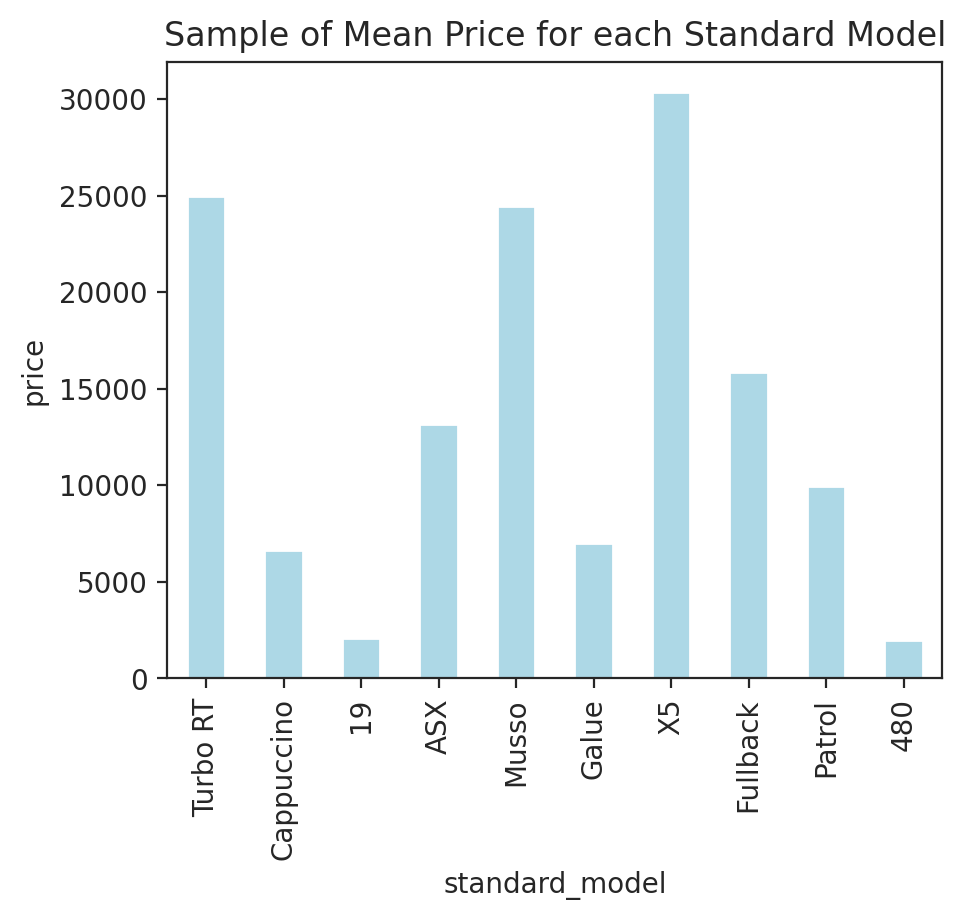

In [ ]:
plt.figure(figsize=(5,4))
df.groupby('standard_model')['price'].mean().sample(10).plot(kind="bar",color='lightblue')
plt.title('Sample of Mean Price for each Standard Model')
plt.ylabel('price')
plt.show()

<Figure size 500x400 with 0 Axes>

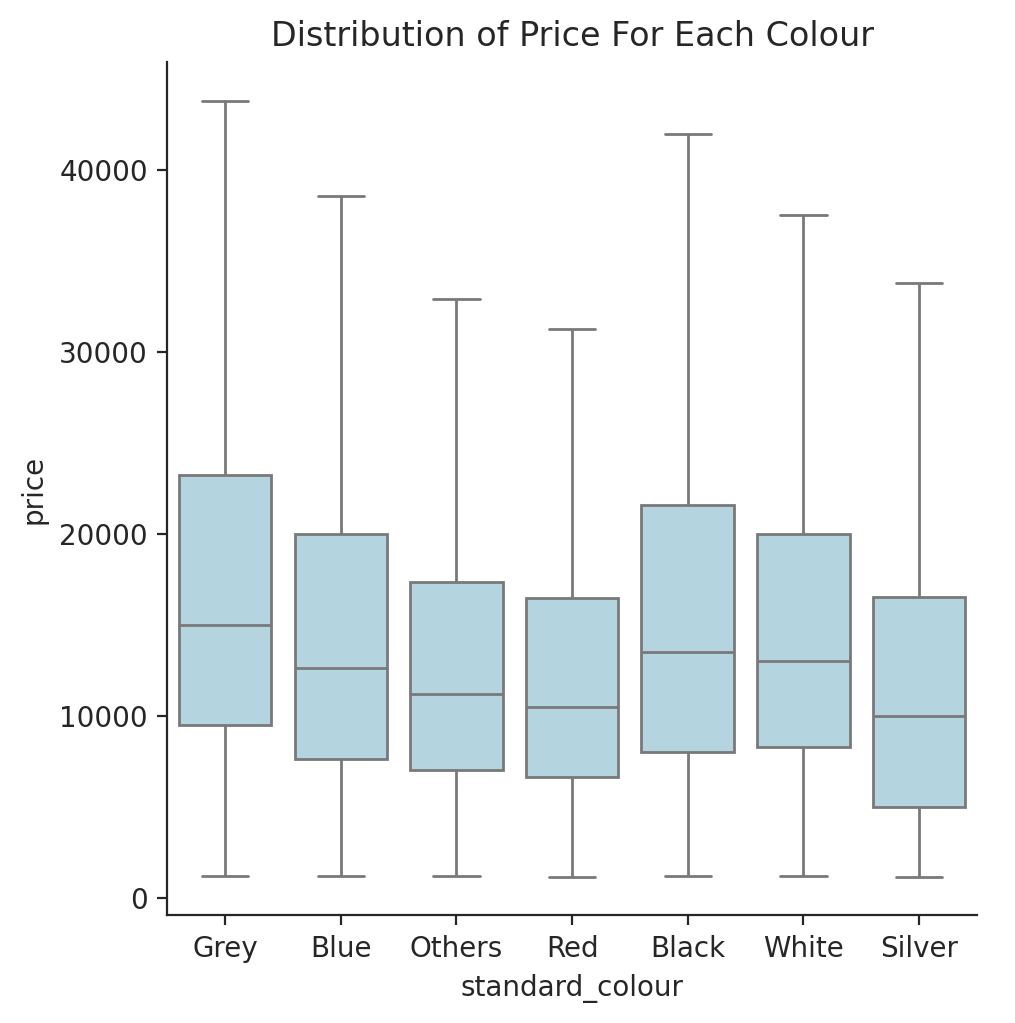

In [ ]:
##Price has same relatively same range for each categories of colour
plt.figure(figsize=(5,4))
sns.catplot(x='standard_colour', y='price', data=df, kind='box', showfliers=False,color='lightblue')
plt.title('Distribution of Price For Each Colour')
plt.show()

In [ ]:
df

mileage standard_colour standard_make     standard_model  \
0           0.00            Grey         Volvo               XC90   
1      108230.00            Blue        Jaguar                 XF   
2        7800.00            Grey         SKODA               Yeti   
3       45000.00          Others      Vauxhall              Mokka   
4       64000.00            Grey    Land Rover  Range Rover Sport   
...          ...             ...           ...                ...   
402000   5179.00            Grey       Peugeot                208   
402001 110000.00             Red       Peugeot                107   
402002  52760.00           White        Nissan            Qashqai   
402003  10250.00             Red        Abarth                595   
402004  14000.00          Silver          Audi           A4 Avant   

       vehicle_condition  year_of_registration  price  body_type  \
0                    NEW               2020.00  73970        SUV   
1                   USED               2011.00   7000     Saloon   
2                   USED               2017.00  14000        SUV   
3                   USED               2016.00   7995  Hatchback   
4                   USED               2015.00  26995        SUV   
...                  ...                   ...    ...        ...   
402000              USED               2019.00  10595  Hatchback   
402001              USED               2009.00   2000  Hatchback   
402002              USED               2012.00   7250        SUV   
402003              USED               2015.00  11490  Hatchback   
402004              USED               2014.00  20520     Estate   

        crossover_car_and_van              fuel_type   age  
0                           0  Petrol Plug-in Hybrid  0.00  
1                           0                 Diesel  9.00  
2                           0                 Petrol  3.00  
3                           0                 Diesel  4.00  
4                           0                 Diesel  5.00  
...                       ...                    ...   ...  
402000                      0                 Petrol  1.00  
402001                      0                 Petrol 11.00  
402002                      0                 Petrol  8.00  
402003                      0                 Petrol  5.00  
402004                      0                 Diesel  1.00  

[393507 rows x 11 columns]

<Axes: xlabel='mileage', ylabel='price'>

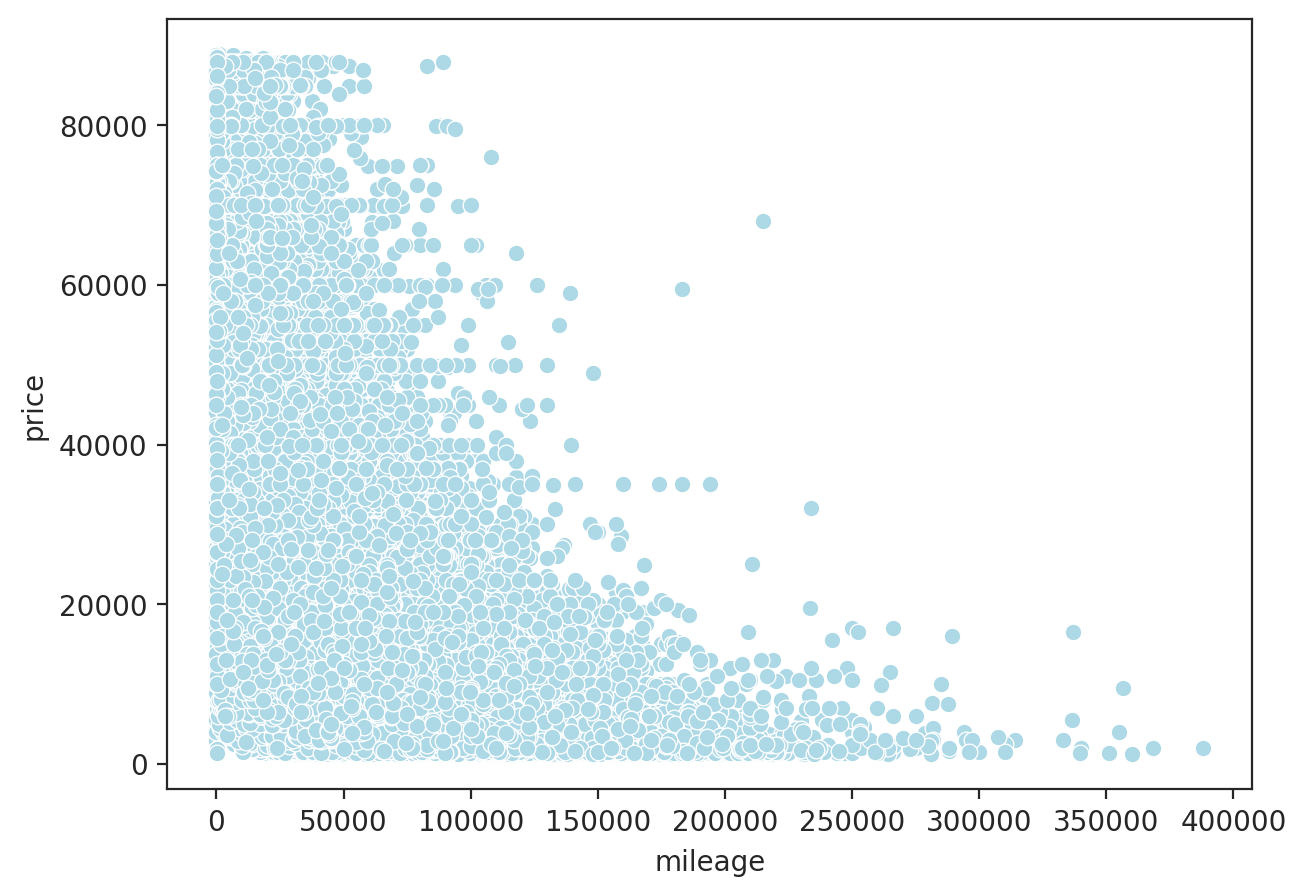

In [ ]:
sns.scatterplot(data = df, x ='mileage', y = 'price', color = 'lightblue')

<Axes: >

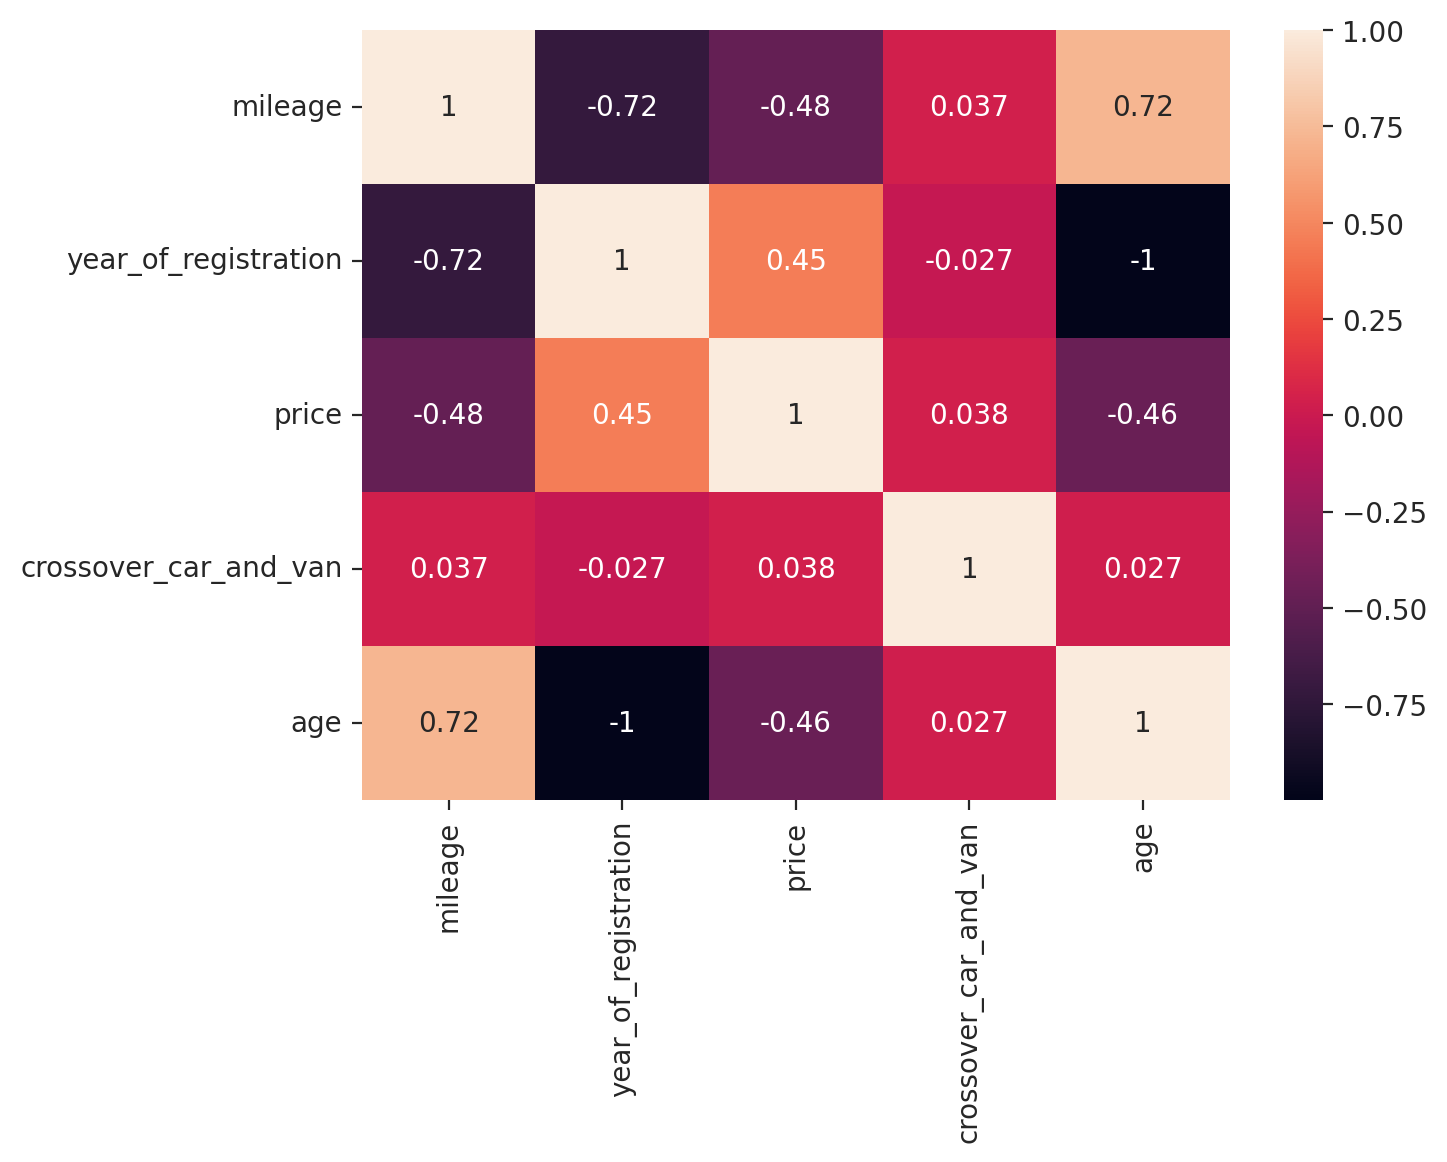

In [ ]:
sns.heatmap(data =df[df.select_dtypes('number').columns].corr(), annot = True)

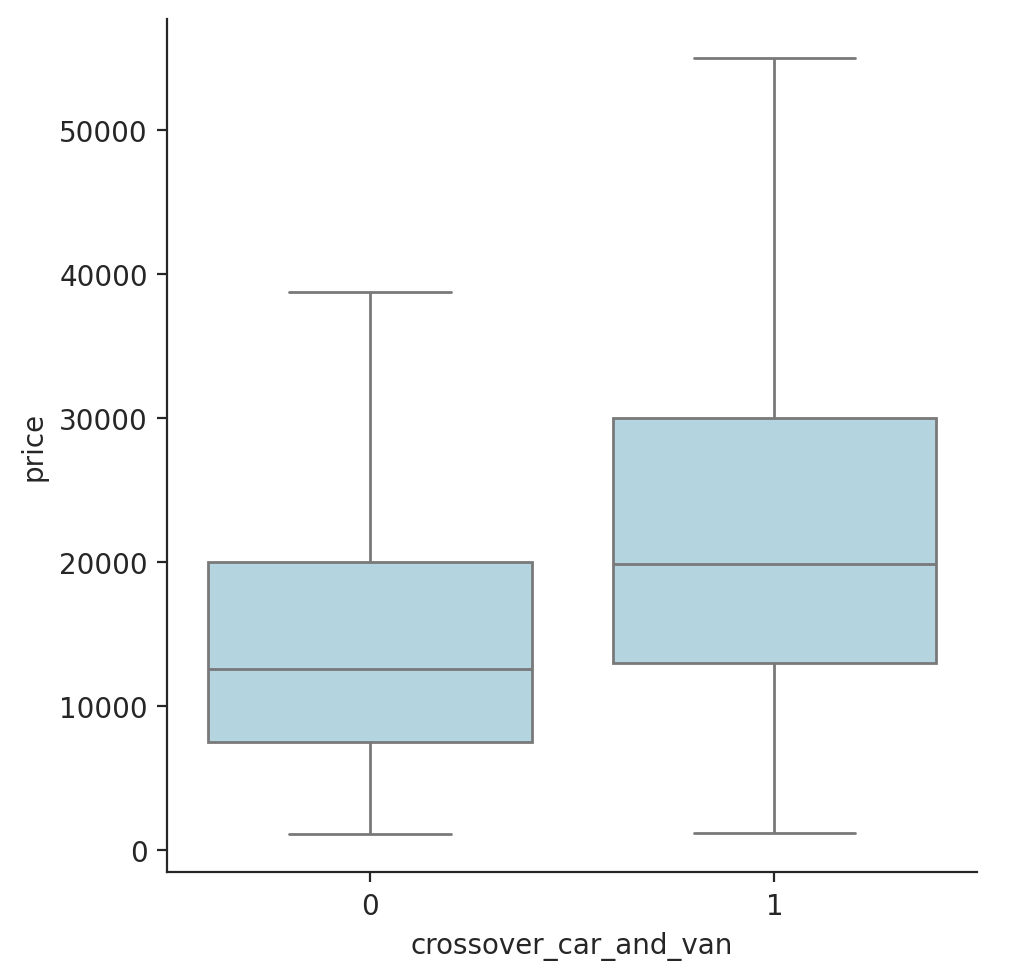

In [ ]:
sns.catplot(data=df, x="crossover_car_and_van",y = "price", kind='box', showfliers=False,color='lightblue')

In [ ]:
df.select_dtypes('number').columns

Index(['mileage', 'year_of_registration', 'price', 'crossover_car_and_van',
       'age'],
      dtype='object')

## **DATA SPLITTING**

In [ ]:
X = df.drop(["price","standard_colour",'year_of_registration'], axis = 1)
y = df["price"]

In [ ]:
cat_feat = X.drop(columns = X.select_dtypes('object')).columns
num_feat = X.drop(columns = X.select_dtypes('number')).columns

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=0
)

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(
  X, y, test_size=0.2, random_state=0
)

In [ ]:
y_train = np.log1p(y_train)

In [ ]:
y_test = np.log1p(y_test)

In [ ]:
X_train

mileage standard_make     standard_model vehicle_condition  \
10176   26763.00         Honda               Jazz              USED   
129272     10.00       Renault               Clio              USED   
162581  59000.00         Mazda             Mazda5              USED   
158466   7800.00          Audi                 A3              USED   
227012   7477.00           BMW           3 Series              USED   
...          ...           ...                ...               ...   
367565 110000.00       Renault             Scenic              USED   
365829  40988.00         Lexus            NX 300h              USED   
155572  39000.00      Vauxhall               ADAM              USED   
120493  19240.00    Land Rover  Range Rover Sport              USED   
312325      0.00        Abarth                595               NEW   

        body_type  crossover_car_and_van      fuel_type   age  
10176   Hatchback                      0         Petrol  3.00  
129272  Hatchback                      0         Petrol  0.00  
162581        MPV                      0         Diesel  6.00  
158466  Hatchback                      0         Petrol  1.00  
227012     Saloon                      0         Petrol  0.00  
...           ...                    ...            ...   ...  
367565        MPV                      0         Diesel 13.00  
365829        SUV                      0  Petrol Hybrid  5.00  
155572  Hatchback                      0         Petrol  4.00  
120493        SUV                      0         Petrol  4.00  
312325  Hatchback                      0         Petrol  0.00  

[314805 rows x 8 columns]

##PREPROCESSING PIPELINE FUNCTION

In [ ]:
def create_pp_ppln(X, linear_model=False,scaling = False):

    numeric_features = X.select_dtypes(exclude='object').columns.tolist()
    numeric_transformer = Pipeline(
        steps=[
            ("imputer", SimpleImputer(strategy="mean")),
        ]
    )
    if scaling:
        numeric_transformer.steps.extend([
            ("scaler", StandardScaler()),
        ])
    if linear_model:
        numeric_transformer.steps.extend([
            ('poly', PolynomialFeatures(degree =2,include_bias=False))
        ])
    categorical_features = X.select_dtypes(include='object').columns.tolist()
    categorical_transformer = Pipeline(
        steps=[
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("encoder", TargetEncoder()),
        ]
    )
    if scaling:
        categorical_transformer.steps.extend([
            ("scaler", StandardScaler())
        ])

    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, numeric_features),
            ("cat", categorical_transformer, categorical_features),
        ],
        remainder='passthrough',
        verbose_feature_names_out=False
    )

    return preprocessor

In [ ]:
def create_regr_ppln(est, X, linear_model=False,scaling = False):
    """ """
    regr_pipe = Pipeline(
        steps=[
            ("pp", create_pp_ppln(X, linear_model,scaling)),
            ("regr", est)
        ]
    )

    return regr_pipe

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

##POLYNOMIAL FEATURES

<Axes: xlabel='mileage', ylabel='price'>

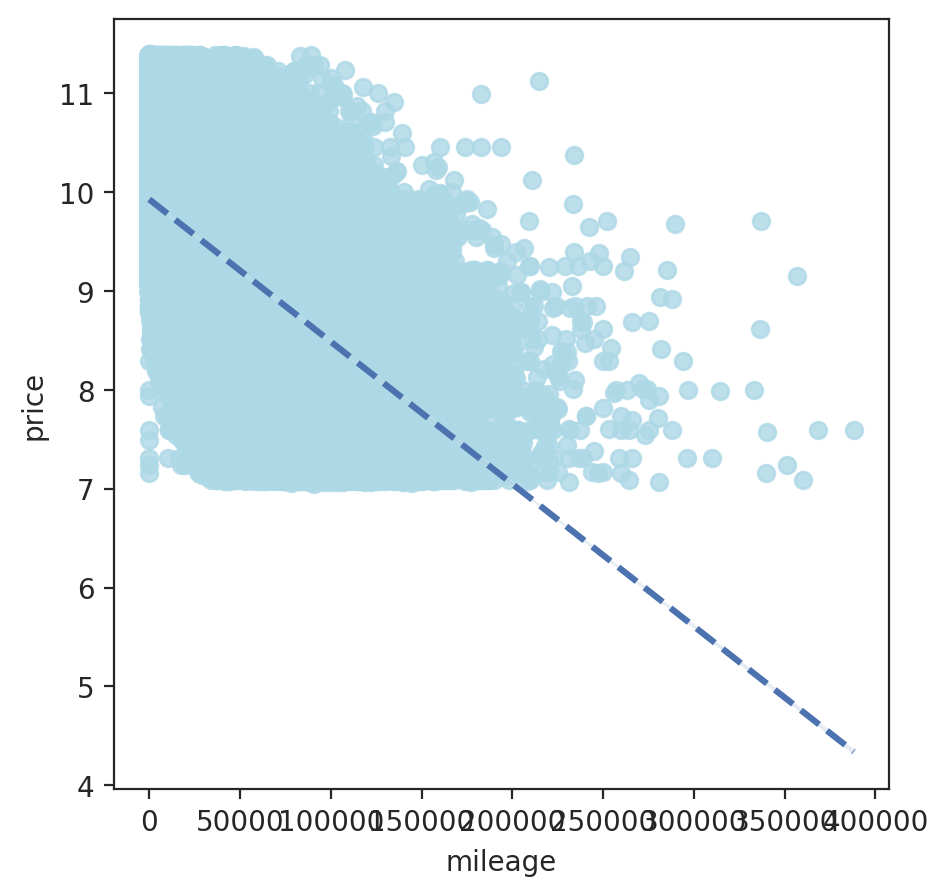

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.regplot( x =X_train['mileage'], y = y_train, scatter_kws={"color": "lightblue"}, line_kws={"linestyle": "--"},
)

<Axes: xlabel='mileage', ylabel='price'>

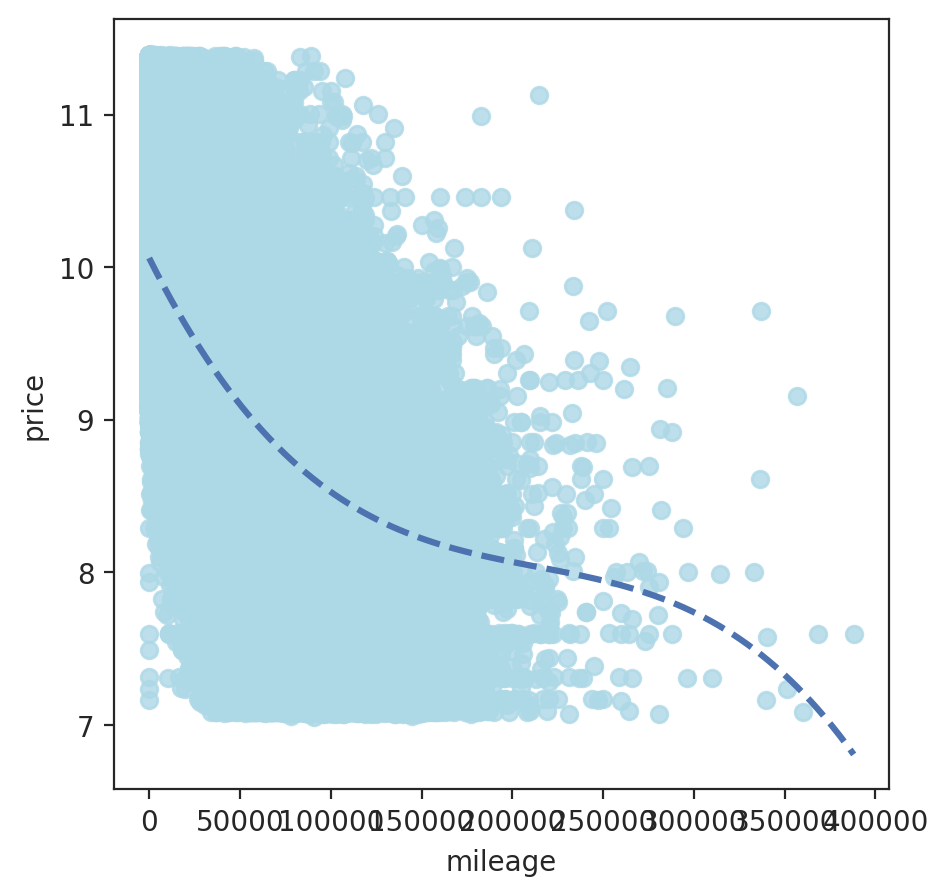

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.regplot( x =X_train['mileage'], y = y_train, order = 3,scatter_kws={"color": "lightblue"}, line_kws={"linestyle": "--"}, ax=ax, ci=None
)

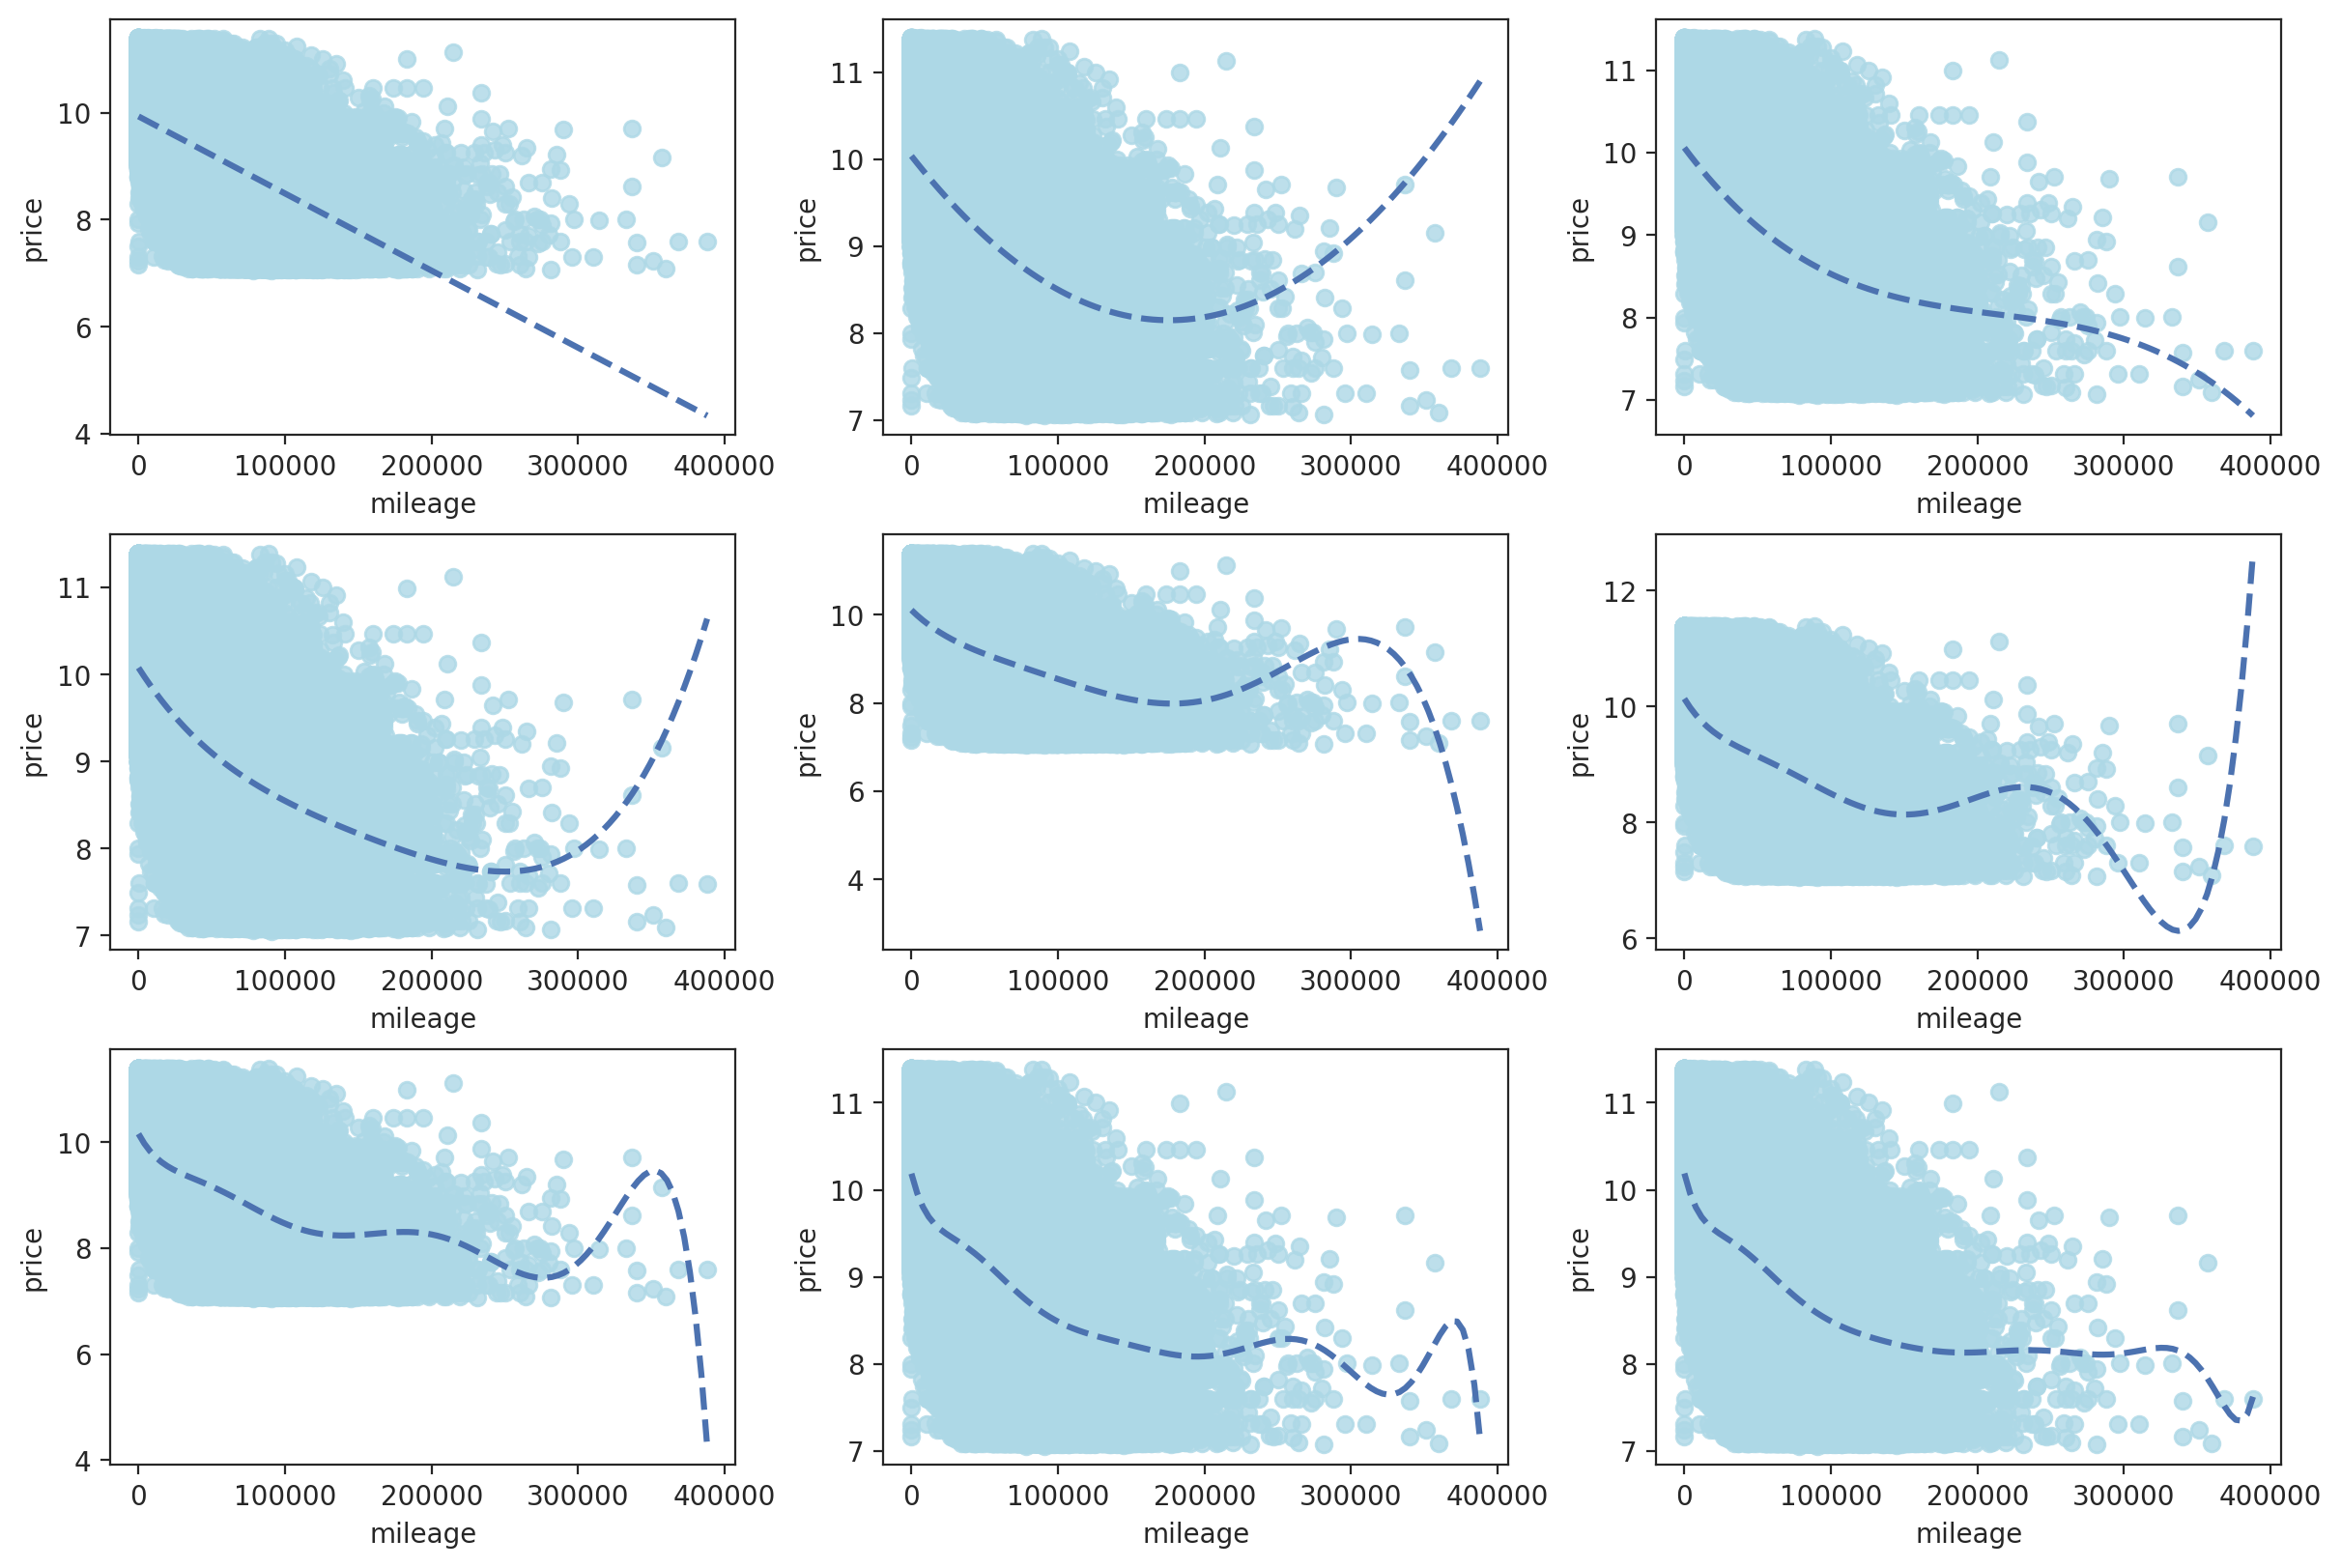

In [ ]:
orders = [1,2,3,4,5,6,7,9,11]
fig, axs = plt.subplots(3, 3, figsize=(12,8), constrained_layout=True)
lr_models = [ ]
for ax, order in zip(axs.ravel(), orders):
  sns.regplot( x =X_train['mileage'], y = y_train, order = order,scatter_kws={"color": "lightblue"}, line_kws={"linestyle": "--"}, ax=ax, ci=None
  )

In [ ]:
poly = create_regr_ppln(LinearRegression(), X_train, linear_model = True,scaling = True)

In [ ]:
poly.fit(X_train,y_train)

Pipeline(steps=[('pp',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['mileage',
                                                   'crossover_car_and_van',
                                                   'age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   TargetEncoder()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['standard_make',
                                                   'standard_model',
                                                   'vehicle_condition',
                                                   'body_type', 'fuel_type'])],
                                   verbose_feature_names_out=False)),
                ('regr', LinearRegression())])

In [ ]:
poly.score(X_train,y_train), poly.score(X_test,y_test)

(0.8655457667485293, 0.864695218622645)

In [ ]:
eval_results = cross_validate(
    poly, X_train, y_train, cv=10,
    scoring='r2',
    return_train_score=True
)

In [ ]:
eval_results

{'fit_time': array([2.69148207, 3.86052132, 2.80589151, 1.74994898, 1.77870584,
        1.89359641, 1.92485523, 2.80659604, 2.84079075, 2.66968155]),
 'score_time': array([0.16518545, 0.16202211, 0.11022544, 0.11084151, 0.11406517,
        0.11798143, 0.14582253, 0.17131996, 0.15312266, 0.11706924]),
 'test_score': array([0.86586542, 0.86511054, 0.86435651, 0.86620077, 0.86227445,
        0.864436  , 0.86549324, 0.86185109, 0.86716071, 0.86498233]),
 'train_score': array([0.86503095, 0.8654388 , 0.86548694, 0.86514589, 0.86578966,
        0.86541264, 0.86510185, 0.86570835, 0.86502858, 0.86544539])}

In [ ]:
plR = (eval_results['train_score'].mean(),eval_results['train_score'].std(), eval_results['test_score'].mean(),eval_results['test_score'].std())

In [ ]:
(eval_results['train_score'].mean(),eval_results['train_score'].std(),eval_results['test_score'].mean(),eval_results['test_score'].std())

(0.865358905049302,
 0.0002586381091316097,
 0.8647731069271559,
 0.0015708894722473638)

In [ ]:
X_train_p = poly['pp'].fit_transform(X_train,y_train)

In [ ]:
X_test_p = poly['pp'].transform(X_test)

In [ ]:
X_train_p.columns

Index(['mileage', 'crossover_car_and_van', 'age', 'mileage^2',
       'mileage crossover_car_and_van', 'mileage age',
       'crossover_car_and_van^2', 'crossover_car_and_van age', 'age^2',
       'standard_make', 'standard_model', 'vehicle_condition', 'body_type',
       'fuel_type'],
      dtype='object')

WITHOUT POLYNOMIALS

In [ ]:
lr = create_regr_ppln(LinearRegression(),X_train,linear_model = False, scaling = True)

In [ ]:
lr.fit(X_train,y_train)

Pipeline(steps=[('pp',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['mileage',
                                                   'crossover_car_and_van',
                                                   'age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   TargetEncoder()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['standard_make',
                                                   'standard_model',
                                                   'vehicle_condition',
                                                   'body_type', 'fuel_type'])],
                                   verbose_feature_names_out=False)),
                ('regr', LinearRegression())])

In [ ]:
lr.score(X_train,y_train),lr.score(X_test,y_test)

(0.8447333278098276, 0.8417611959582648)

In [ ]:
eval_results = cross_validate(lr,X_train,y_train, cv = 5, scoring="r2",return_train_score = True)

In [ ]:
eval_results

{'fit_time': array([1.44821382, 1.46818495, 1.44304538, 1.43869495, 2.08500957]),
 'score_time': array([0.15279841, 0.15535045, 0.16218376, 0.15056729, 0.21199512]),
 'test_score': array([0.84179897, 0.84513916, 0.84281001, 0.84312923, 0.8445687 ]),
 'train_score': array([0.84457086, 0.84380347, 0.84454029, 0.8441319 , 0.84392957])}

In [ ]:
lrR = (eval_results['train_score'].mean(),eval_results['train_score'].std(),eval_results['test_score'].mean(),eval_results['test_score'].std())

In [ ]:
(eval_results['train_score'].mean(),eval_results['train_score'].std(),eval_results['test_score'].mean(),eval_results['test_score'].std())

(0.8441952182764958,
 0.0003124823282428757,
 0.8434892142997553,
 0.00121123313749811)

In [ ]:
pd.DataFrame([plR,lrR], columns =['train_score_mean','train_score_std','test_score_mean','test_score_std'], index = ['With Polynomials','Without Polynomials'])

NameError: name 'plR' is not defined

In [ ]:
X_train1 = lr['pp'].fit_transform(X_train,y_train)

In [ ]:
X_test1 = lr['pp'].transform(X_test)

In [ ]:
X_train1

mileage  crossover_car_and_van   age  standard_make  standard_model  \
10176     -0.31                  -0.07 -0.34          -0.83           -0.86   
129272    -1.10                  -0.07 -1.06          -0.79           -1.00   
162581     0.64                  -0.07  0.37          -0.32           -2.11   
158466    -0.87                  -0.07 -0.82           0.77            0.08   
227012    -0.88                  -0.07 -1.06           0.71            0.05   
...         ...                    ...   ...            ...             ...   
367565     2.14                  -0.07  2.04          -0.79           -2.01   
365829     0.11                  -0.07  0.13           1.07            1.50   
155572     0.05                  -0.07 -0.11          -1.38           -1.04   
120493    -0.53                  -0.07 -0.11           2.12            1.73   
312325    -1.10                  -0.07 -1.06           0.42            0.42   

        vehicle_condition  body_type  fuel_type  
10176               -0.29      -1.04      -0.63  
129272              -0.29      -1.04      -0.63  
162581              -0.29      -0.98       0.33  
158466              -0.29      -1.04      -0.63  
227012              -0.29       0.60      -0.63  
...                   ...        ...        ...  
367565              -0.29      -0.98       0.33  
365829              -0.29       1.20       1.85  
155572              -0.29      -1.04      -0.63  
120493              -0.29       1.20      -0.63  
312325               3.44      -1.04      -0.63  

[314805 rows x 8 columns]

# **AUTOMATIC FEATURE SELECTION**


SELECT KBEST

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

In [ ]:
kbest = []
for k in range(1,9):
  selector = SelectKBest(f_regression, k=k).fit(X_train1, y_train)
  X_sel = selector.transform(X_train1)
  model = LinearRegression().fit(X_sel, y_train)
  scores = cross_val_score(model, X_sel, y_train)
  kbest.append(scores.mean())

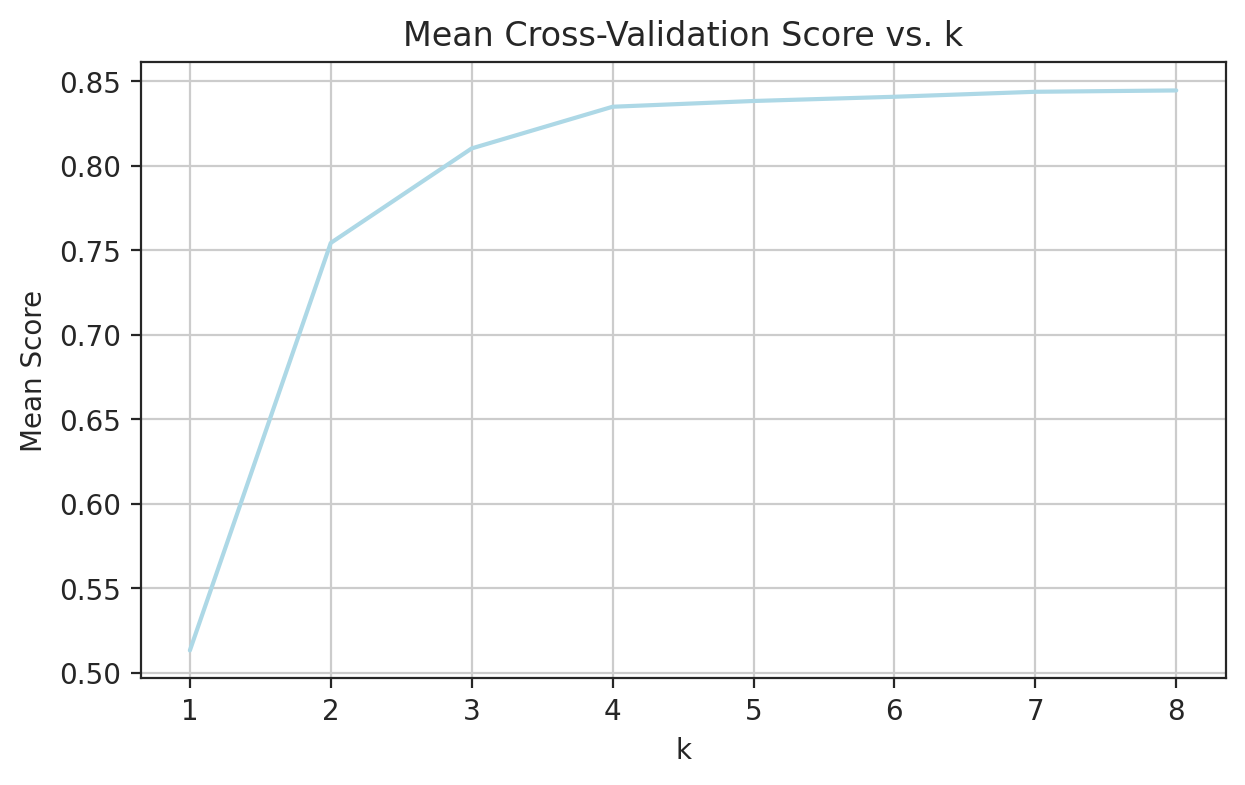

In [ ]:
plt.figure(figsize=(7, 4))
plt.plot(range(1, 9),kbest,color ='lightblue')
plt.ylabel('Mean Score')
plt.xlabel('k')
plt.title('Mean Cross-Validation Score vs. k')
plt.grid(True)
plt.show()

In [ ]:
selector = SelectKBest(f_regression, k=8).fit(X_train1, y_train)
X_sel = selector.transform(X_train1)
model = LinearRegression().fit(X_sel, y_train)
scores = cross_val_score(model, X_sel, y_train)

In [ ]:
X_train1 = selector.transform(X_train1)
X_test = selector.transform(X_test)

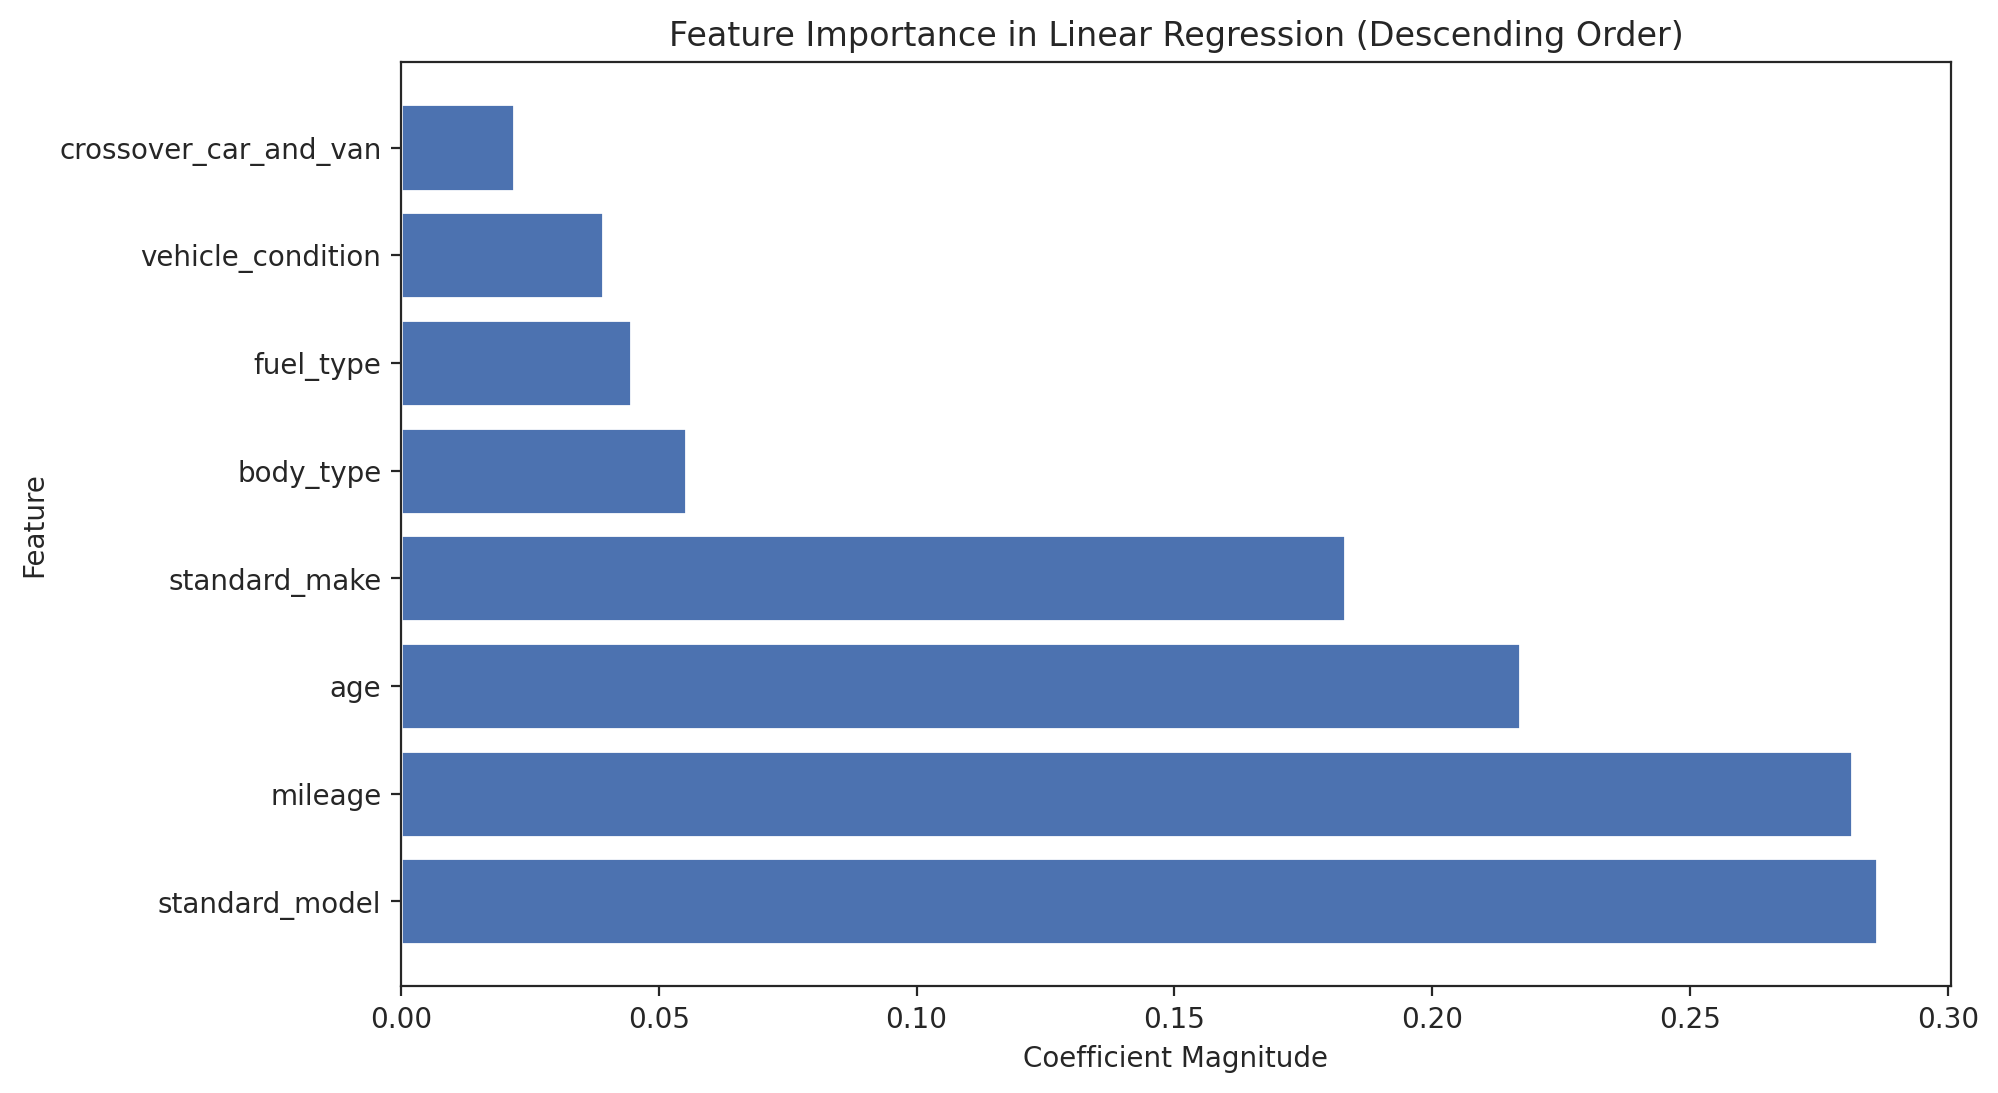

In [ ]:
coefficients = model.coef_
feature_names = X_train1.columns

sorted_indices = np.argsort(np.abs(coefficients))[::-1]  # Descending order indices
sorted_coefficients = coefficients[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot coefficients
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, np.abs(sorted_coefficients))  # Use np.abs() to plot absolute values
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Importance in Linear Regression (Descending Order)')
plt.show()

In [ ]:
selector.get_feature_names_out()

array(['mileage', 'crossover_car_and_van', 'age', 'standard_make',
       'standard_model', 'vehicle_condition', 'body_type', 'fuel_type'],
      dtype=object)

In [ ]:
scores.mean(), scores.std()

(0.8446966214219651, 0.0012039476455358294)

<Axes: >

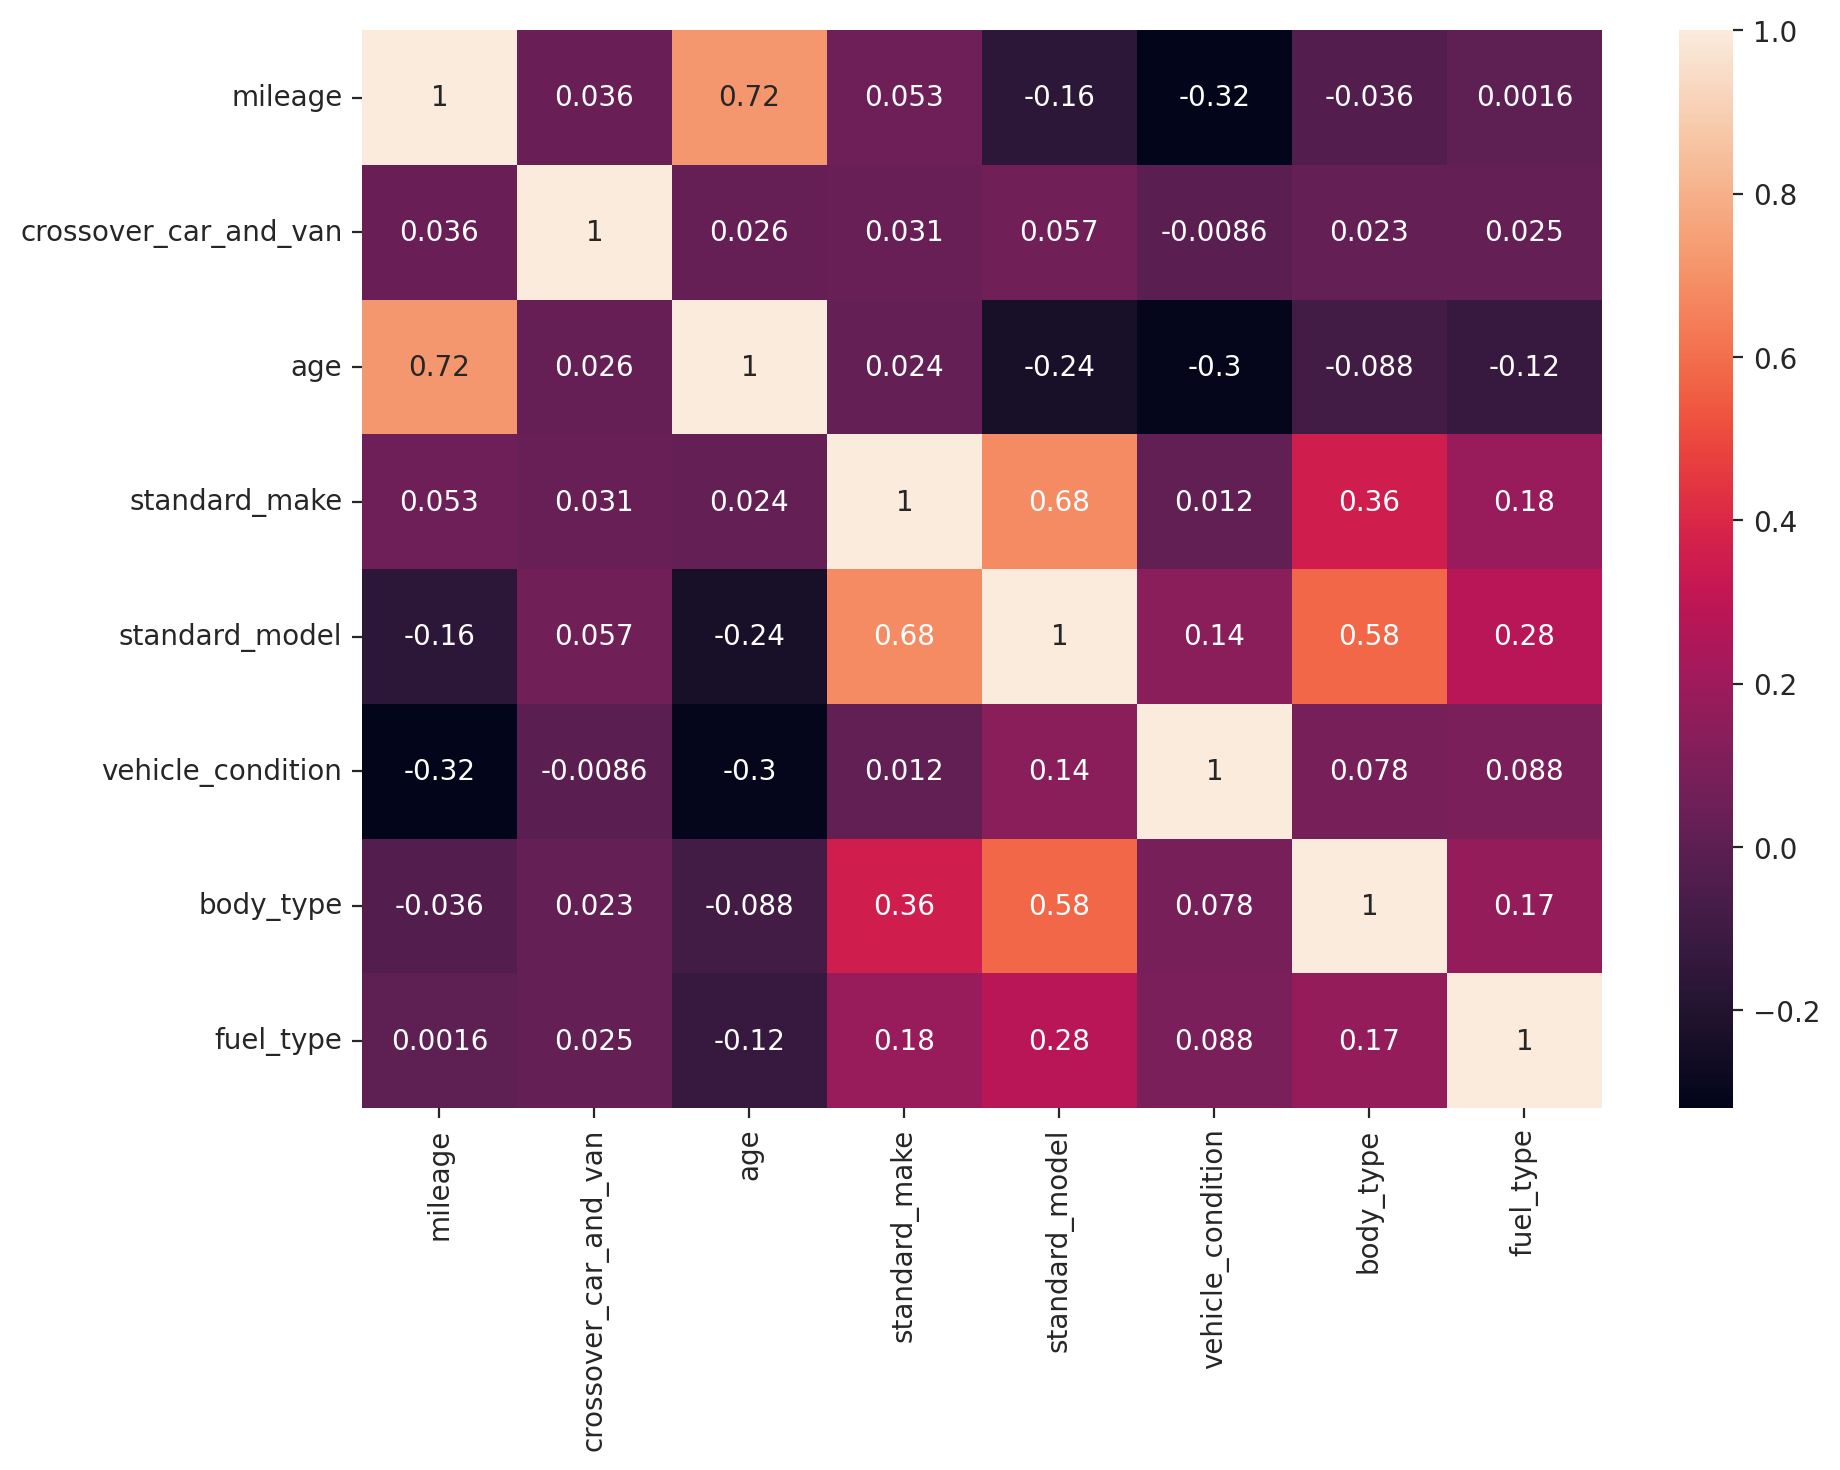

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(data=X_train1.corr(), annot=True)

RECURSIVE FEATURE ELIMINATION

In [ ]:
from sklearn.feature_selection import RFECV

In [ ]:
model = LinearRegression()
ref_selector = RFECV(model, step=1, cv=5)

In [ ]:
ref_selector.fit(X_train1,y_train)

RFECV(cv=5, estimator=LinearRegression())

In [ ]:
X_ref = ref_selector.transform(X_train1)

In [ ]:
ref_selector.get_feature_names_out()

array(['mileage', 'crossover_car_and_van', 'age', 'standard_make',
       'standard_model', 'vehicle_condition', 'body_type', 'fuel_type'],
      dtype=object)

In [ ]:
X_ref

mileage  crossover_car_and_van   age  standard_make  standard_model  \
10176     -0.31                  -0.07 -0.34          -0.83           -0.86   
129272    -1.10                  -0.07 -1.06          -0.79           -1.00   
162581     0.64                  -0.07  0.37          -0.32           -2.11   
158466    -0.87                  -0.07 -0.82           0.77            0.08   
227012    -0.88                  -0.07 -1.06           0.71            0.05   
...         ...                    ...   ...            ...             ...   
367565     2.14                  -0.07  2.04          -0.79           -2.01   
365829     0.11                  -0.07  0.13           1.07            1.50   
155572     0.05                  -0.07 -0.11          -1.38           -1.04   
120493    -0.53                  -0.07 -0.11           2.12            1.73   
312325    -1.10                  -0.07 -1.06           0.42            0.42   

        vehicle_condition  body_type  fuel_type  
10176               -0.29      -1.04      -0.63  
129272              -0.29      -1.04      -0.63  
162581              -0.29      -0.98       0.33  
158466              -0.29      -1.04      -0.63  
227012              -0.29       0.60      -0.63  
...                   ...        ...        ...  
367565              -0.29      -0.98       0.33  
365829              -0.29       1.20       1.85  
155572              -0.29      -1.04      -0.63  
120493              -0.29       1.20      -0.63  
312325               3.44      -1.04      -0.63  

[314805 rows x 8 columns]

In [ ]:
model = LinearRegression().fit(X_ref, y_train)
scores = cross_val_score(model, X_ref, y_train)
scores.mean(), scores.std()

(0.8446966214219651, 0.0012039476455358294)

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

In [ ]:
sfs_forward = SequentialFeatureSelector(
    LinearRegression(), n_features_to_select=0.7, direction="backward"
).fit(X_train1, y_train)

In [ ]:
sfs_forward.get_feature_names_out()

array(['mileage', 'age', 'standard_make', 'standard_model', 'body_type'],
      dtype=object)

In [ ]:
X_sel = sfs_forward.transform(X_train1)

In [ ]:
X_train1 = sfs_forward.transform(X_train1)

In [ ]:
X_test1 = sfs_forward.transform(X_test1)

In [ ]:
X_train1

mileage   age  standard_make  standard_model  body_type
10176     -0.31 -0.34          -0.83           -0.86      -1.04
129272    -1.10 -1.06          -0.79           -1.00      -1.04
162581     0.64  0.37          -0.32           -2.11      -0.98
158466    -0.87 -0.82           0.77            0.08      -1.04
227012    -0.88 -1.06           0.71            0.05       0.60
...         ...   ...            ...             ...        ...
367565     2.14  2.04          -0.79           -2.01      -0.98
365829     0.11  0.13           1.07            1.50       1.20
155572     0.05 -0.11          -1.38           -1.04      -1.04
120493    -0.53 -0.11           2.12            1.73       1.20
312325    -1.10 -1.06           0.42            0.42      -1.04

[314805 rows x 5 columns]

In [ ]:
model = LinearRegression().fit(X_sel, y_train)
scores = cross_val_score(model, X_sel, y_train)
scores.mean(), scores.std()

(0.8384531055559974, 0.001520753797488114)

##PRINCIPAL COMPONENT ANALYSIS

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA().fit(X_train1)

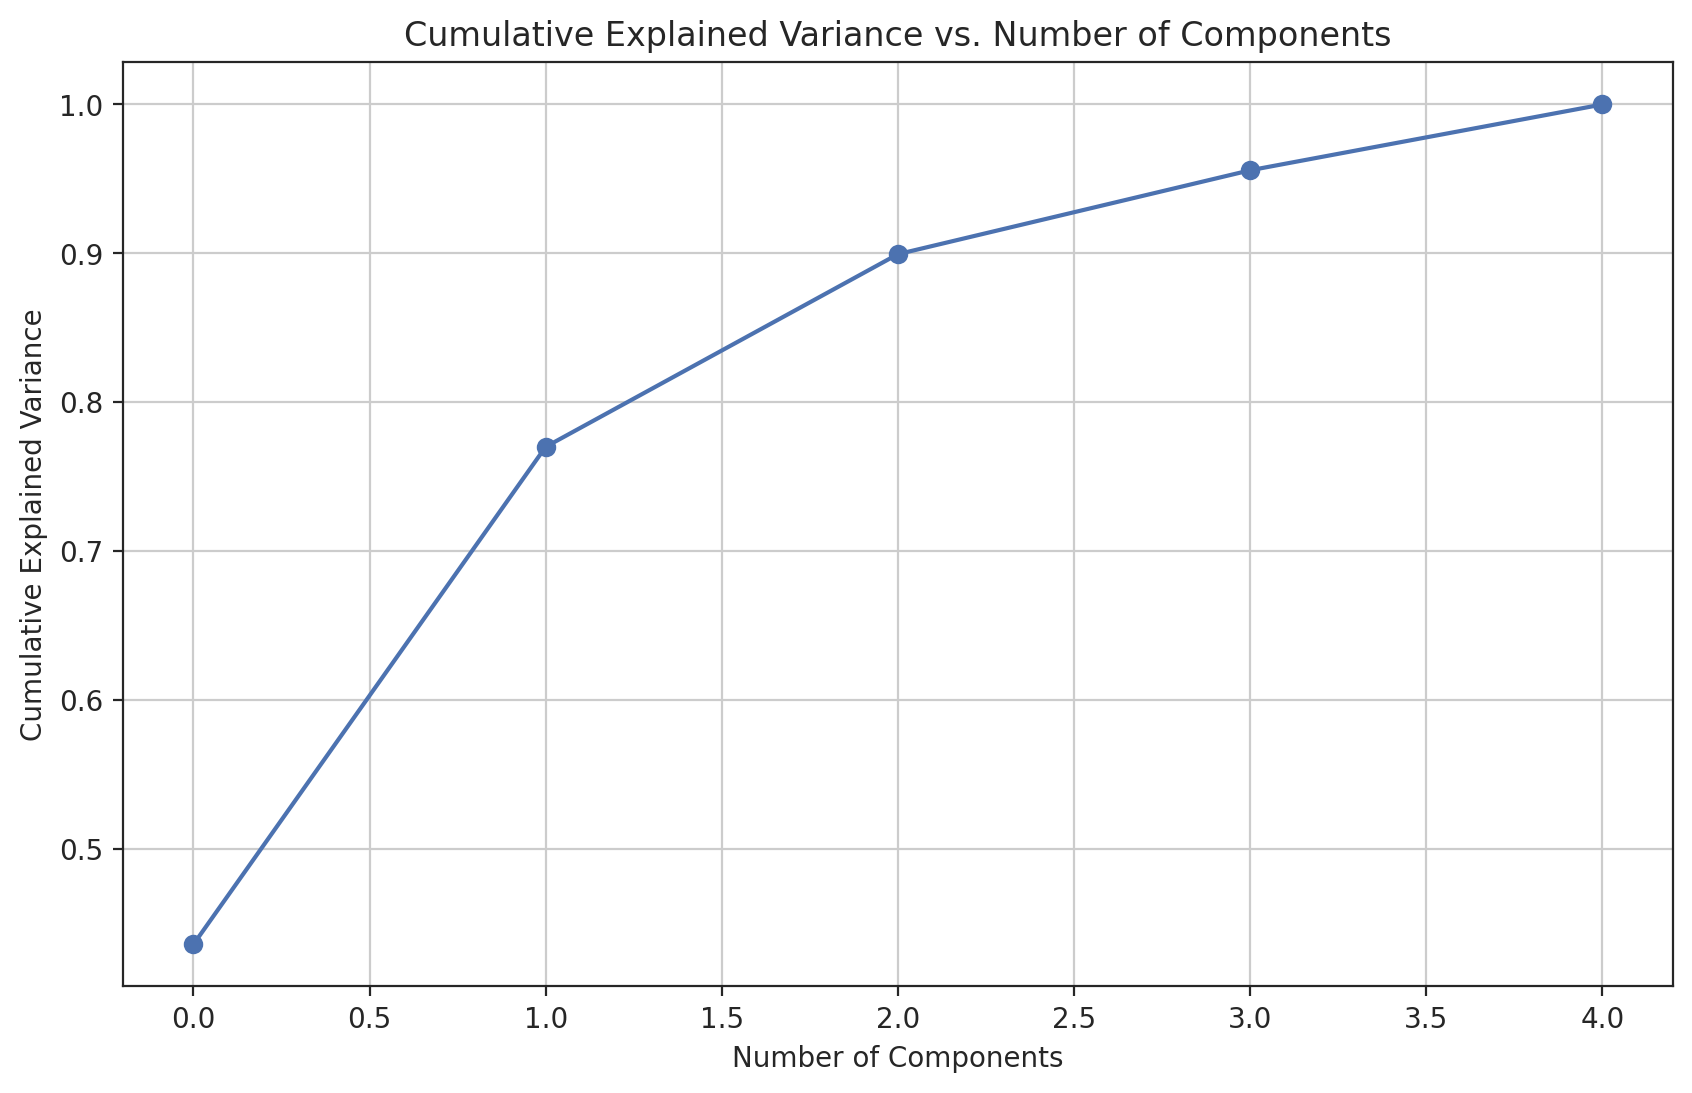

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [ ]:
pca = PCA(n_components=4)

In [ ]:
X_train_pca = pca.fit_transform(X_train1)

In [ ]:
X_test_pca = pca.transform(X_test1)

In [ ]:
X_train_pca

pca0  pca1  pca2  pca3
10176   1.23 -1.06  0.27 -0.10
129272  0.86 -2.03  0.35  0.03
162581  2.20 -0.02  0.30  0.06
158466 -0.41 -1.01  1.37  0.06
227012 -1.22 -0.84  0.03  0.13
...      ...   ...   ...   ...
367565  3.28  1.85 -0.11 -0.02
365829 -1.93  1.03 -0.16  0.03
155572  1.78 -0.91 -0.11 -0.25
120493 -2.83  0.87  0.53  0.45
312325 -0.59 -1.37  1.23 -0.07

[314805 rows x 4 columns]

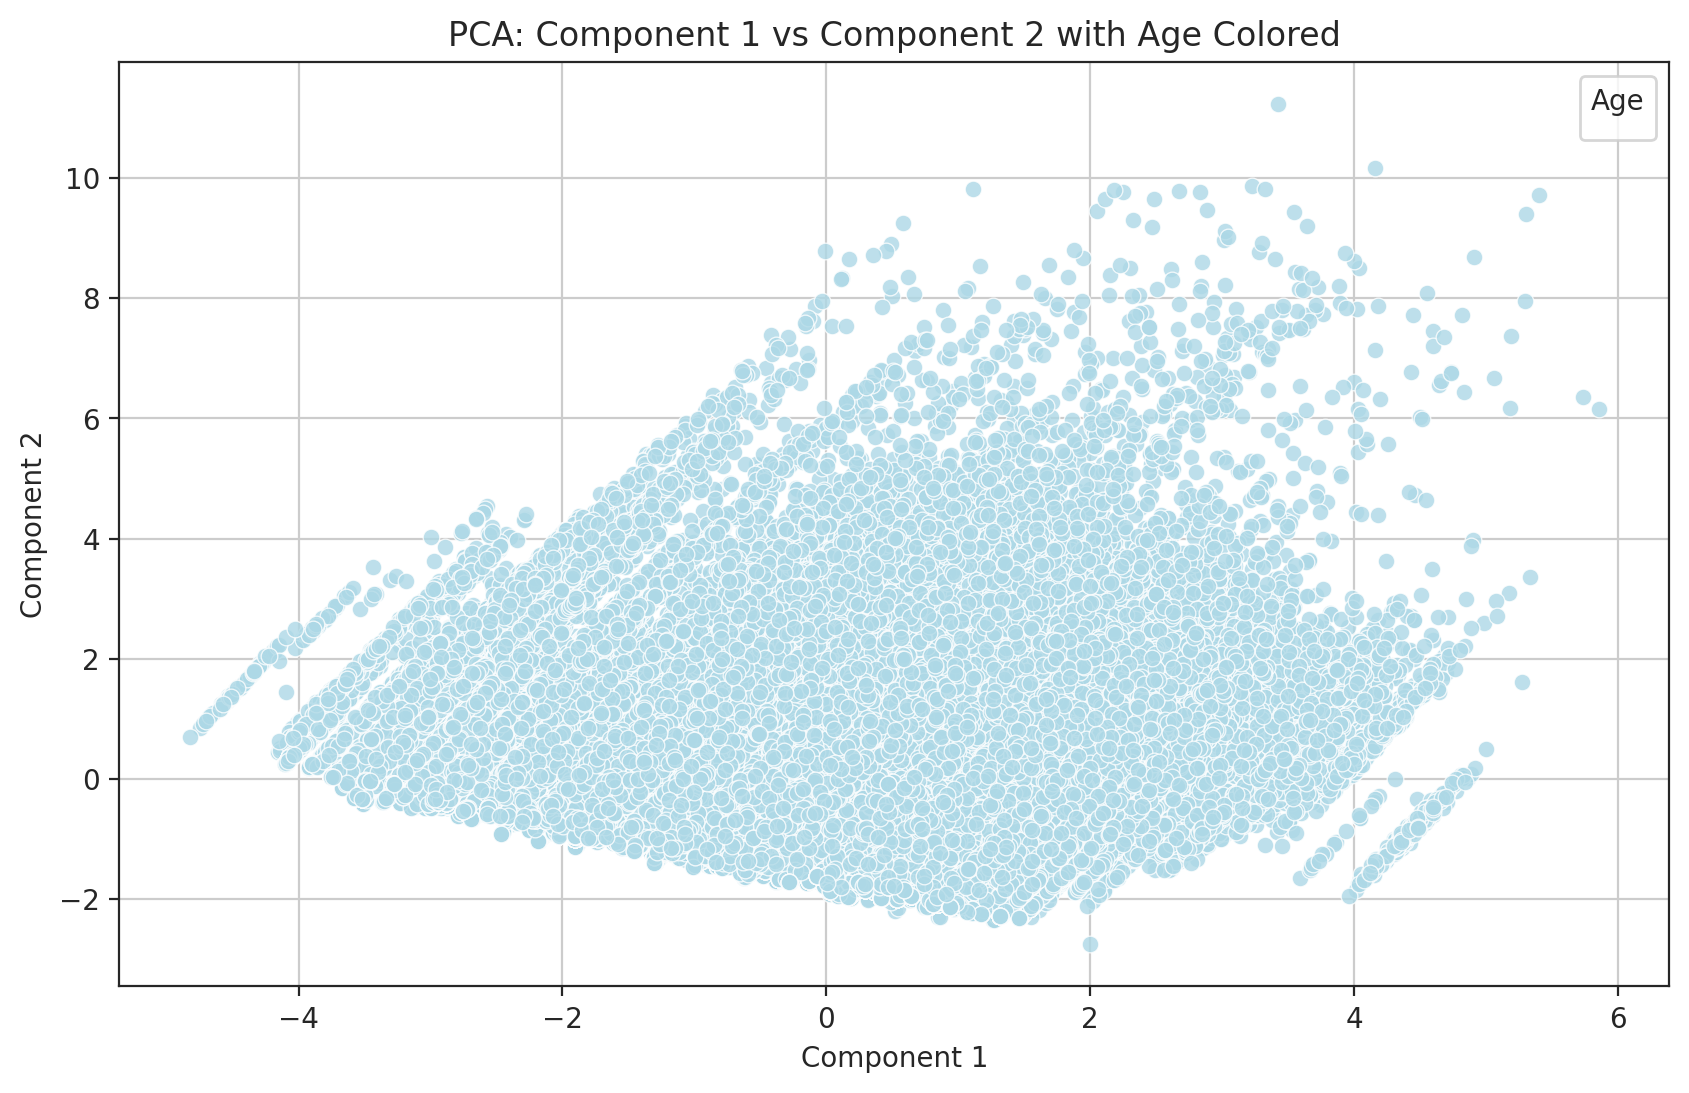

In [ ]:


# Plot component 1 versus component 2 with colors representing age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca0', y='pca1', data=X_train_pca, color = "lightblue", alpha=0.8)
plt.title('PCA: Component 1 vs Component 2 with Age Colored')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Age')
plt.grid(True)
plt.show()

##**MODEL BUILDING**

In [ ]:
def build_model(est, X, linear_model=False,scaling = False):
    """ """
    regr_pipe = Pipeline(
        steps=[
            ("pp", create_pp_ppln(X, linear_model,scaling)),
            ("sel", SequentialFeatureSelector(LinearRegression(), n_features_to_select=0.7, direction="backward").fit(X_train1, y_train)),
            ("regr", est)
        ]
    )

    return regr_pipe

In [ ]:
def tree_model(est, X, linear_model=False,scaling = False):
    """ """
    regr_pipe = Pipeline(
        steps=[
            ("pp", create_pp_ppln(X, linear_model,scaling)),
            ("sel", SequentialFeatureSelector(LinearRegression(), n_features_to_select=0.7, direction="backward").fit(X_train1, y_train)),
            ("regr", est)
        ]
    )

    return regr_pipe

Linear Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [ ]:
lr_pca = build_model(LinearRegression(),X_train_pca,linear_model=False,scaling=True)

In [ ]:
lr_pca.fit(X_train_pca,y_train)

Pipeline(steps=[('pp',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['pca0', 'pca1', 'pca2',
                                                   'pca3']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   TargetEncoder()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [])],
                                   verbose_feature_names_out=False)),
                ('sel',
                 SequentialFeatureSelector(direction='backward',
                                           estimator=LinearRegression(),
                                           n_features_to_select=0.7)),
                ('regr', LinearRegression())])

In [ ]:
lr_pca.score(X_train_pca,y_train)

0.8208146950248754

In [ ]:
lr_pca.score(X_test_pca,y_test)

0.8173756669881633

In [ ]:
X_train

mileage standard_make     standard_model vehicle_condition  \
10176   26763.00         Honda               Jazz              USED   
129272     10.00       Renault               Clio              USED   
162581  59000.00         Mazda             Mazda5              USED   
158466   7800.00          Audi                 A3              USED   
227012   7477.00           BMW           3 Series              USED   
...          ...           ...                ...               ...   
367565 110000.00       Renault             Scenic              USED   
365829  40988.00         Lexus            NX 300h              USED   
155572  39000.00      Vauxhall               ADAM              USED   
120493  19240.00    Land Rover  Range Rover Sport              USED   
312325      0.00        Abarth                595               NEW   

        body_type  crossover_car_and_van      fuel_type   age  
10176   Hatchback                      0         Petrol  3.00  
129272  Hatchback                      0         Petrol  0.00  
162581        MPV                      0         Diesel  6.00  
158466  Hatchback                      0         Petrol  1.00  
227012     Saloon                      0         Petrol  0.00  
...           ...                    ...            ...   ...  
367565        MPV                      0         Diesel 13.00  
365829        SUV                      0  Petrol Hybrid  5.00  
155572  Hatchback                      0         Petrol  4.00  
120493        SUV                      0         Petrol  4.00  
312325  Hatchback                      0         Petrol  0.00  

[314805 rows x 8 columns]

In [ ]:
lr = build_model(LinearRegression(),X_train,linear_model=False,scaling=True)

In [ ]:
lr.fit(X_train,y_train)

Pipeline(steps=[('pp',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['mileage',
                                                   'crossover_car_and_van',
                                                   'age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   TargetEncoder()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['standard_make',
                                                   'standard_model',
                                                   'vehicle_condition',
                                                   'body_type', 'fuel_type'])],
                                   verbose_feature_names_out=False)),
                ('sel',
                 SequentialFeatureSelector(direction='backward',
                                           estimator=LinearRegression(),
                                           n_features_to_select=0.7)),
                ('regr', LinearRegression())])

In [ ]:
lr.score(X_train,y_train),lr.score(X_test,y_test)

(0.8384888294419908, 0.8351335504282162)

In [ ]:
eval_result = cross_validate(lr,X_train,y_train, cv = 5, scoring = "r2",return_train_score = True)

In [ ]:
lrcv = (eval_result['train_score'].mean(),
        eval_result['train_score'].std(),
        eval_result['test_score'].mean(),
        eval_result['test_score'].std())

In [ ]:
lrr

0
0 0.84
1 0.00
2 0.84
3 0.00

In [ ]:
pd.DataFrame(
    [lrcv],
    columns=['test_mae_mean', 'test_mae_std', 'train_mae_mean', 'train_mae_std']
)

test_mae_mean  test_mae_std  train_mae_mean  train_mae_std
0           0.84          0.00            0.84           0.00

In [ ]:
from sklearn.metrics import PredictionErrorDisplay

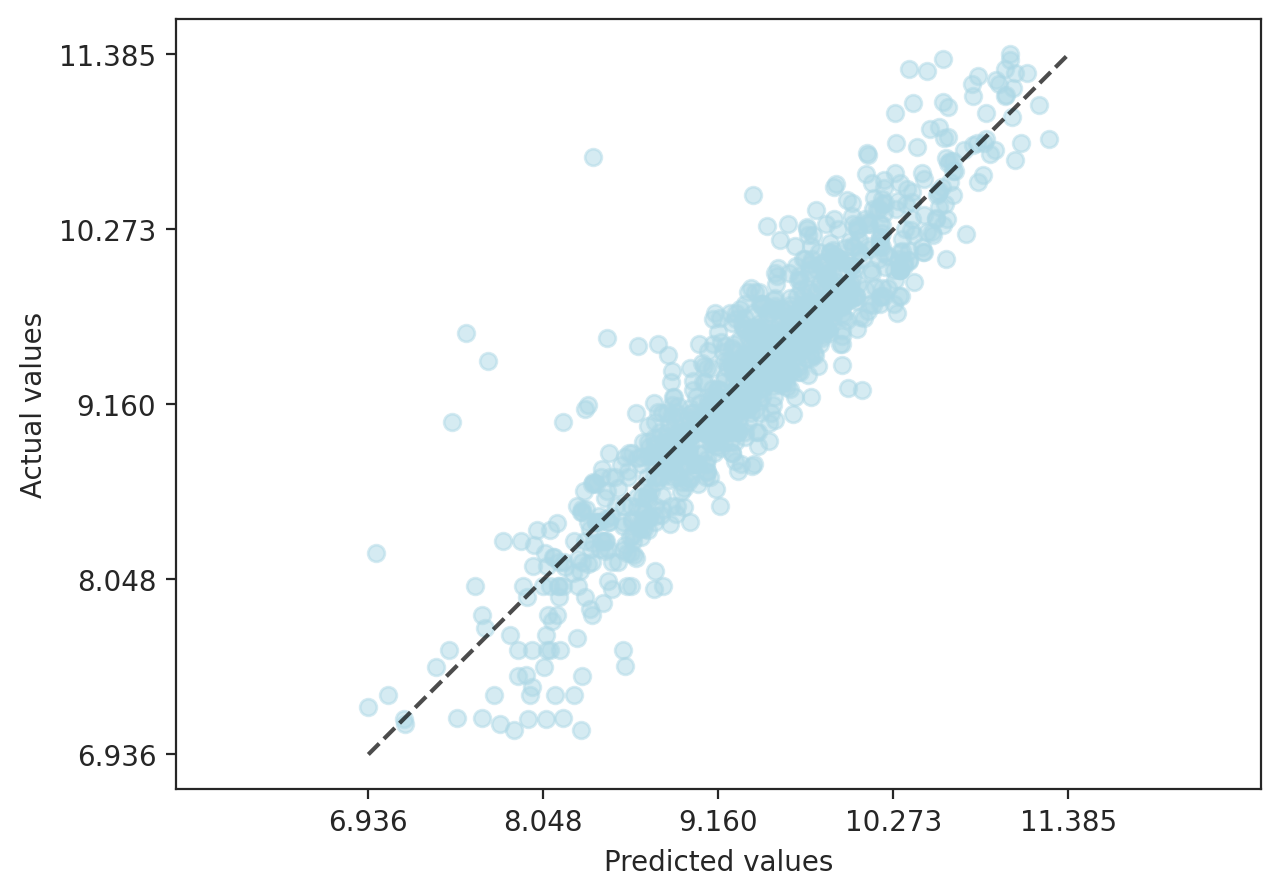

In [ ]:
PredictionErrorDisplay.from_estimator(
    lr, X_test, y_test, kind="actual_vs_predicted", scatter_kwargs=dict(alpha=0.5,color='lightblue')
);

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
lr_mae = mean_absolute_error(np.exp(y_test),np.exp(y_pred))

3484.3267940818364

##SHAP GLOBAL AND LOCAL EXPLANATIONS (LINEAR)

In [ ]:
def pp( X, linear_model=False,scaling= False):
    """ """
    regr_pipe = Pipeline(
        steps=[
            ("pp", create_pp_ppln(X, linear_model,scaling)),
            ("sel",SequentialFeatureSelector(LinearRegression(), n_features_to_select=0.7, direction="backward")),
        ]
    )
    return regr_pipe

In [ ]:
prep = pp(Xtrain,linear_model=False,scaling = True)

In [ ]:
xtrain = prep.fit_transform(Xtrain,ytrain)

In [ ]:
xtest = prep.transform(Xtest)

In [ ]:
model = LinearRegression().fit(xtrain,ytrain)

In [ ]:
explainer = shap.LinearExplainer(model,xtrain)

In [ ]:
shap_values = explainer(xtest)

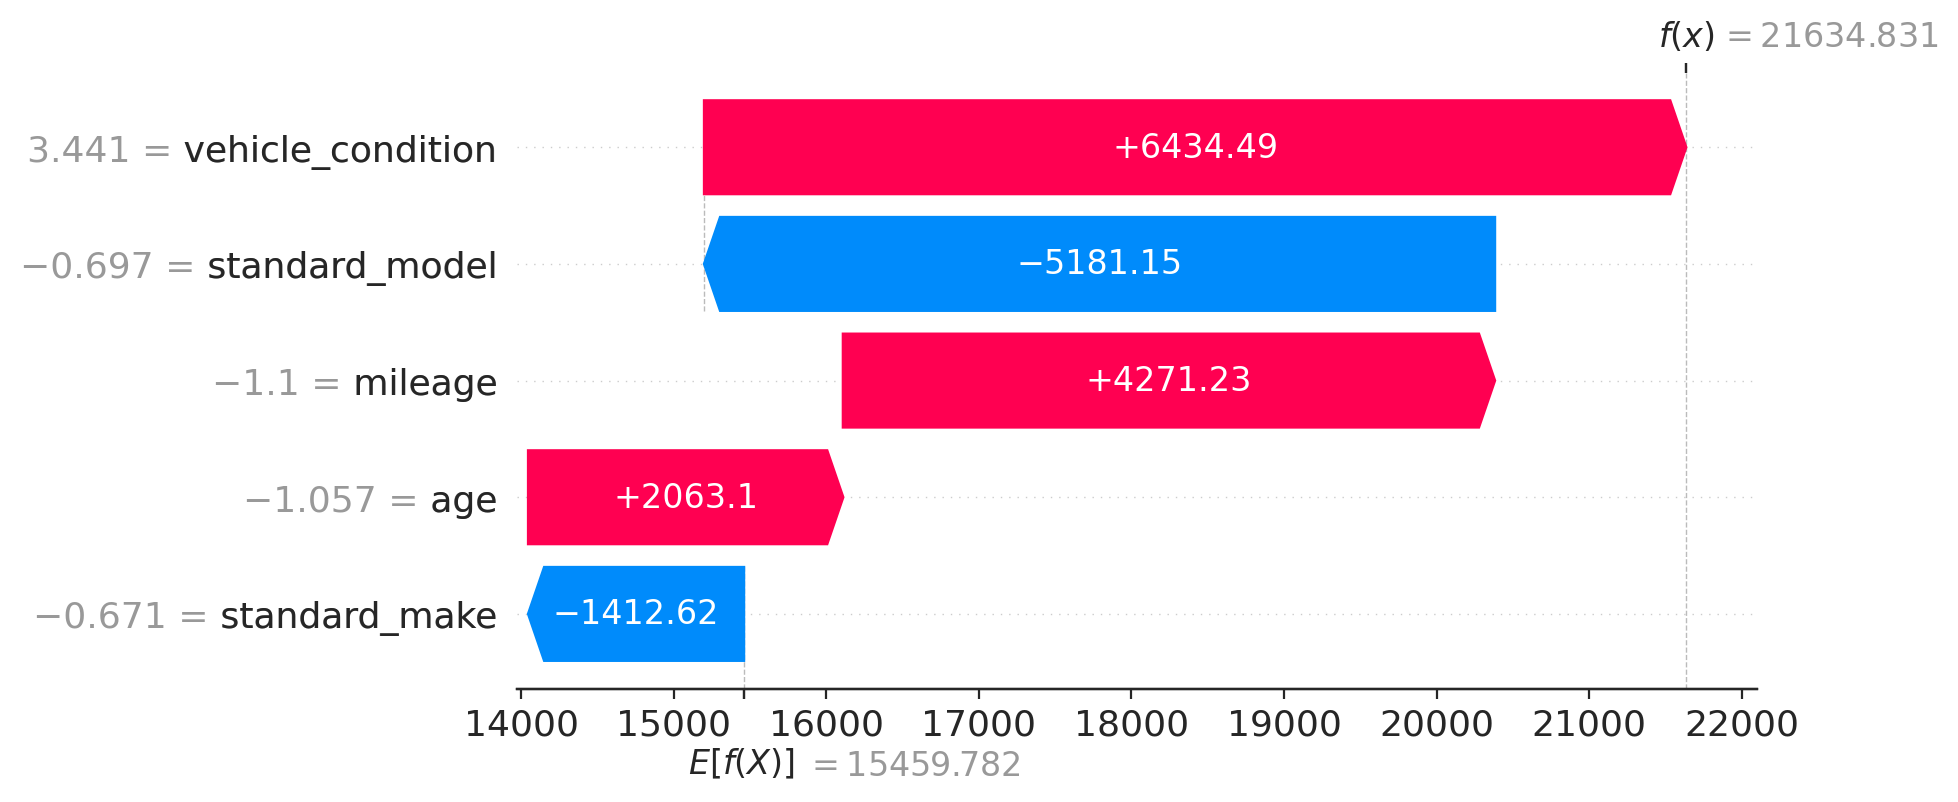

In [ ]:
shap.waterfall_plot(shap_values[2341])

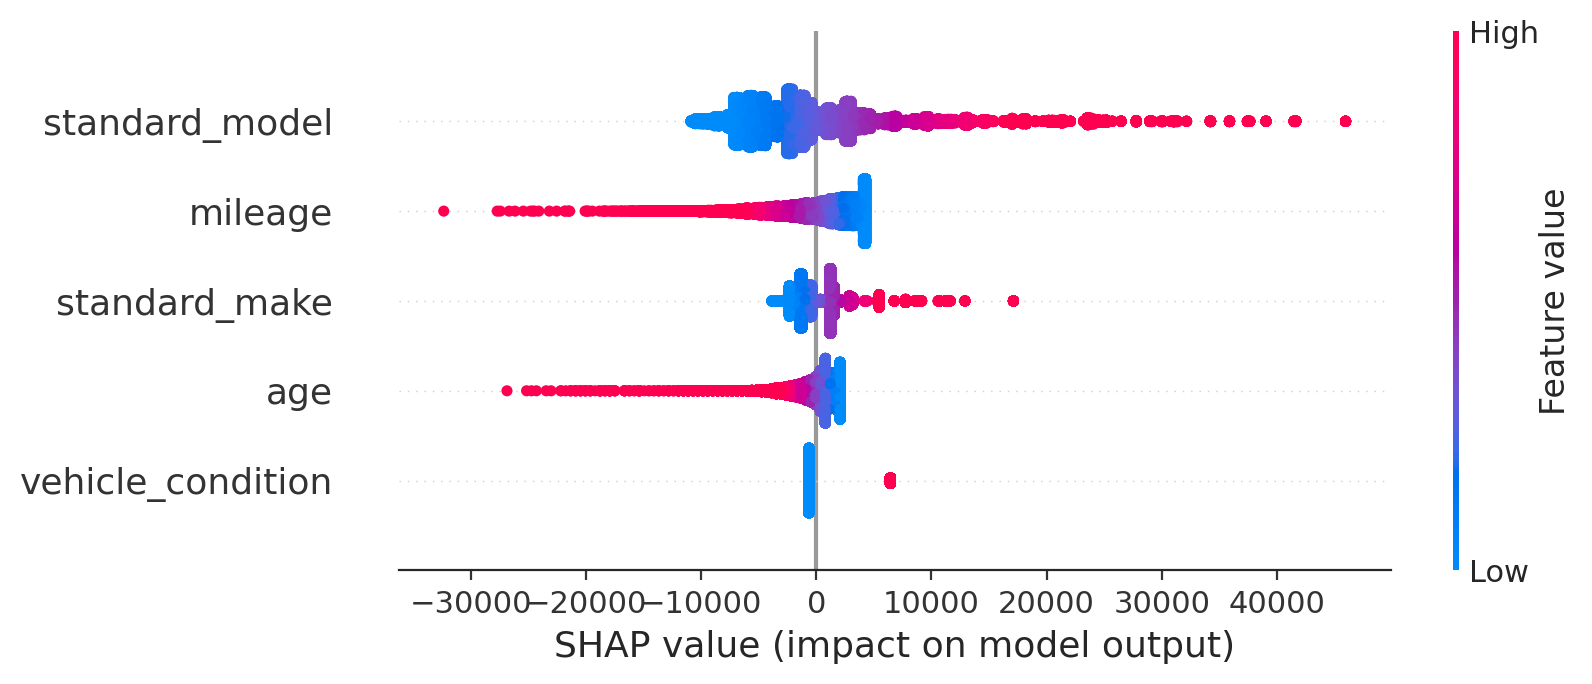

In [ ]:
# global model
shap.plots.beeswarm(shap_values)

## **PARTIAL DEPENDENCY PLOTS**

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

In [ ]:
X_train_pdp = lr['pp'].fit_transform(X_train,y_train)
X_test_pdp = lr['pp'].transform(X_test)

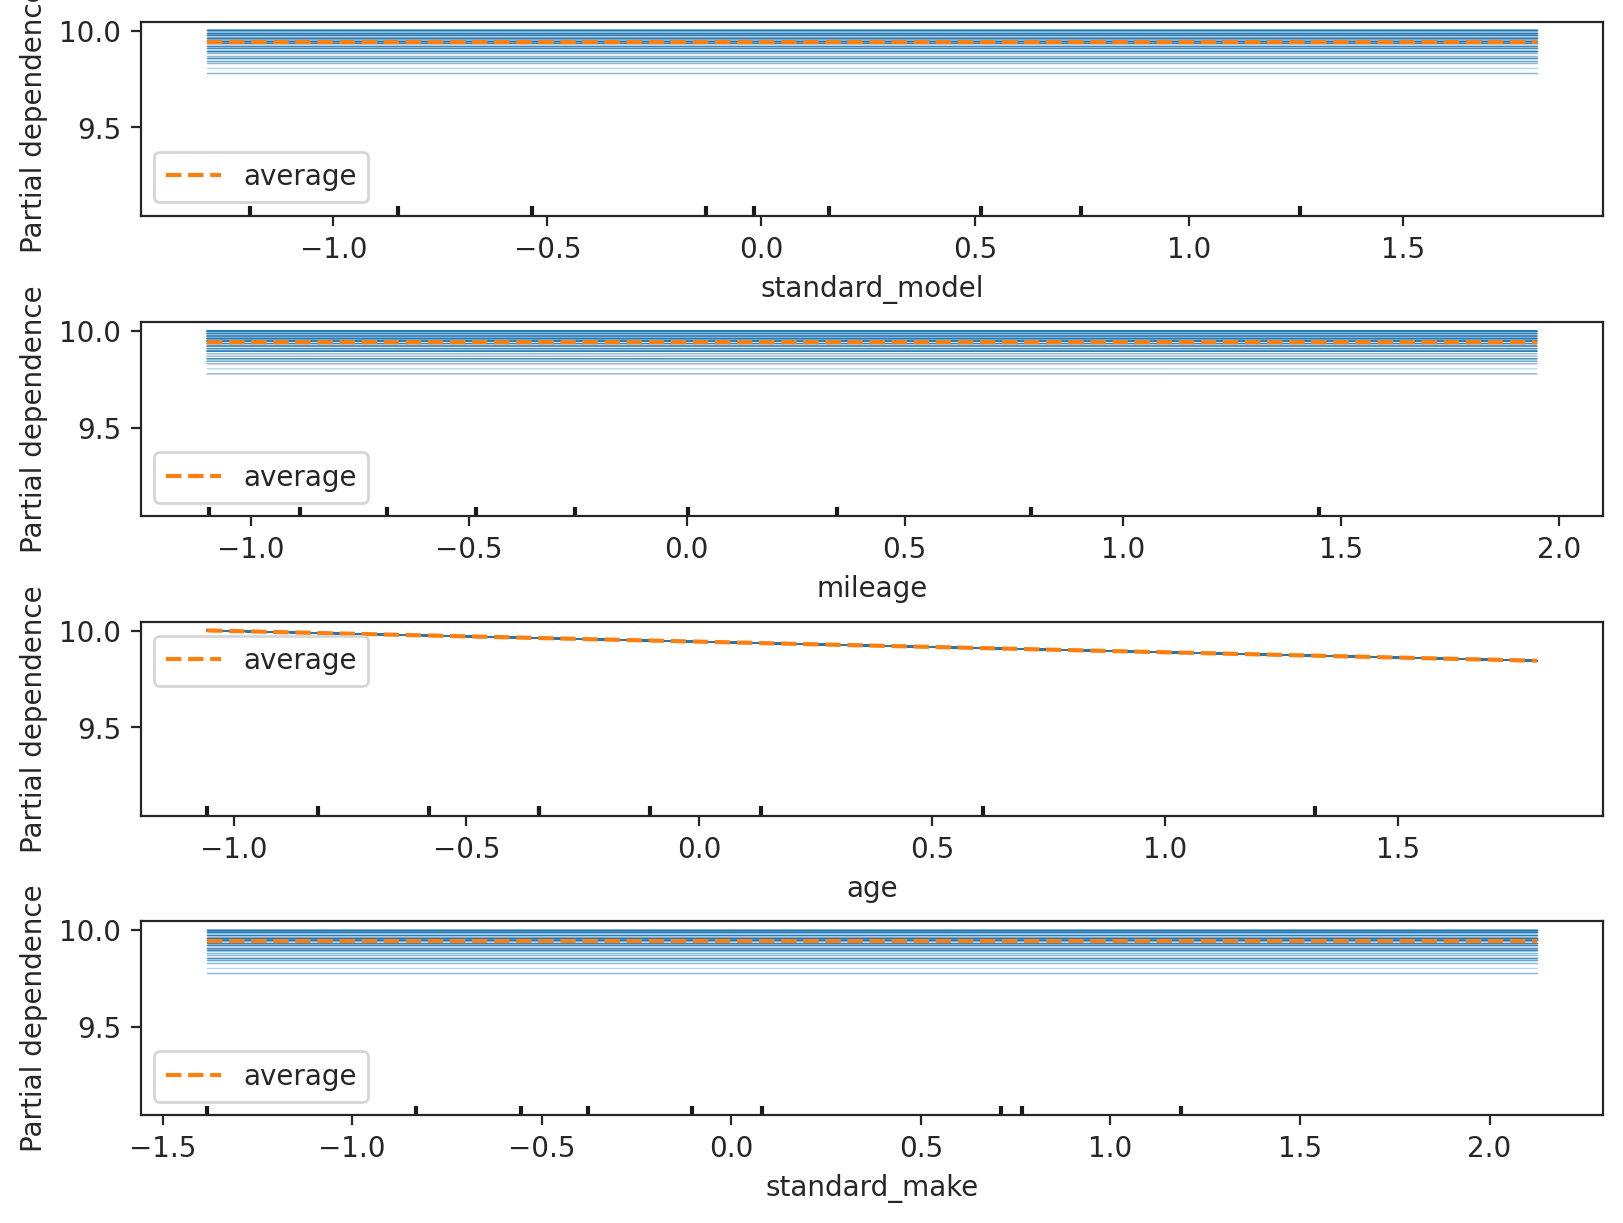

In [ ]:
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    lr, X_train_pdp, features=['standard_model', 'mileage', 'age', 'standard_make'],kind='both', subsample=100, grid_resolution=30, n_jobs=1, random_state=0,ax=ax, n_cols=1
);
plt.show()

#**RANDOM FOREST**

In [ ]:
rf = build_model(RandomForestRegressor(),X_train,linear_model=False,scaling = False)

In [ ]:
rf

Pipeline(steps=[('pp',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['mileage',
                                                   'crossover_car_and_van',
                                                   'age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   TargetEncoder())]),
                                                  ['standard_make',
                                                   'standard_model',
                                                   'vehicle_condition',
                                                   'body_type', 'fuel_type'])],
                                   verbose_feature_names_out=False)),
                ('sel',
                 SequentialFeatureSelector(direction='backward',
                                           estimator=LinearRegression(),
                                           n_features_to_select=0.7)),
                ('regr', RandomForestRegressor())])

In [ ]:
param_grid = {
    'max_depth': [7,10,13],
    'min_samples_leaf': [5,7],
    'min_samples_split': [5,7],
}

In [ ]:
df_sam = df.sample(frac= 0.12)

In [ ]:
X = df_sam.drop(['price','standard_colour'], axis = 1)
y = df_sam['price']

In [ ]:
X_train3,X_test3,y_train3,y_test3 = train_test_split(X,y, test_size = 0.2, random_state = 24)

In [ ]:
y_train3 = np.log1p(y_train3)
y_test3 = np.log1p(y_test3)

In [ ]:
X_train2 = rf['pp'].fit_transform(X_train3,y_train3)
X_test2 = rf['pp'].transform(X_test3)

In [ ]:
list(ParameterGrid(param_grid))

[{'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 5},
 {'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 7},
 {'max_depth': 7, 'min_samples_leaf': 7, 'min_samples_split': 5},
 {'max_depth': 7, 'min_samples_leaf': 7, 'min_samples_split': 7},
 {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5},
 {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 7},
 {'max_depth': 10, 'min_samples_leaf': 7, 'min_samples_split': 5},
 {'max_depth': 10, 'min_samples_leaf': 7, 'min_samples_split': 7},
 {'max_depth': 13, 'min_samples_leaf': 5, 'min_samples_split': 5},
 {'max_depth': 13, 'min_samples_leaf': 5, 'min_samples_split': 7},
 {'max_depth': 13, 'min_samples_leaf': 7, 'min_samples_split': 5},
 {'max_depth': 13, 'min_samples_leaf': 7, 'min_samples_split': 7}]

In [ ]:
gs = GridSearchCV(RandomForestRegressor(), param_grid,n_jobs=1, return_train_score=True)

In [ ]:
gs_results = gs.fit(X_train2,y_train3)

In [ ]:
gs_results.best_estimator_

RandomForestRegressor(max_depth=13, min_samples_leaf=5, min_samples_split=5)

In [ ]:
ytrain

10176     11490
129272    12000
162581     7500
158466    13399
227012    25860
          ...  
367565     1495
365829    23495
155572     6495
120493    64990
312325    23665
Name: price, Length: 314805, dtype: int64

In [ ]:
rf = build_model(RandomForestRegressor(max_depth=13, min_samples_leaf=5, min_samples_split=7,n_estimators=250),X_train,linear_model=False,scaling = False)

In [ ]:
y_train

10176     9.35
129272    9.39
162581    8.92
158466    9.50
227012   10.16
          ... 
367565    7.31
365829   10.06
155572    8.78
120493   11.08
312325   10.07
Name: price, Length: 314805, dtype: float64

In [ ]:
X_test

mileage  standard_make   standard_model vehicle_condition  body_type  \
207622 89000.00            BMW         1 Series              USED  Hatchback   
84261      1.00            BMW         5 Series               NEW     Saloon   
376031 21781.00  Mercedes-Benz          A Class              USED  Hatchback   
269031 31899.00            Kia            Venga              USED        MPV   
19801   2470.00          Honda            Civic              USED  Hatchback   
...         ...            ...              ...               ...        ...   
389160 31000.00           SEAT           Toledo              USED  Hatchback   
104405 12662.00     Land Rover  Discovery Sport              USED        SUV   
111158 80500.00          Mazda           Mazda3              USED  Hatchback   
347959     0.00     Mitsubishi        Outlander               NEW        SUV   
193839 28125.00          SKODA            Fabia              USED  Hatchback   

        crossover_car_and_van              fuel_type  age  
207622                      0                 Diesel 7.00  
84261                       0          Diesel Hybrid 0.00  
376031                      0                 Petrol 3.00  
269031                      0                 Petrol 3.00  
19801                       0                 Petrol 1.00  
...                       ...                    ...  ...  
389160                      0                 Petrol 2.00  
104405                      0                 Diesel 1.00  
111158                      0                 Diesel 4.00  
347959                      0  Petrol Plug-in Hybrid 0.00  
193839                      0                 Petrol 3.00  

[78702 rows x 8 columns]

In [ ]:
rf.fit(X_train,y_train)

Pipeline(steps=[('pp',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['mileage',
                                                   'crossover_car_and_van',
                                                   'age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   TargetEncoder())]),
                                                  ['standard_make',
                                                   'standard_model',
                                                   'vehicle_condition',
                                                   'body_type', 'fuel_type'])],
                                   verbose_feature_names_out=False)),
                ('sel',
                 SequentialFeatureSelector(direction='backward',
                                           estimator=LinearRegression(),
                                           n_features_to_select=0.7)),
                ('regr',
                 RandomForestRegressor(max_depth=13, min_samples_leaf=5,
                                       min_samples_split=7,
                                       n_estimators=250))])

In [ ]:
rf.score(X_train,y_train),rf.score(X_test,y_test)

(0.9478217161292704, 0.9394768414775949)

In [ ]:
eval_result = cross_validate(rf,X_train,y_train, cv = 5, scoring = "r2",return_train_score = True)

In [ ]:
eval_result['train_score'].mean(),
eval_result['train_score'].std(),
eval_result['test_score'].mean(),
eval_result['test_score'].std()

(0.9470095395332804,
 0.0008371707673215105,
 0.9379423325766215,
 0.0007174298968073252)

In [ ]:
rfcv = eval_result['train_score'].mean(),eval_result['train_score'].std(),eval_result['test_score'].mean(),eval_result['test_score'].std()

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
mean_absolute_error(np.exp(y_test),np.exp(y_pred))

1931.9507740943798

# SHAP (RANDOM FOREST)

In [ ]:
def ppTree( X, linear_model=False,scaling= False):
    """ """
    regr_pipe = Pipeline(
        steps=[
            ("pp", create_pp_ppln(X, linear_model,scaling))
        ]
    )
    return regr_pipe

In [ ]:
prep = pp(Xtrain,linear_model=False,scaling = False)

In [ ]:
xtrain = prep.fit_transform(Xtrain,ytrain)

In [ ]:
xtrain

mileage   age  standard_make  standard_model  vehicle_condition
10176   26763.00  3.00       11135.55         8993.65           14562.29
129272     10.00  0.00       11261.89         8581.38           14562.29
162581  59000.00  6.00       13189.93         4367.14           14562.29
158466   7800.00  1.00       19811.02        14604.69           14562.29
227012   7477.00  0.00       19554.19        15459.76           14562.29
...          ...   ...            ...             ...                ...
367565 110000.00 13.00       11261.89         5227.15           14562.29
365829  40988.00  5.00       22051.66        28040.89           14562.29
155572  39000.00  4.00        8338.95         6916.48           14562.29
120493  19240.00  4.00       33241.25        38282.61           14562.29
312325      0.00  0.00       15454.49        16093.03           31542.35

[314805 rows x 5 columns]

In [ ]:
xtest = prep.transform(Xtest)

In [ ]:
model = RandomForestRegressor(max_depth=13, min_samples_leaf=5, min_samples_split=7,n_estimators=250).fit(xtrain,ytrain)

In [ ]:
explainer = shap.TreeExplainer(model,xtrain)

In [ ]:
shap_values = explainer(xtest.sample(frac = 0.15))

100%|===================| 11802/11805 [23:17<00:00]       

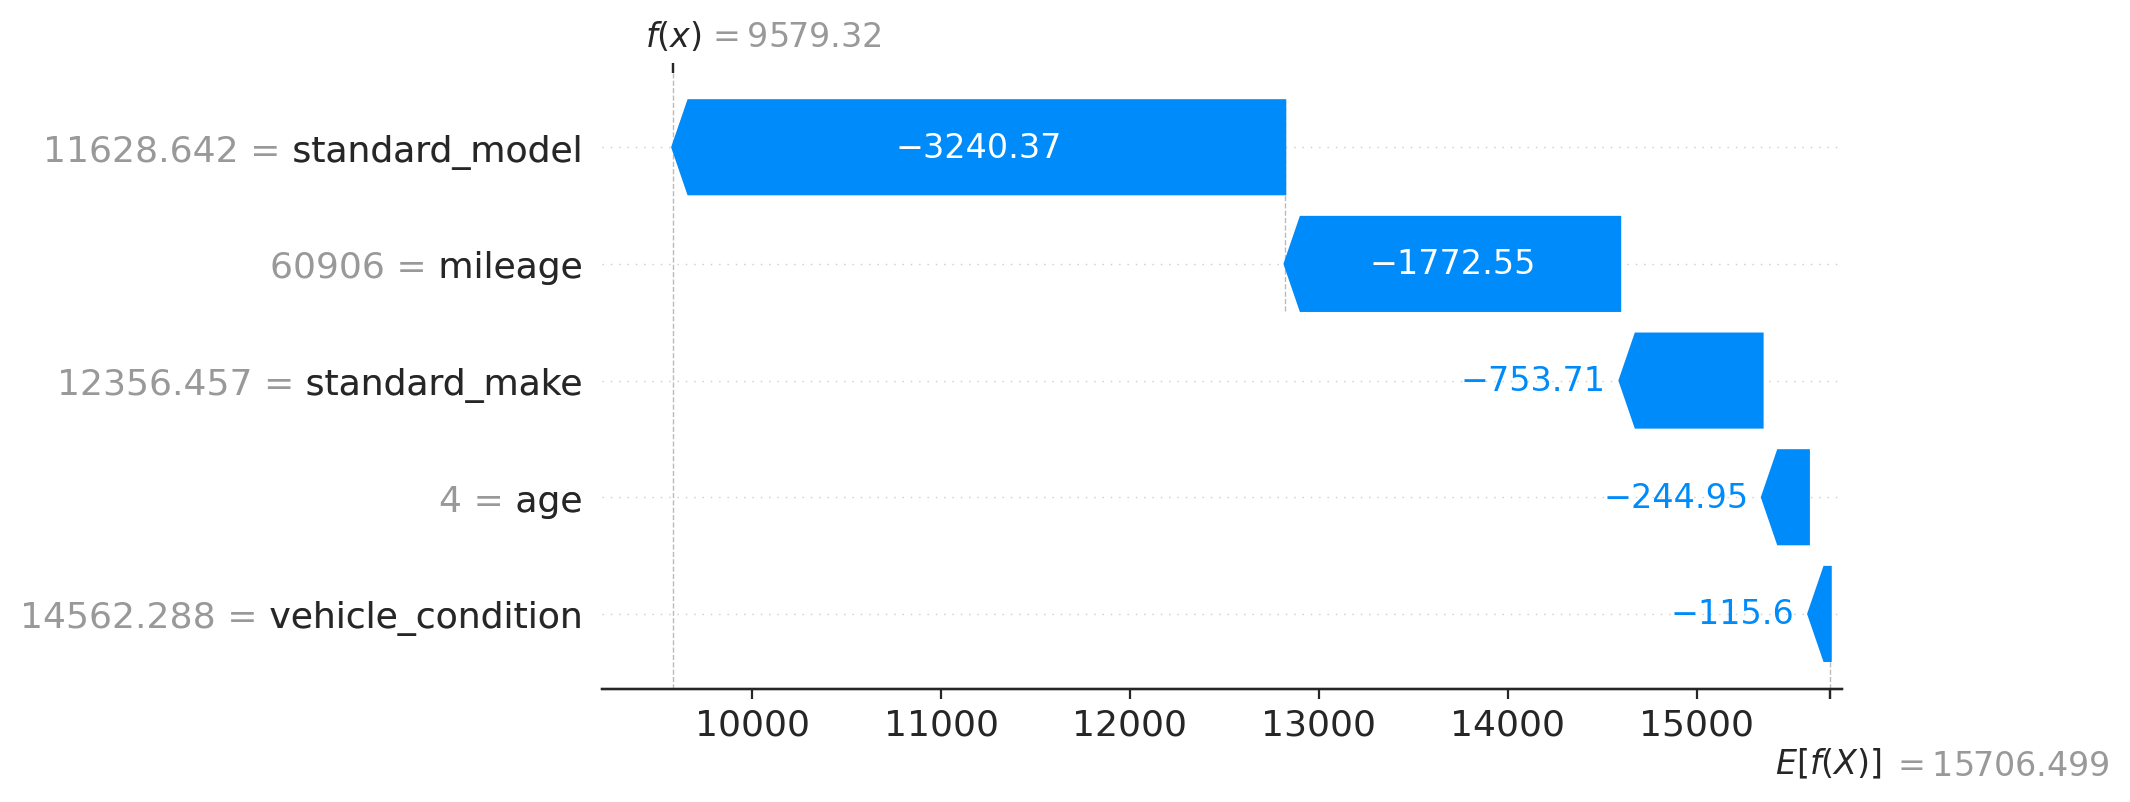

In [ ]:
shap.waterfall_plot(shap_values[234])

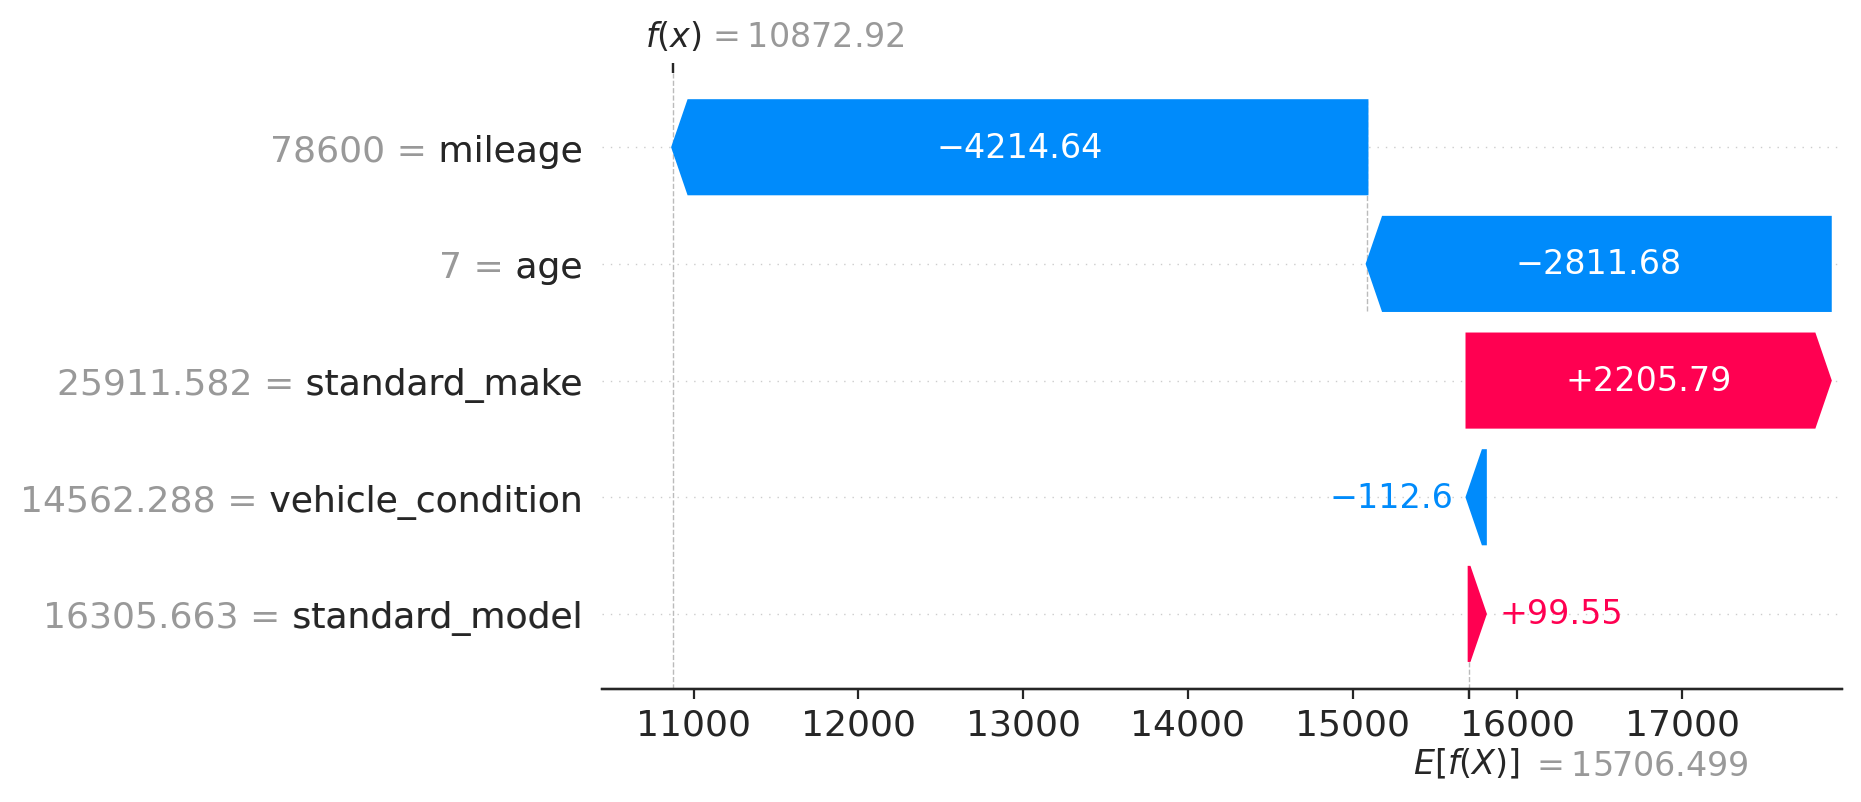

In [ ]:
shap.waterfall_plot(shap_values[751])

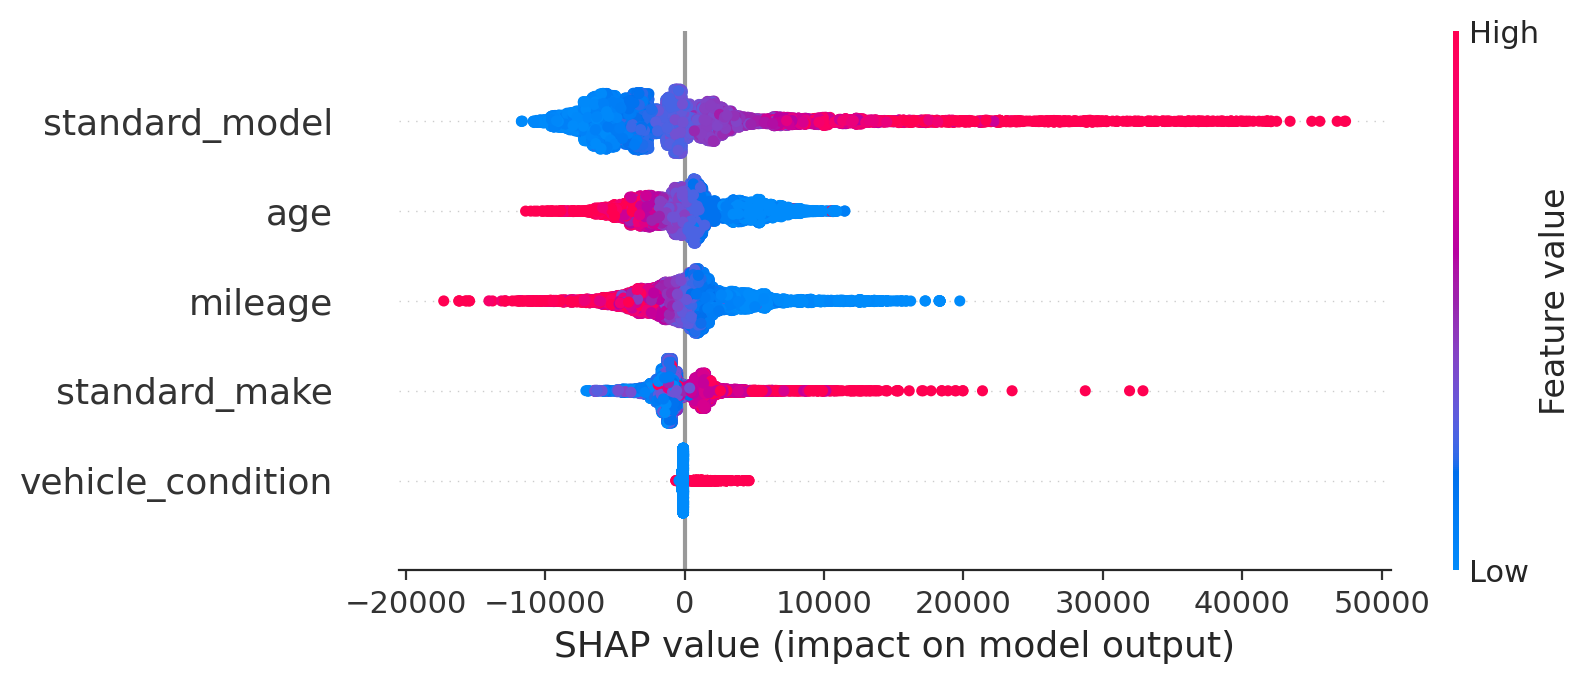

In [ ]:
# global model
shap.plots.beeswarm(shap_values)

In [ ]:
y_train

10176     9.35
129272    9.39
162581    8.92
158466    9.50
227012   10.16
          ... 
367565    7.31
365829   10.06
155572    8.78
120493   11.08
312325   10.07
Name: price, Length: 314805, dtype: float64

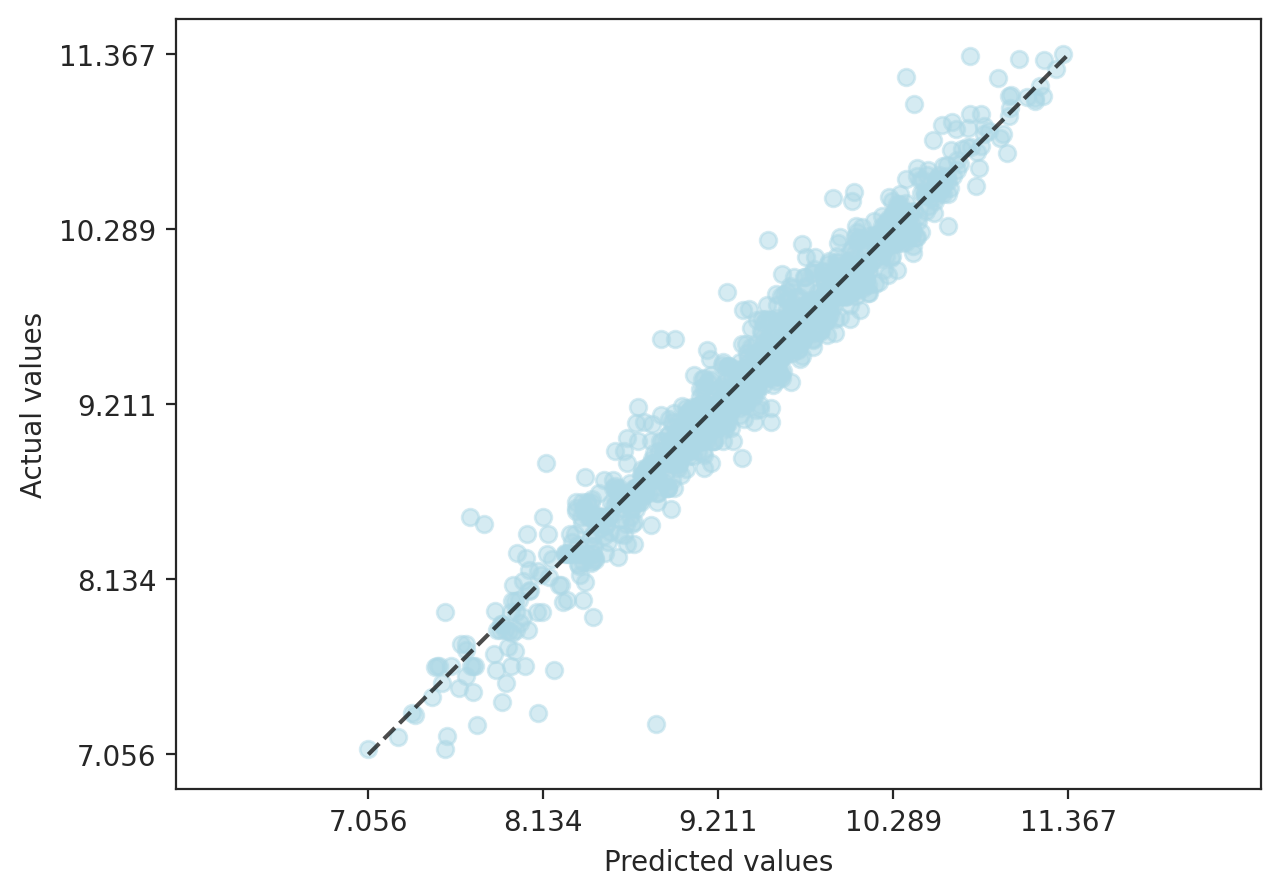

In [ ]:
PredictionErrorDisplay.from_estimator(
    gbr, X_test, y_test, kind="actual_vs_predicted", scatter_kwargs=dict(alpha=0.5,color='lightblue')
);

In [ ]:
X_train1

mileage  crossover_car_and_van   age  standard_make  standard_model  \
10176     -0.31                  -0.07 -0.34          -0.83           -0.86   
129272    -1.10                  -0.07 -1.06          -0.79           -1.00   
162581     0.64                  -0.07  0.37          -0.32           -2.11   
158466    -0.87                  -0.07 -0.82           0.77            0.08   
227012    -0.88                  -0.07 -1.06           0.71            0.05   
...         ...                    ...   ...            ...             ...   
367565     2.14                  -0.07  2.04          -0.79           -2.01   
365829     0.11                  -0.07  0.13           1.07            1.50   
155572     0.05                  -0.07 -0.11          -1.38           -1.04   
120493    -0.53                  -0.07 -0.11           2.12            1.73   
312325    -1.10                  -0.07 -1.06           0.42            0.42   

        vehicle_condition  body_type  fuel_type  
10176               -0.29      -1.04      -0.63  
129272              -0.29      -1.04      -0.63  
162581              -0.29      -0.98       0.33  
158466              -0.29      -1.04      -0.63  
227012              -0.29       0.60      -0.63  
...                   ...        ...        ...  
367565              -0.29      -0.98       0.33  
365829              -0.29       1.20       1.85  
155572              -0.29      -1.04      -0.63  
120493              -0.29       1.20      -0.63  
312325               3.44      -1.04      -0.63  

[314805 rows x 8 columns]

## **PDP RANDOM FOREST**

In [ ]:
X_train_pdp = rf['pp'].fit_transform(X_train,y_train)
X_test_pdp = rf['pp'].transform(X_test)

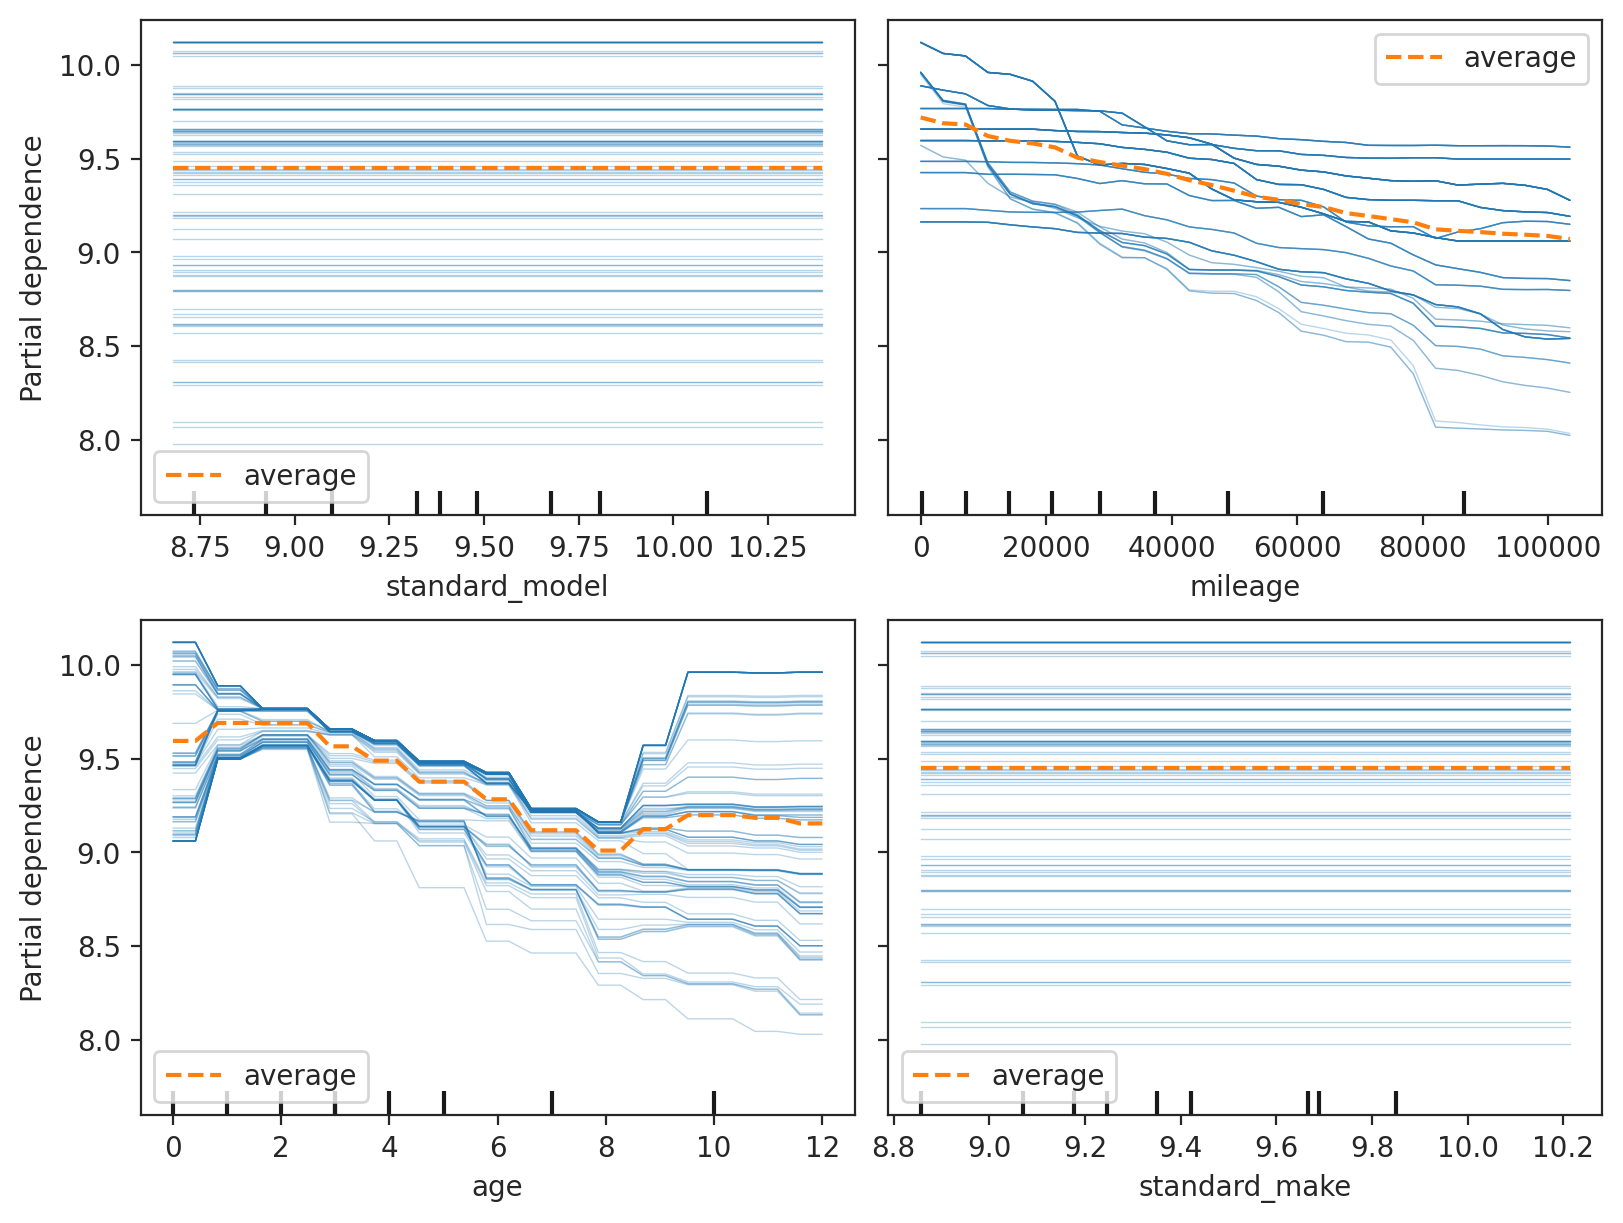

In [ ]:
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    rf, X_train_pdp, features=['standard_model', 'mileage', 'age', 'standard_make','vehicle_condition'],kind='both', subsample=100, grid_resolution=30, n_jobs=1, random_state=0,ax=ax, n_cols=2
);
plt.show()

#**BOOSTED TREES**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
param_grid = {
    'learning_rate':[0.3,0.5],
    'max_depth':[7,9,13]
}

In [ ]:
gs = GridSearchCV(GradientBoostingRegressor(), param_grid,n_jobs=1, return_train_score=True)

In [ ]:
gs_results = gs.fit(X_train2,y_train3)

In [ ]:
gs.best_estimator_

GradientBoostingRegressor(learning_rate=0.3, max_depth=7)

In [ ]:
gbr = build_model(GradientBoostingRegressor(n_estimators=250, learning_rate=0.3, max_depth=7),X_train,linear_model=False,scaling = False)

In [ ]:
gbr.fit(X_train,y_train)

Pipeline(steps=[('pp',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['mileage',
                                                   'crossover_car_and_van',
                                                   'age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   TargetEncoder())]),
                                                  ['standard_make',
                                                   'standard_model',
                                                   'vehicle_condition',
                                                   'body_type', 'fuel_type'])],
                                   verbose_feature_names_out=False)),
                ('sel',
                 SequentialFeatureSelector(direction='backward',
                                           estimator=LinearRegression(),
                                           n_features_to_select=0.7)),
                ('regr',
                 GradientBoostingRegressor(learning_rate=0.3, max_depth=7,
                                           n_estimators=250))])

In [ ]:
gbr.score(X_train,y_train),gbr.score(X_test,y_test)

(0.9614721881717542, 0.9512236594036209)

In [ ]:
y_pred = gbr.predict(X_test)

In [ ]:
eval_result = cross_validate(gbr,X_train,y_train, cv = 5, scoring = "r2",return_train_score = True)

In [ ]:
eval_result['train_score'].mean(),
eval_result['train_score'].std(),
eval_result['test_score'].mean(),
eval_result['test_score'].std()

(0.9637093864822885,
 0.0007431959689304076,
 0.951701154792181,
 0.001365552314704845)

In [ ]:
gbrcv = eval_result['train_score'].mean(),eval_result['train_score'].std(),eval_result['test_score'].mean(),eval_result['test_score'].std()

In [ ]:
y_pred = gbr.predict(X_test)

In [ ]:
mean_absolute_error(np.exp(y_test),np.exp(y_pred))

1782.8322223635907

# SHAP (GRADIENT BOOSTING)




In [ ]:
model = GradientBoostingRegressor(n_estimators=250, learning_rate=0.3, max_depth=7).fit(xtrain,ytrain)

NameError: name 'xtrain' is not defined

In [ ]:
explainer = shap.TreeExplainer(model,xtrain)

In [ ]:
shap_values = explainer(xtest.sample(frac = 0.15))

 99%|===================| 11740/11805 [01:59<00:00]       

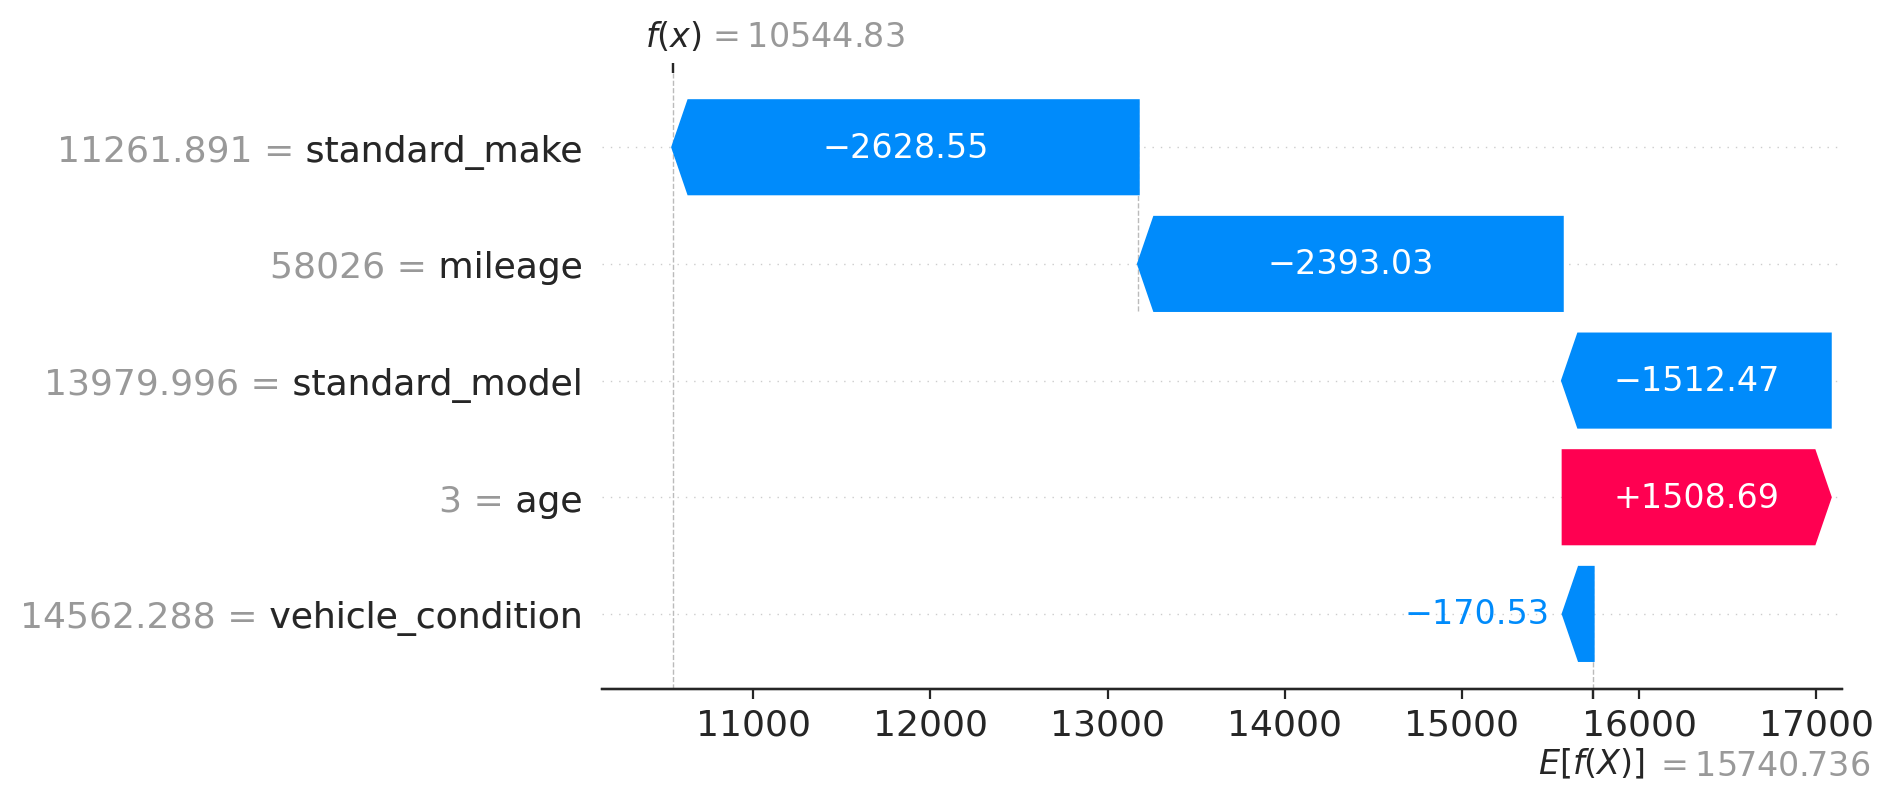

In [ ]:
shap.waterfall_plot(shap_values[234])

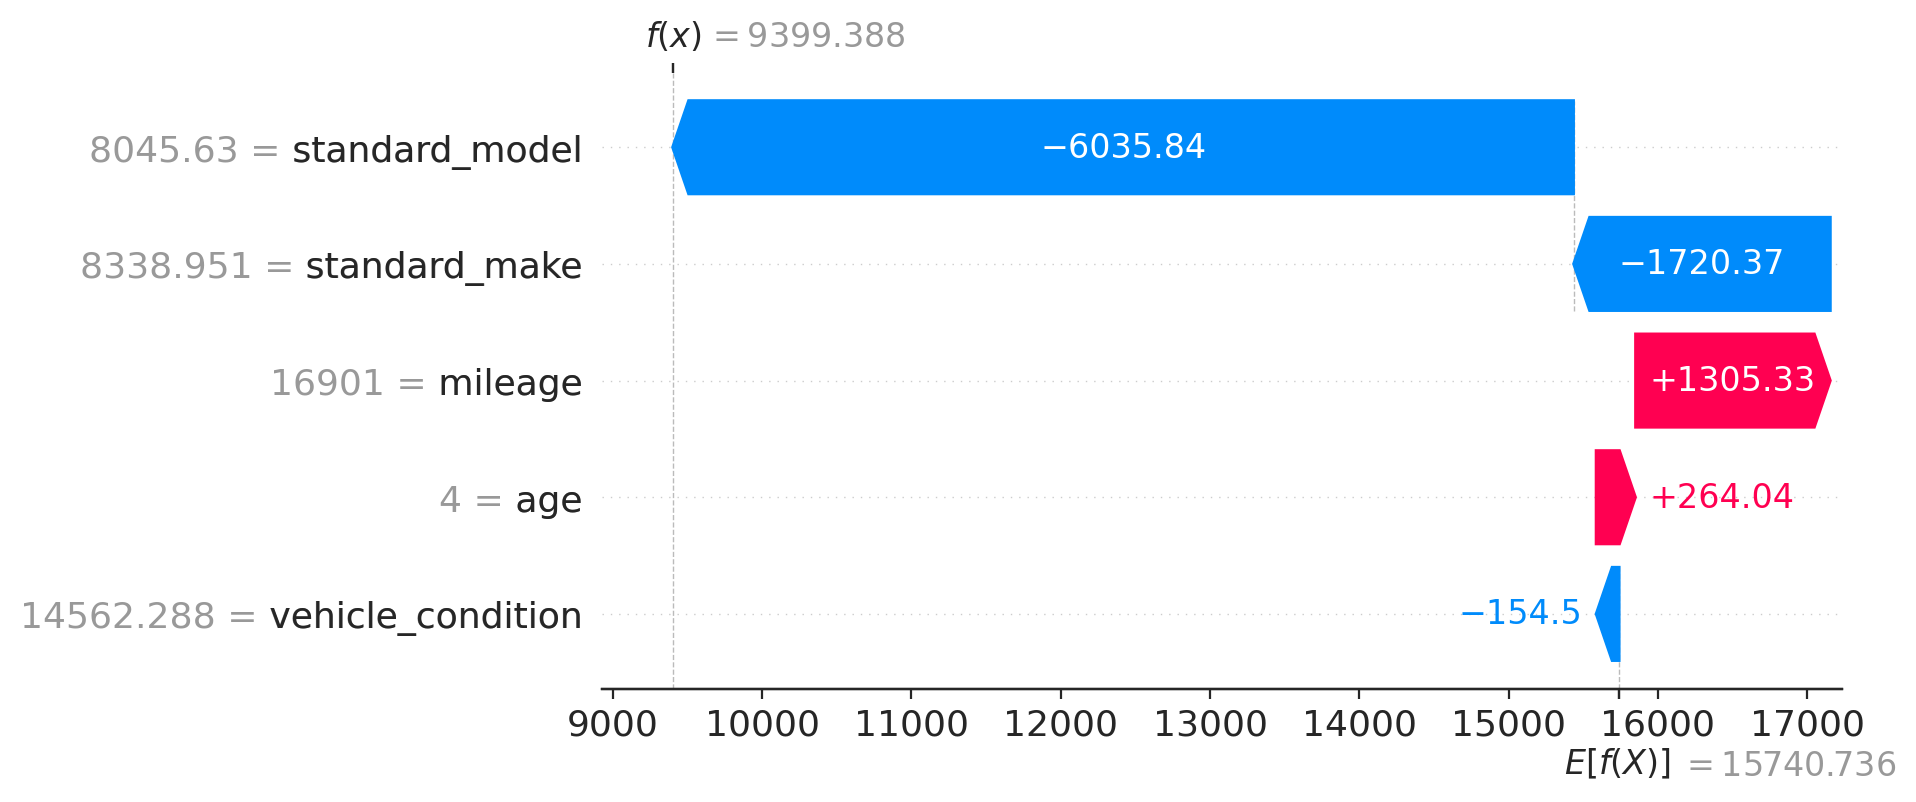

In [ ]:
shap.waterfall_plot(shap_values[751])

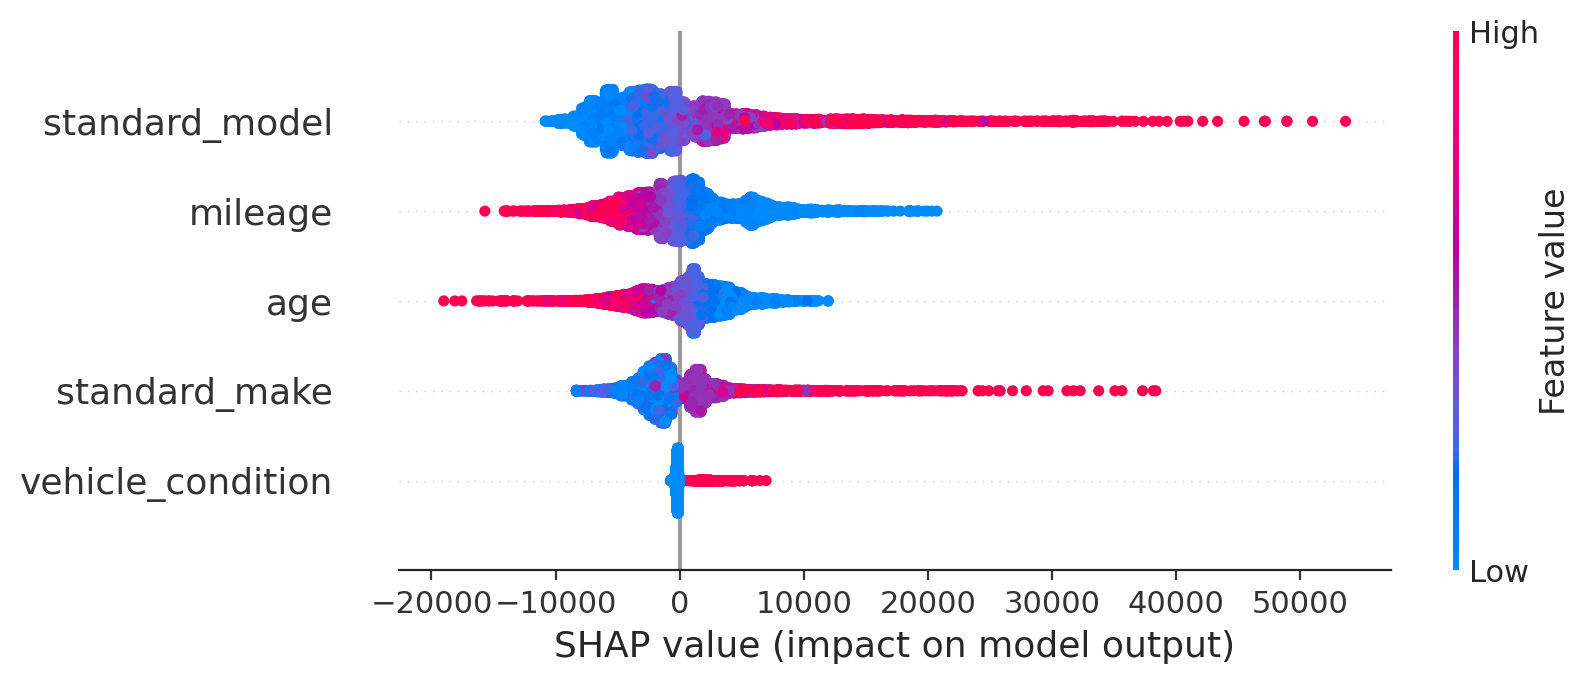

In [ ]:
# global model
shap.plots.beeswarm(shap_values)

# **PDP BOOSTED TREE**

In [ ]:
X_train_pdp = gbr['pp'].fit_transform(X_train,y_train)
X_test_pdp = gbr['pp'].transform(X_test)

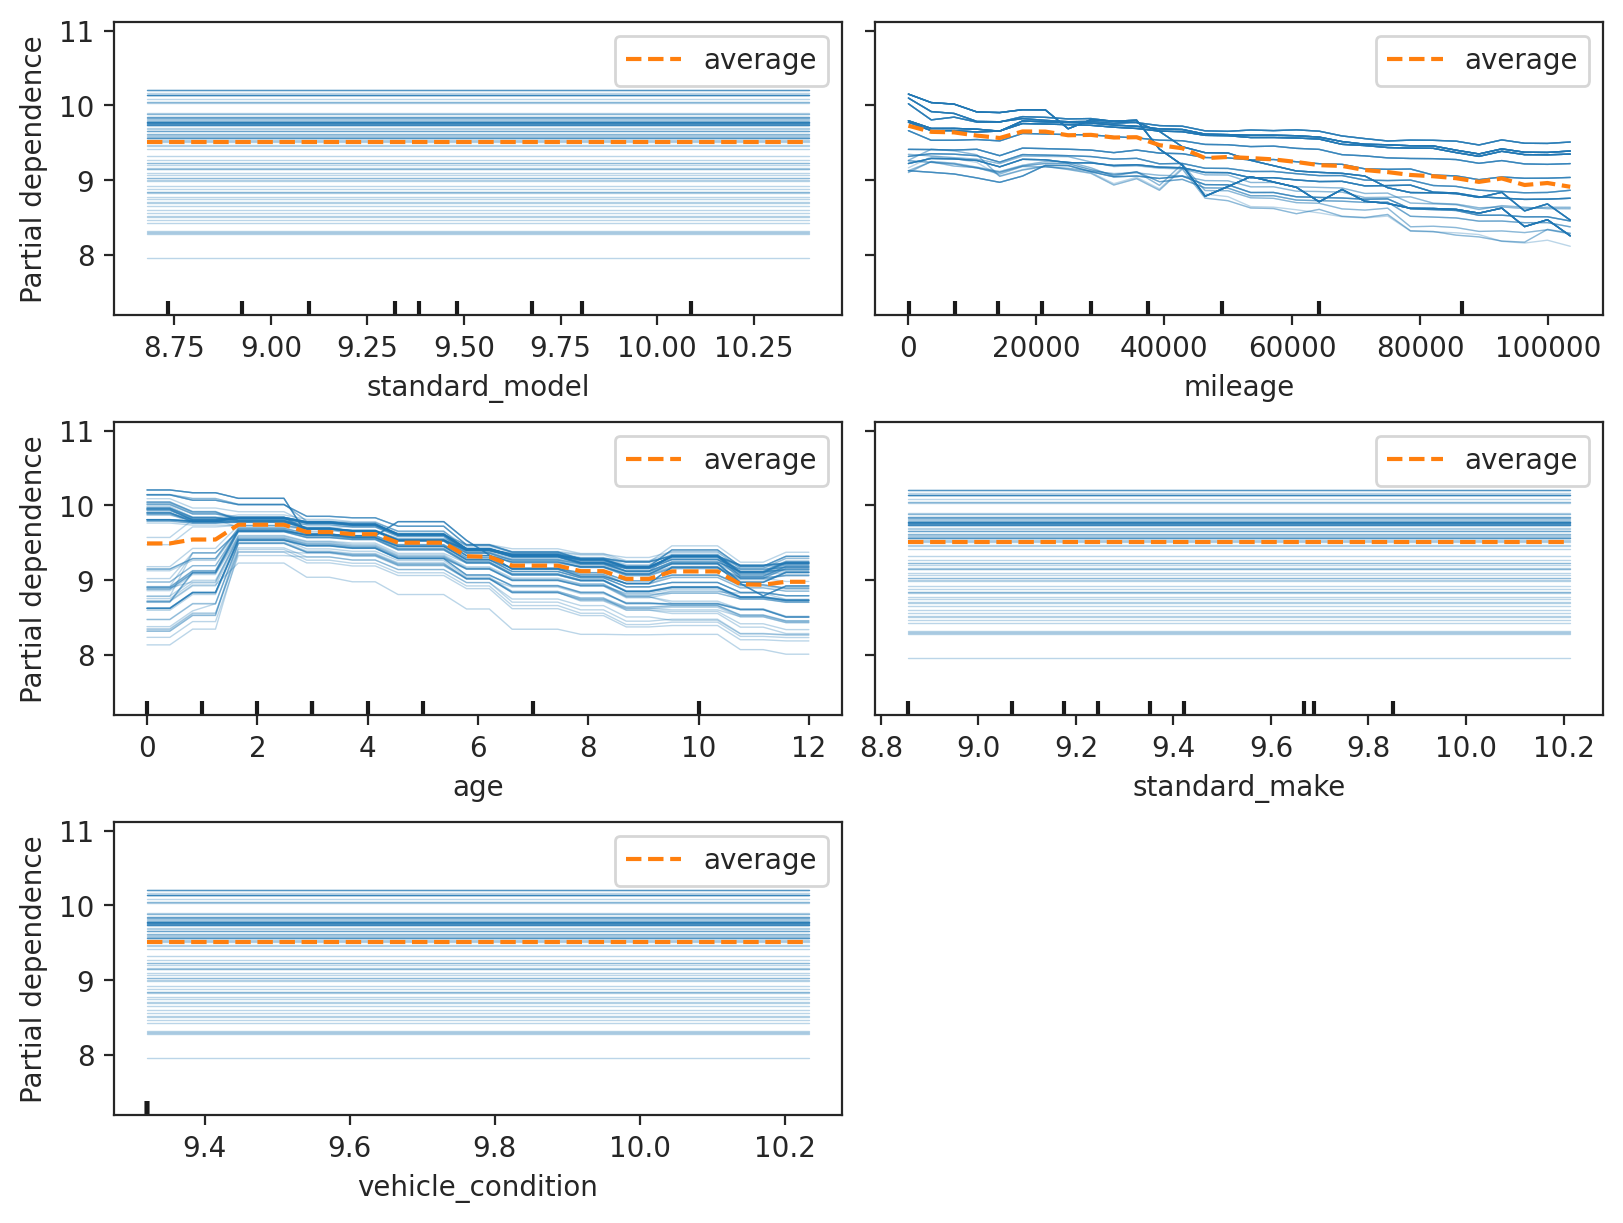

In [ ]:
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    gbr, X_train_pdp, features=['standard_model', 'mileage', 'age', 'standard_make','vehicle_condition'],kind='both', subsample=100, grid_resolution=30, n_jobs=1, random_state=0,ax=ax, n_cols=2
);
plt.show()

#**ENSEMBLE**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.ensemble import VotingRegressor

In [ ]:
ensemble = VotingRegressor(
    [
        ("gbr", gbr),
        ("rf", rf),
        ('lr', lr)
    ]
)

In [ ]:
ensemble.fit(X_train,y_train)

VotingRegressor(estimators=[('gbr',
                             Pipeline(steps=[('pp',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer())]),
                                                                               ['mileage',
                                                                                'crossover_car_and_van',
                                                                                'age']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('encoder',
                                                                                                TargetEncoder())]),
                                                                               ['standard_make',
                                                                                'standard_model',
                                                                                'v...
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('encoder',
                                                                                                TargetEncoder()),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['standard_make',
                                                                                'standard_model',
                                                                                'vehicle_condition',
                                                                                'body_type',
                                                                                'fuel_type'])],
                                                                verbose_feature_names_out=False)),
                                             ('sel',
                                              SequentialFeatureSelector(direction='backward',
                                                                        estimator=LinearRegression(),
                                                                        n_features_to_select=0.7)),
                                             ('regr', LinearRegression())]))])

In [ ]:
ensemble.score(X_train,y_train)

0.9414065791305206

Text(0.5, 1.0, 'Actual vs Predicted - Ensemble')

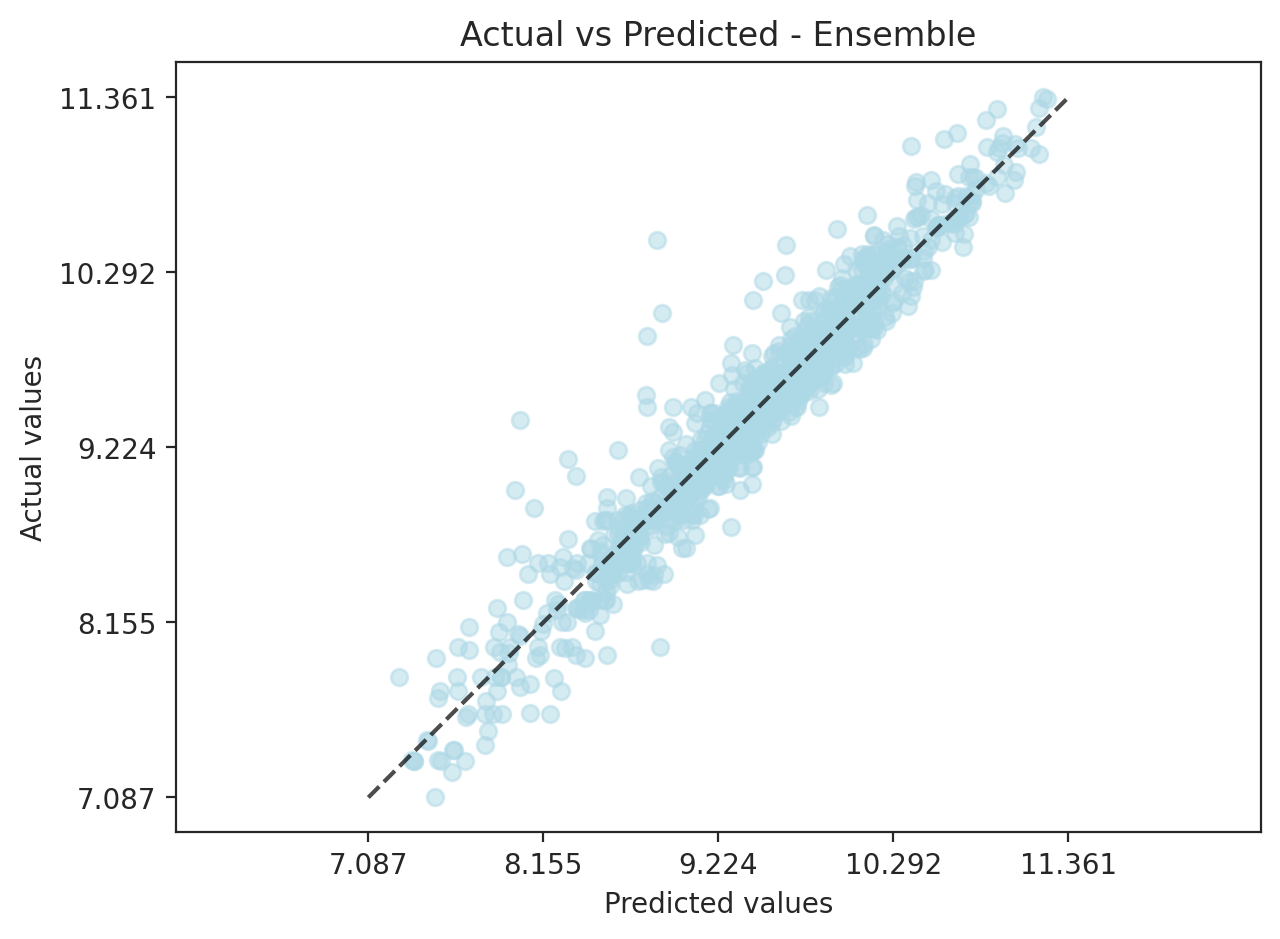

In [ ]:
PredictionErrorDisplay.from_estimator(
    ensemble, X_test, y_test, kind="actual_vs_predicted", scatter_kwargs=dict(alpha=0.5,color='lightblue')
);
plt.title("Actual vs Predicted - Ensemble")

In [ ]:
  ytest

207622     8989
84261     51890
376031    17990
269031     9020
19801     17500
          ...  
389160     8250
104405    37995
111158     7500
347959    41205
193839     8790
Name: price, Length: 78702, dtype: int64

In [ ]:
xt = X.head(10)
yt = y.head(10)
pred_gbr = gbr.predict(xt)
pred_rf = rf.predict(xt)
pred_lr = lr.predict(xt)
pred_ens = ensemble.predict(xt)

In [ ]:
pred_gbr

array([ 8.96487306, 10.67647682,  9.72113128,  9.14488496,  9.83758378,
        7.34745749, 10.08986117, 10.52012399, 11.1659554 ,  8.0169347 ,
       10.44622131,  8.92384258,  9.76306284,  8.9846861 ,  9.22325224,
        9.4539282 , 10.42275232,  9.44311638, 10.24358499,  8.45779389])

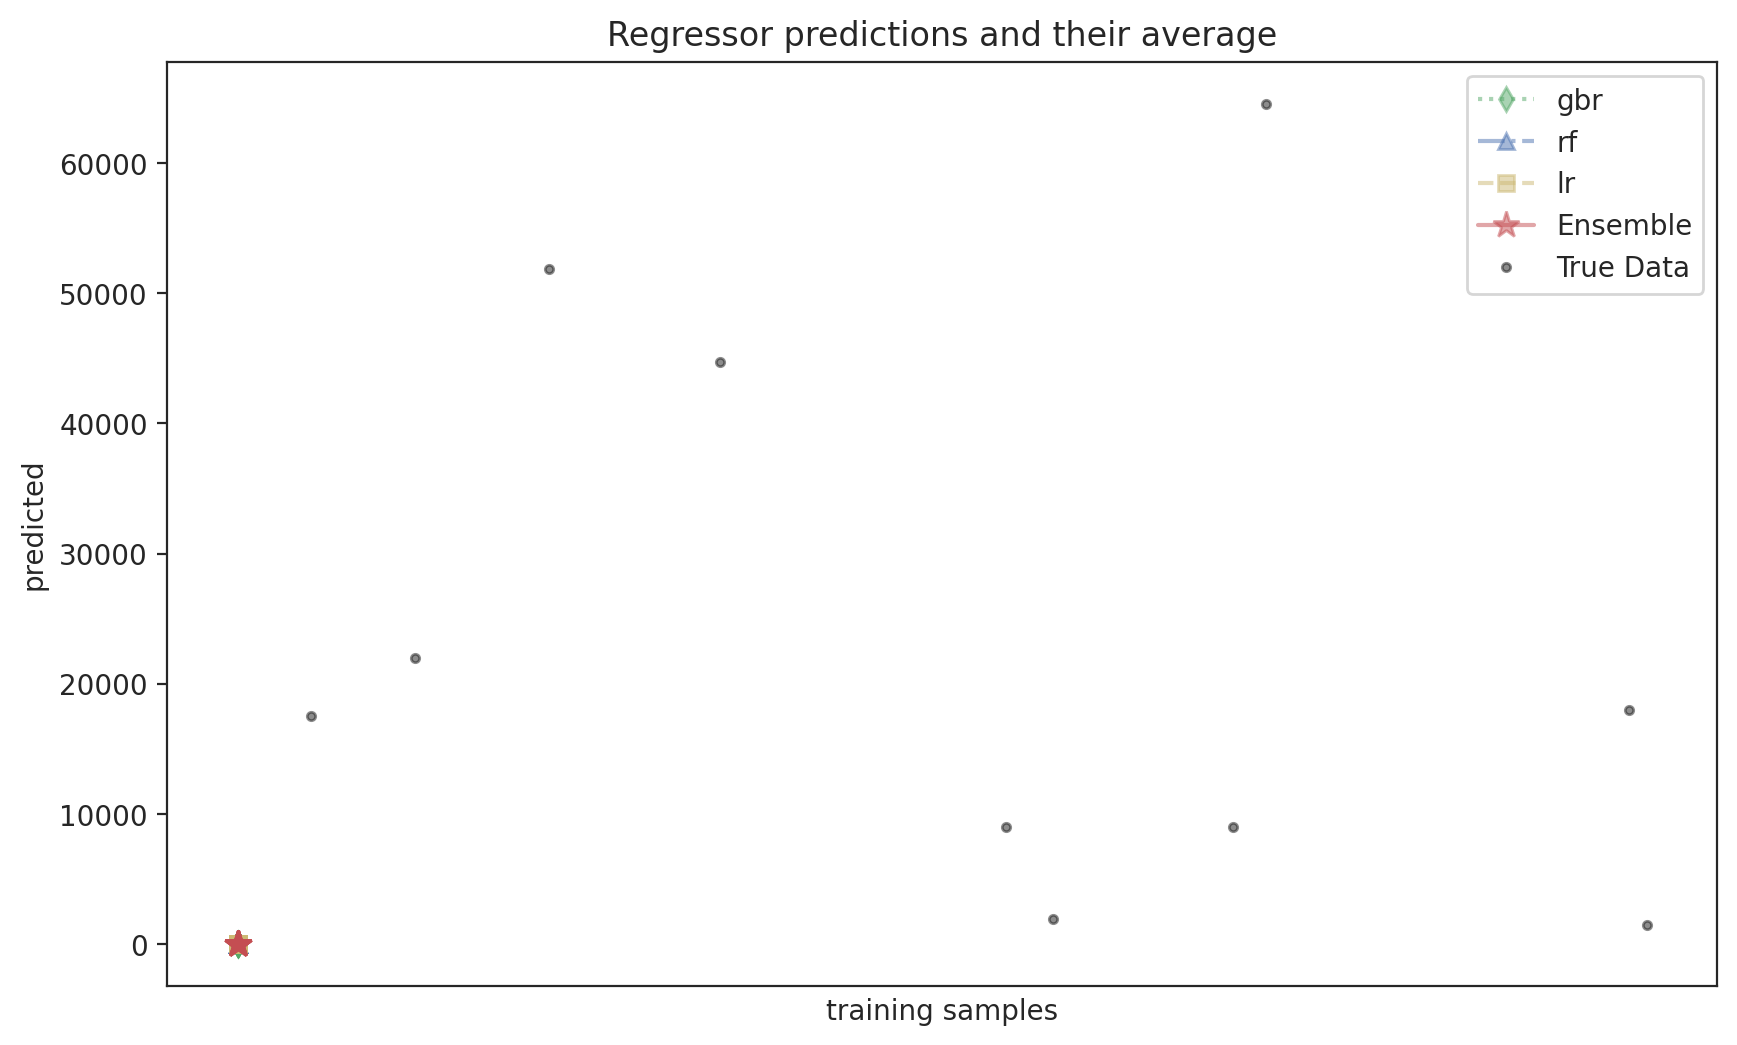

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(pred_gbr, "gd:", alpha=0.5, label="gbr")
ax.plot(pred_rf, "b^-.", alpha=0.5, label="rf")
ax.plot(pred_lr, "ys--", alpha=0.5, label="lr")
ax.plot(pred_ens, "r*-", alpha=0.5, ms=10, label="Ensemble")
ax.plot(yt, "ko", alpha=0.5, ms=3, label="True Data")

ax.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
ax.set_ylabel("predicted")
ax.set_xlabel("training samples")
ax.legend(loc="best")
ax.set_title("Regressor predictions and their average");